In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load file into dataframe
data = pd.read_csv('crypto_combined_scaled.csv', index_col=0)
data = data.rename(columns={'Date':'date'})
data.head()

date     Price        Volume    Market_cap crypto_name  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand   

   name_price_attention  return  
0                  1.50   0.000  
1                  0.00  97.663  
2                  1.38 -31.938  
3                  0.00 -12.022  
4                  0.00 -25.810

In [3]:
# summary statistics
data.describe()

Price        Volume    Market_cap  name_price_attention  \
count  50789.000000  5.078900e+04  5.078900e+04          50789.000000   
mean    1015.247249  1.689682e+09  2.457322e+10              5.739880   
std     5545.671357  6.209685e+09  1.044600e+11             11.204621   
min        0.000000  0.000000e+00  0.000000e+00              0.000000   
25%        0.102372  4.052508e+07  5.229310e+08              0.000000   
50%        2.044498  1.903653e+08  3.062461e+09              1.250000   
75%       24.940265  7.677706e+08  8.716918e+09              6.080000   
max    67617.015545  1.788941e+11  1.278798e+12            100.000000   

             return  
count  50789.000000  
mean       0.949244  
std       99.036721  
min      -99.584000  
25%       -2.509000  
50%        0.000000  
75%        2.514000  
max    21804.936000

In [4]:
#adding the dummy variable for covid. 

split_date = '2020-01-01'
data['Post-covid'] = (data['date'] >= split_date).astype(int)
#data['Post-covid'] = (df_lag.index >= split_date).astype(int)

data.head()

date     Price        Volume    Market_cap crypto_name  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand   

   name_price_attention  return  Post-covid  
0                  1.50   0.000           0  
1                  0.00  97.663           0  
2                  1.38 -31.938           0  
3                  0.00 -12.022           0  
4                  0.00 -25.810           0

# Correlation

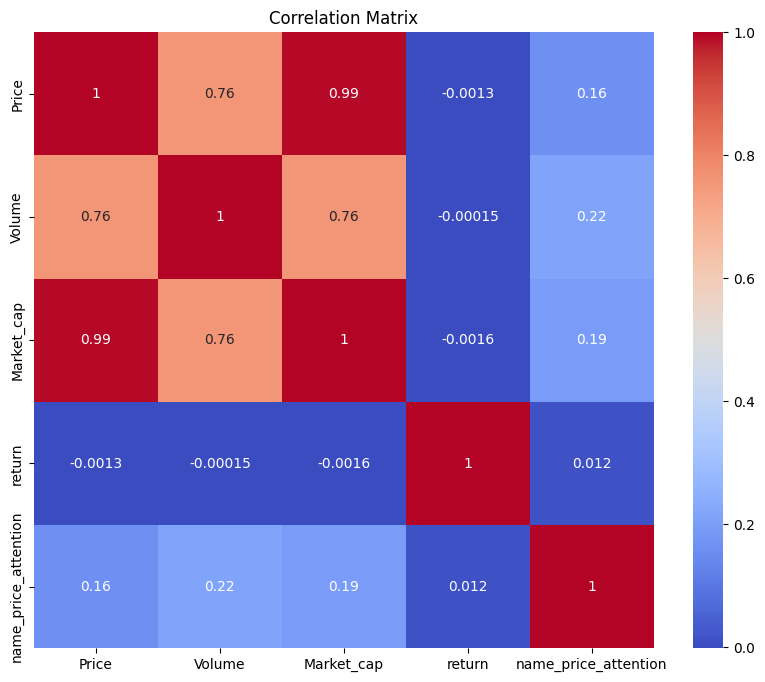

In [5]:
# Correlation Analysis
#setting numerical variables:
numerical = ['Price', 'Volume', 'Market_cap', 'return', 'name_price_attention']
correlation_matrix = data[numerical].corr()

#plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
#Checking the correlation between 
correlation_value = data['return'].corr(data['name_price_attention'])

print(f"Correlation between return and attention: {correlation_value}")


Correlation between return and attention: 0.012082367716623339


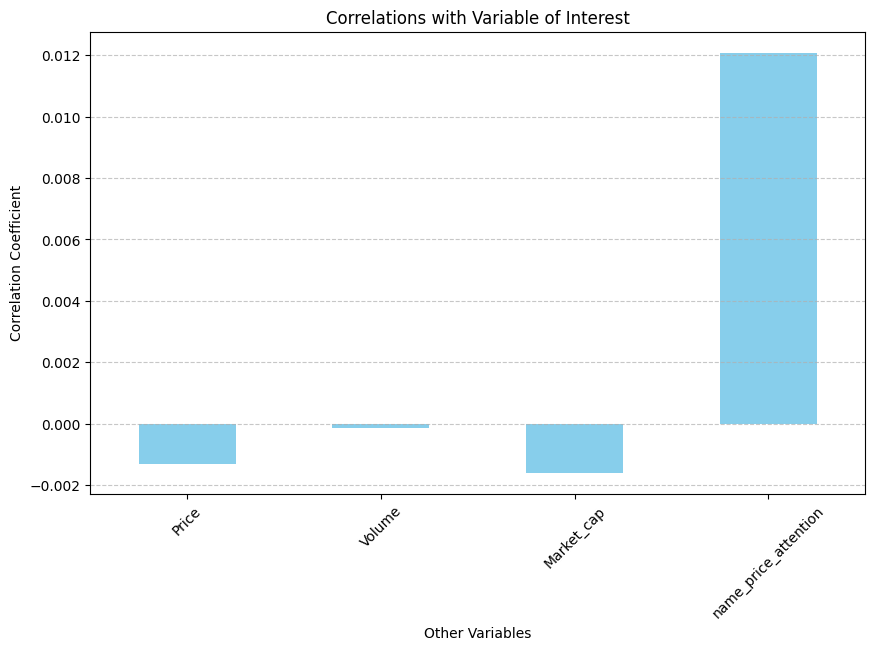

In [7]:
correlations = data[numerical].corr()['return'].drop(['return'])

# Plot bar graph
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations with Variable of Interest')
plt.xlabel('Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Visualizations

1. Time series of price and attention proxies
    * Time series for each stock 
    * Time series pre and post covid
    * Time series per industry
    * Quarterly and Monthly look
2. Distributions of dependend and independent variables 
3. Scatter plots with the Relationships 

### 1. Time Series Analysis

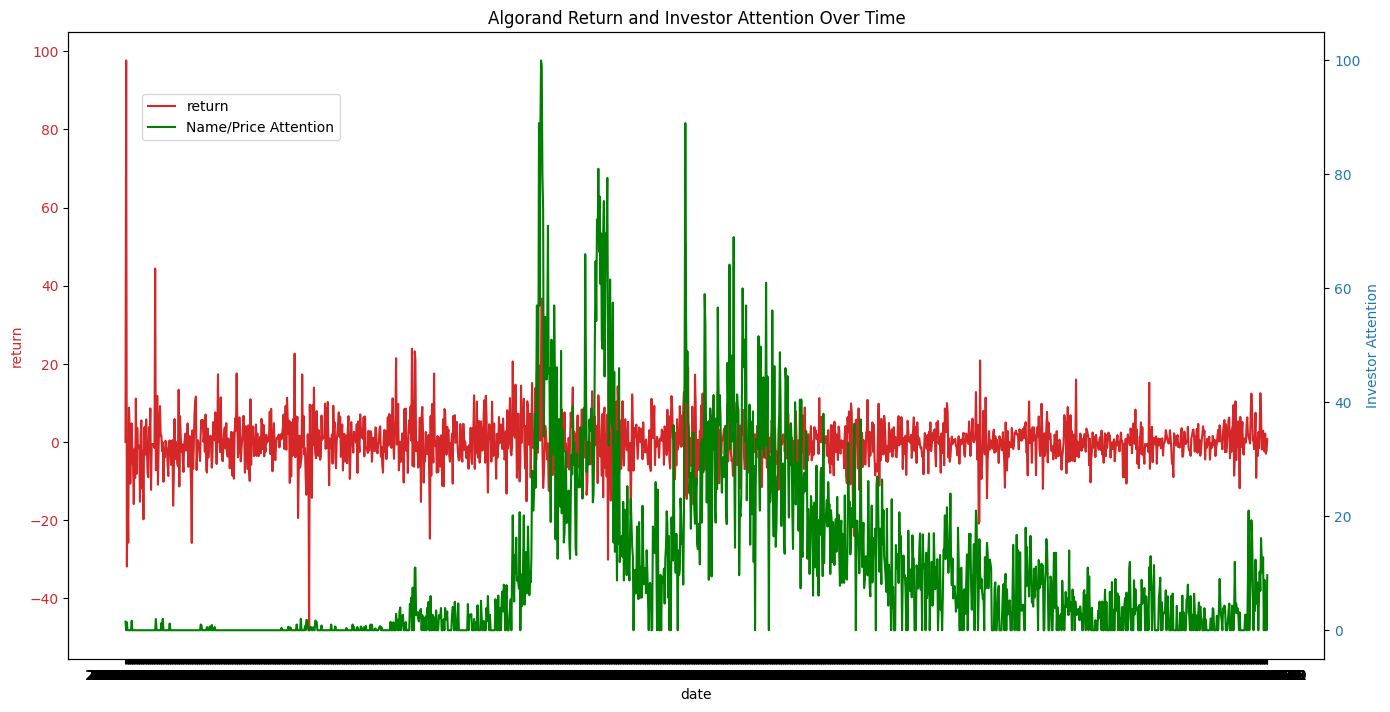

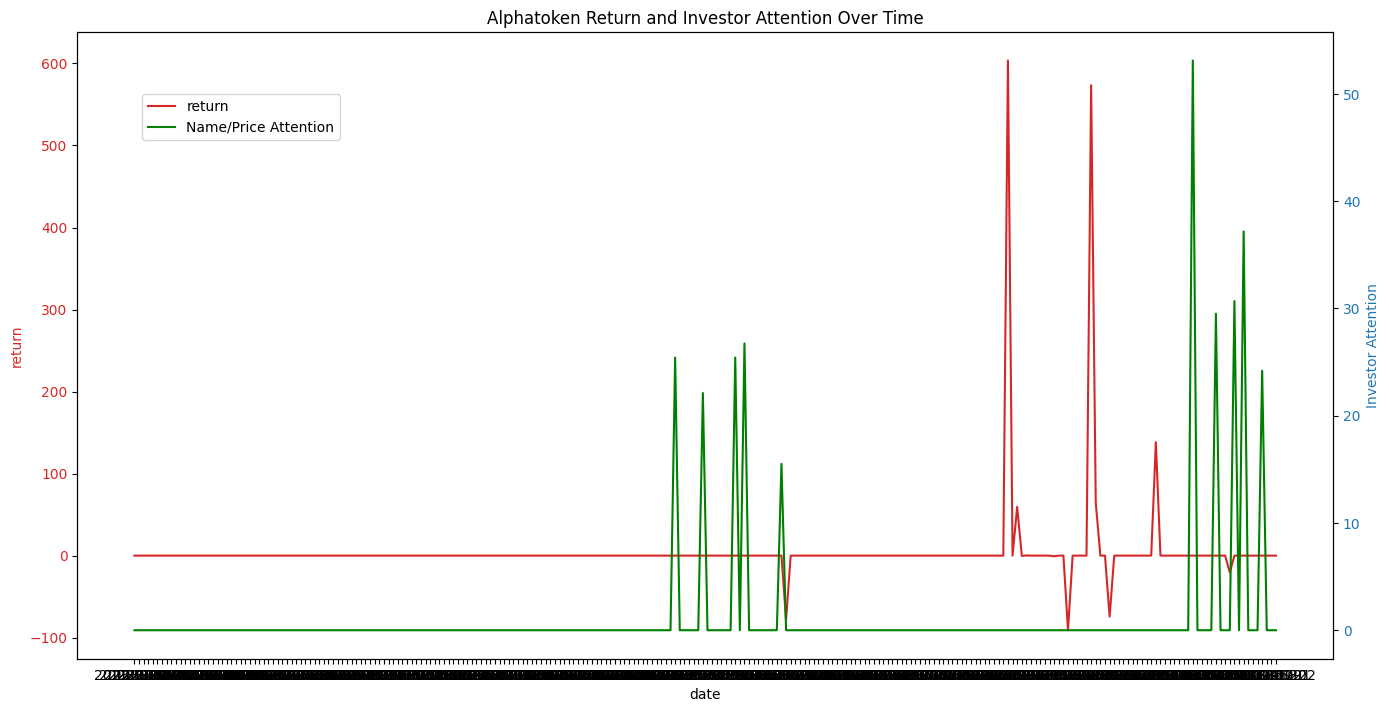

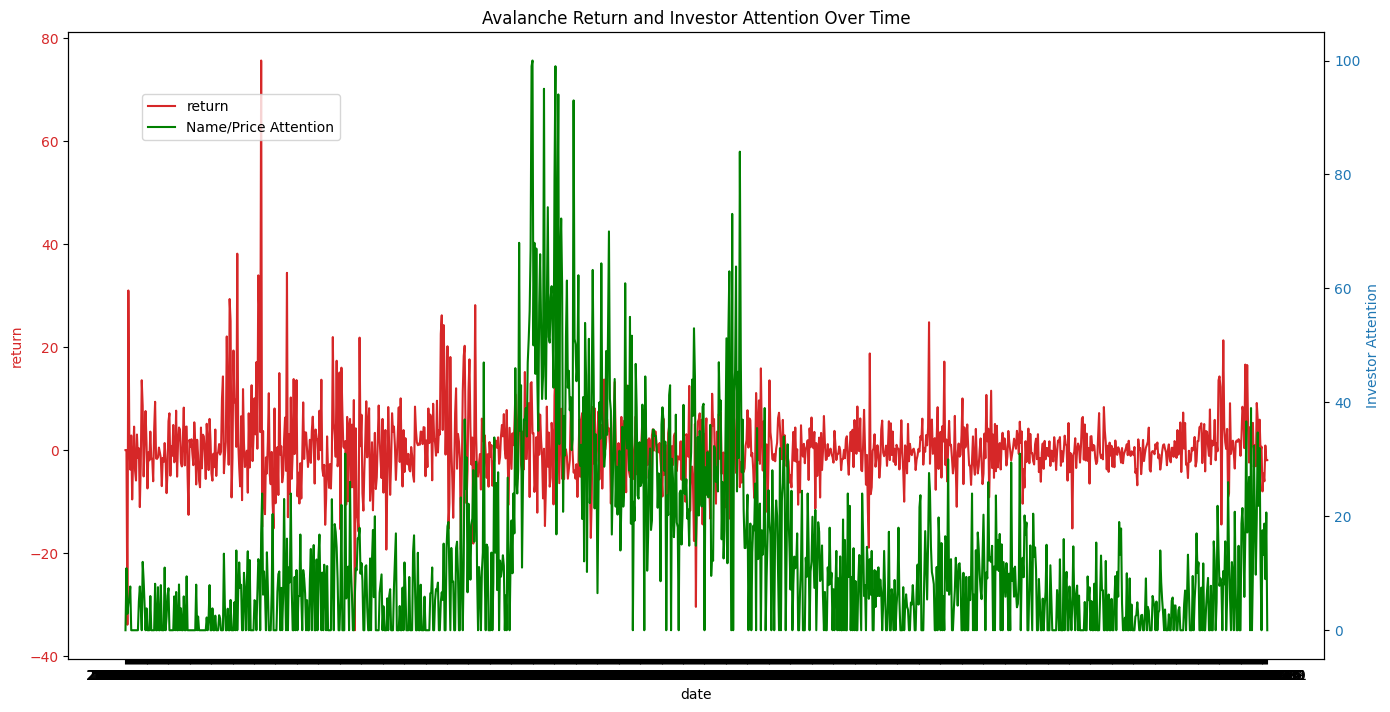

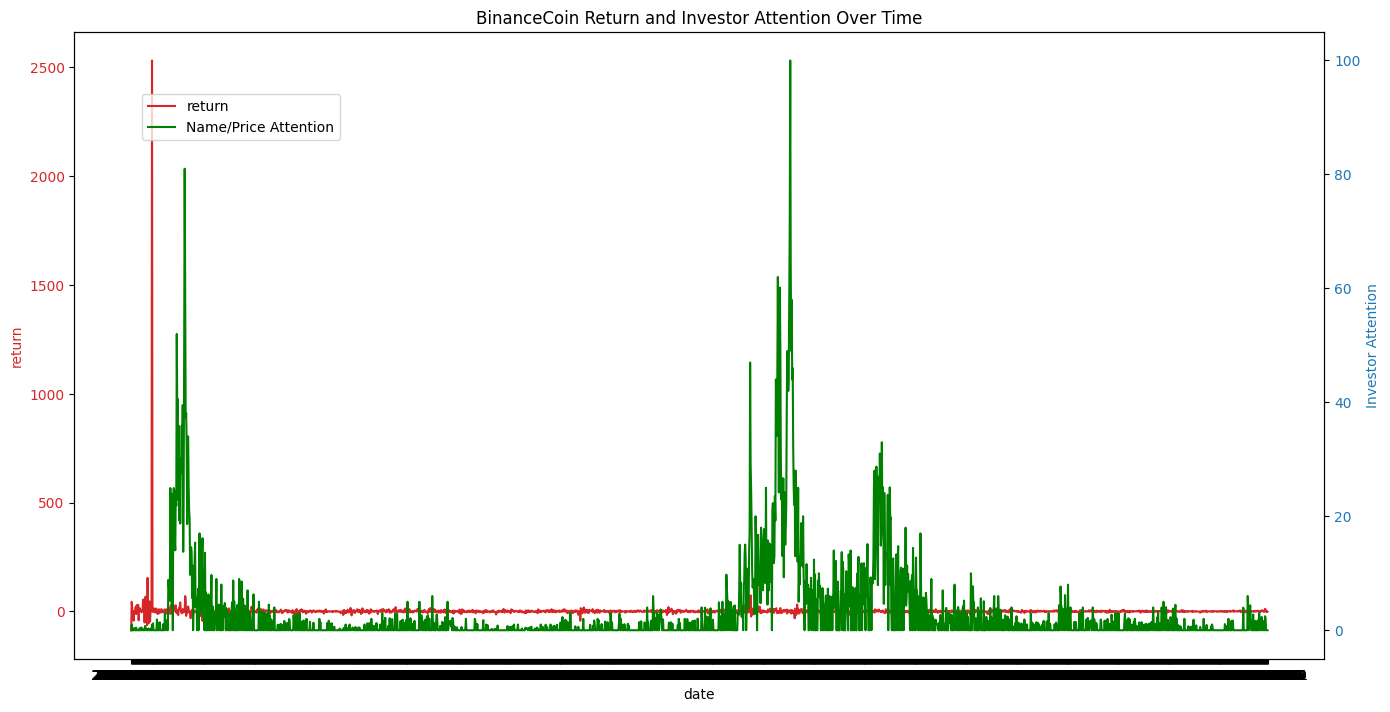

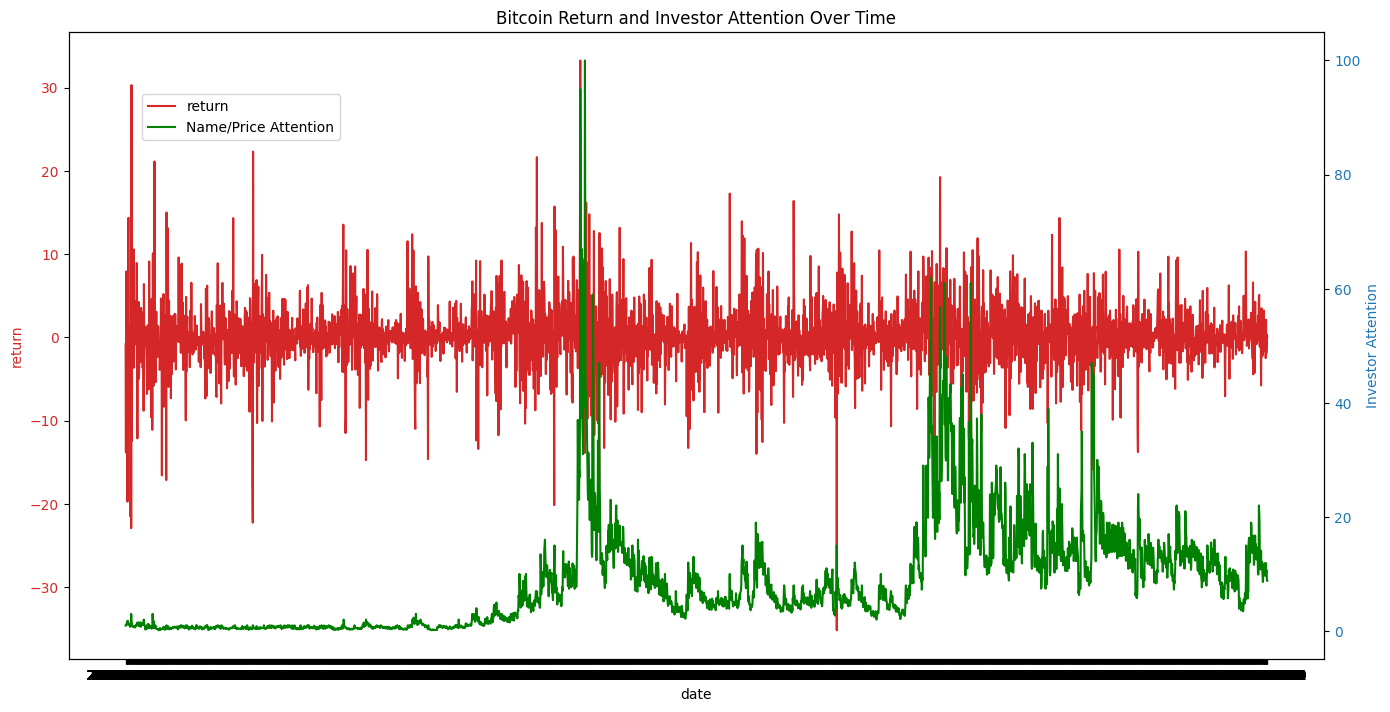

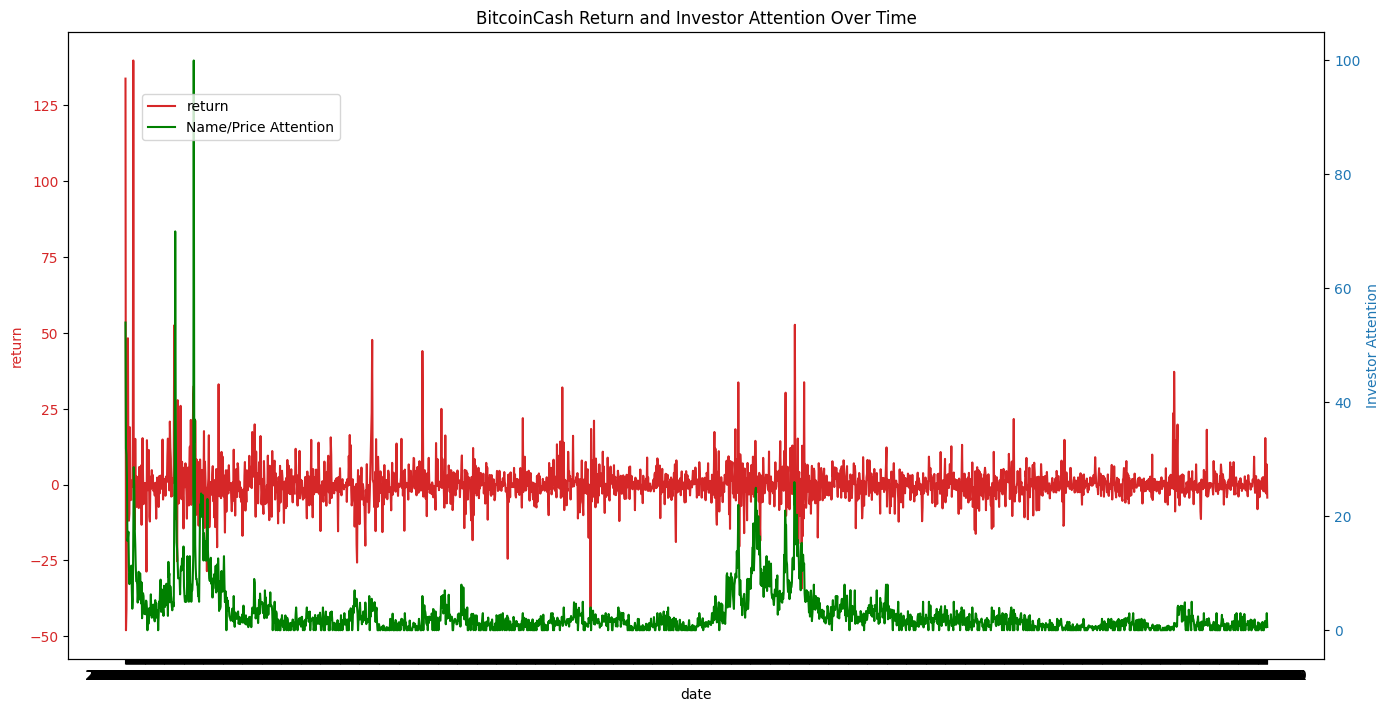

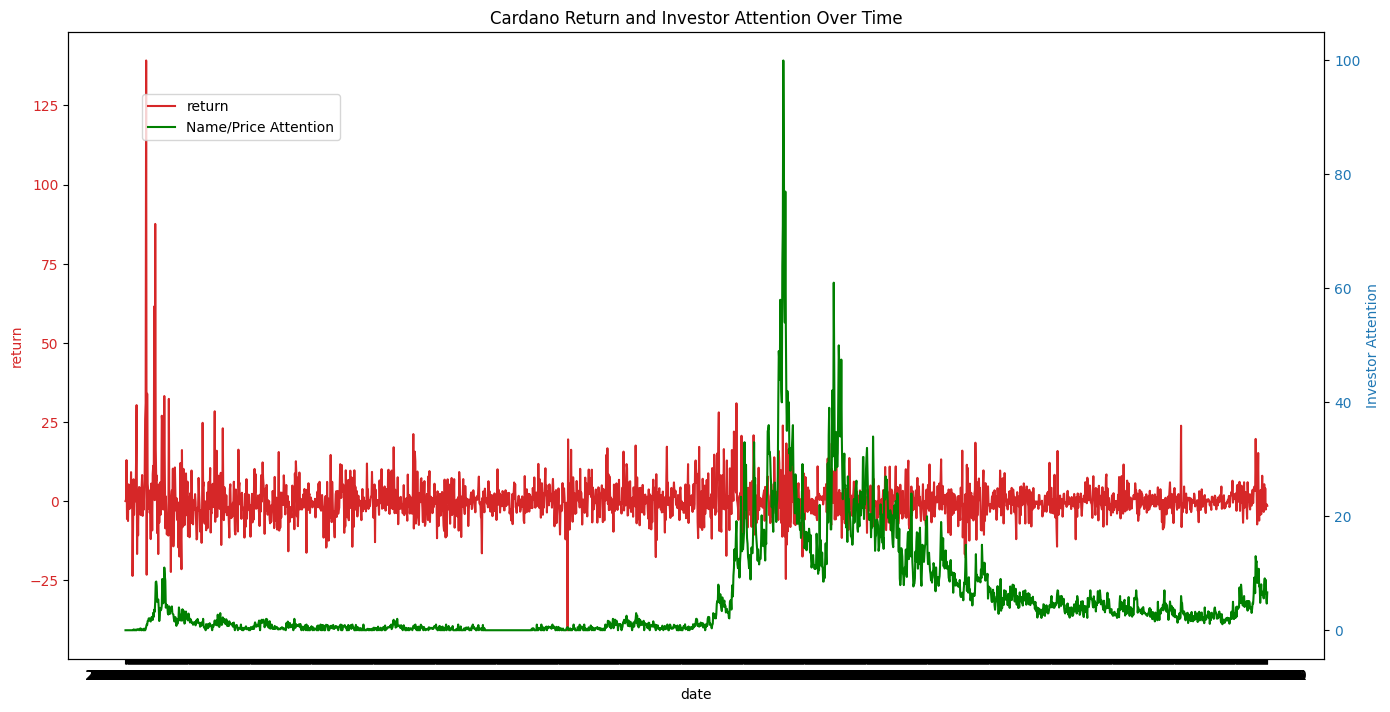

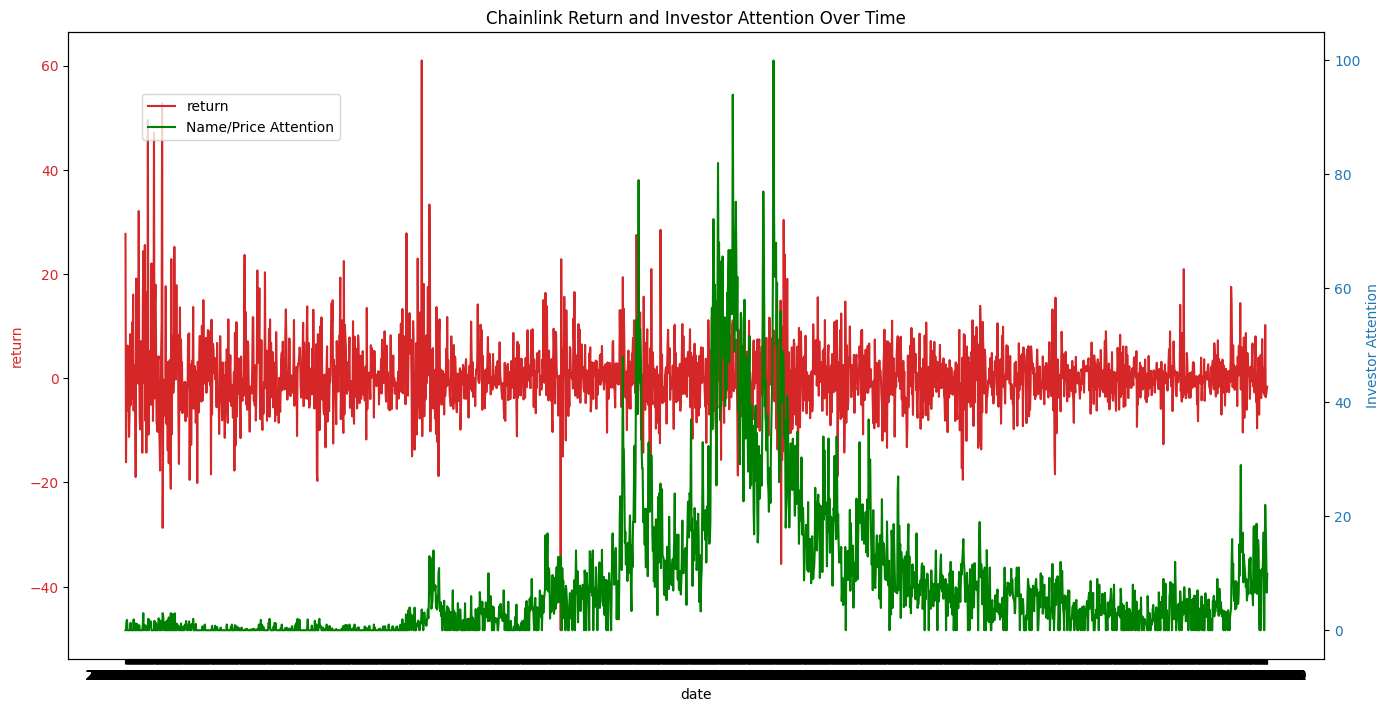

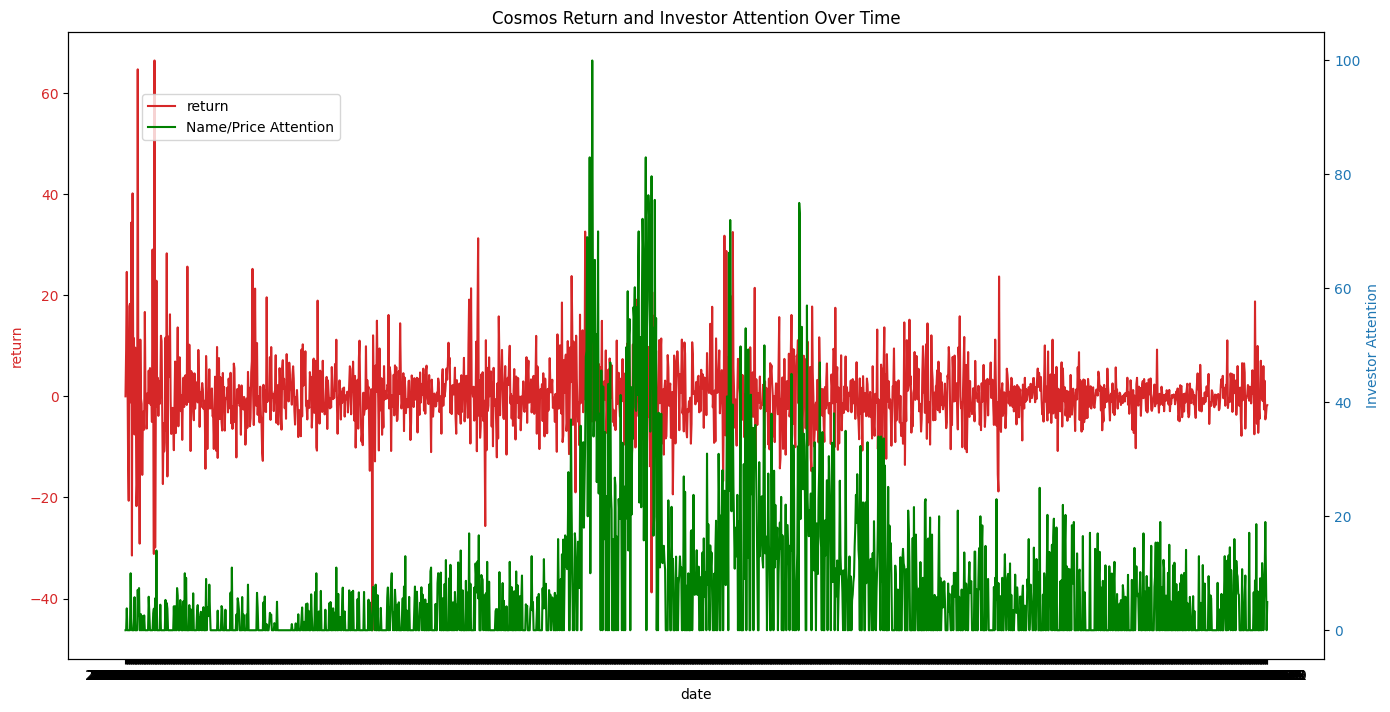

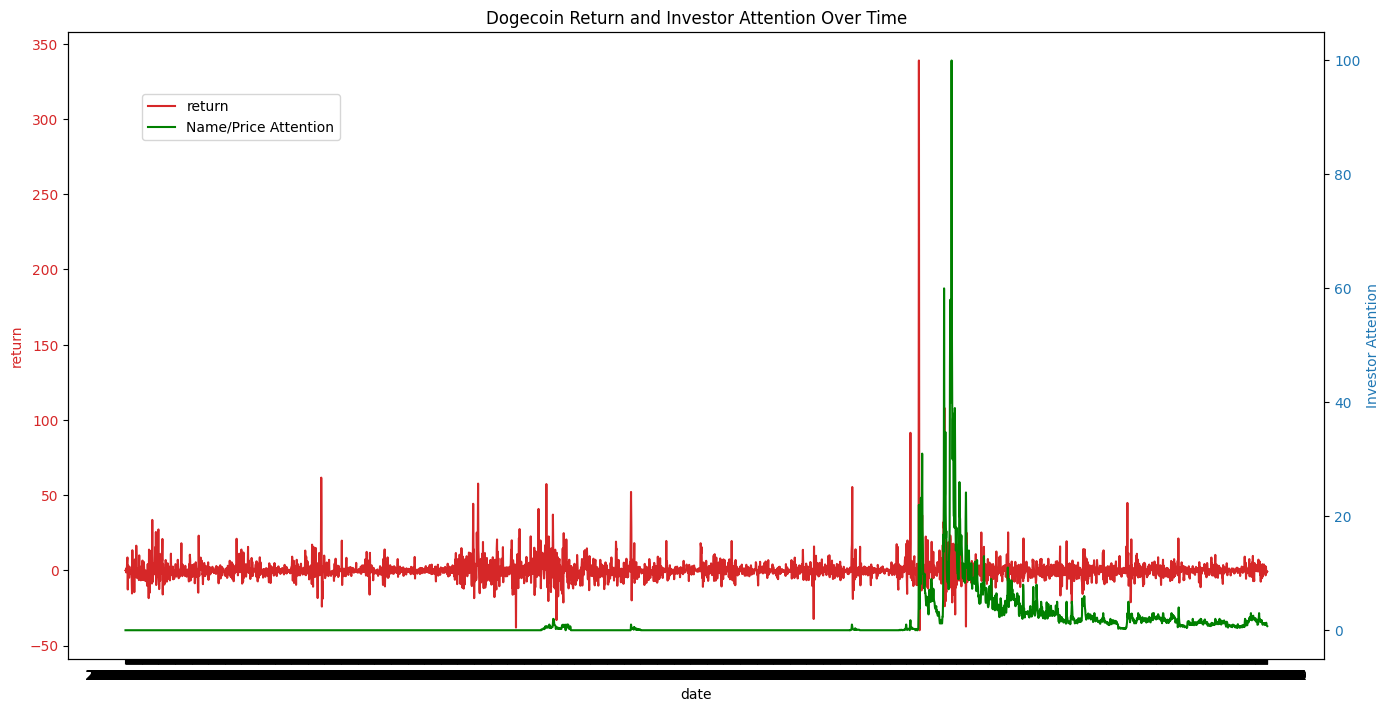

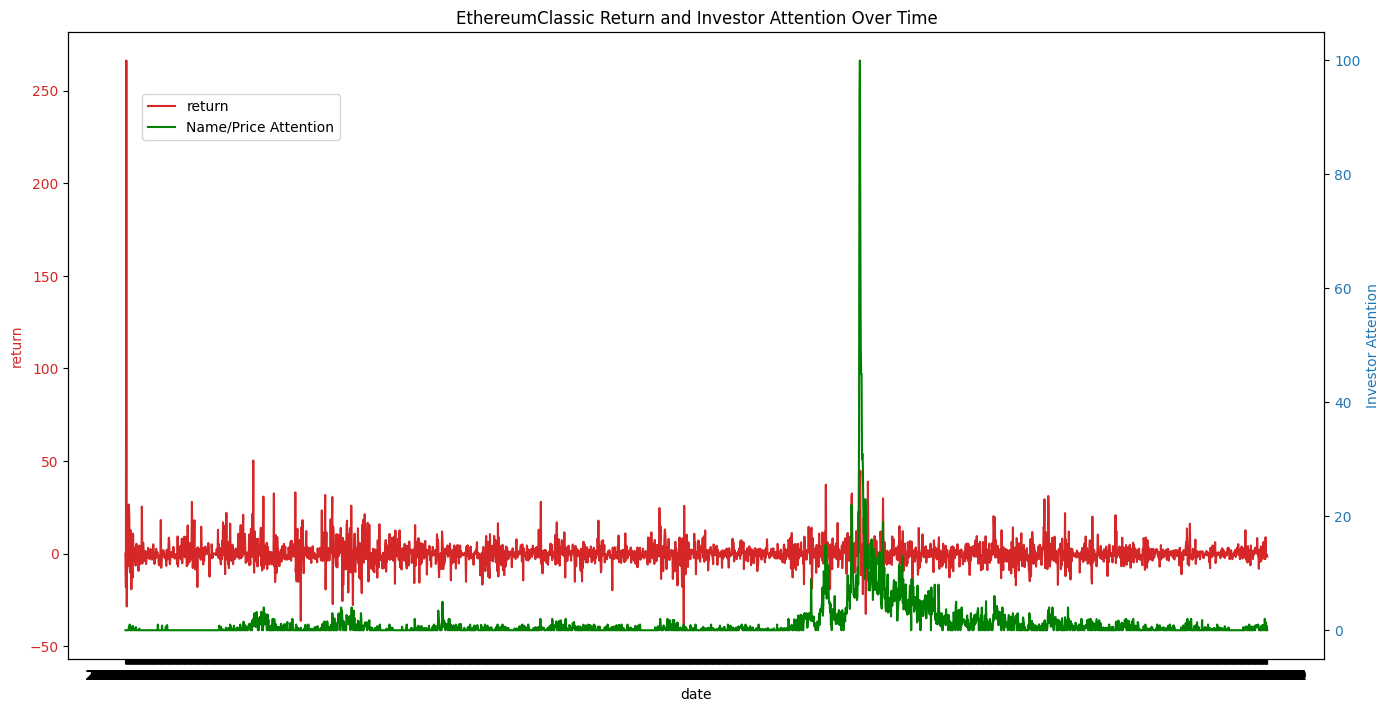

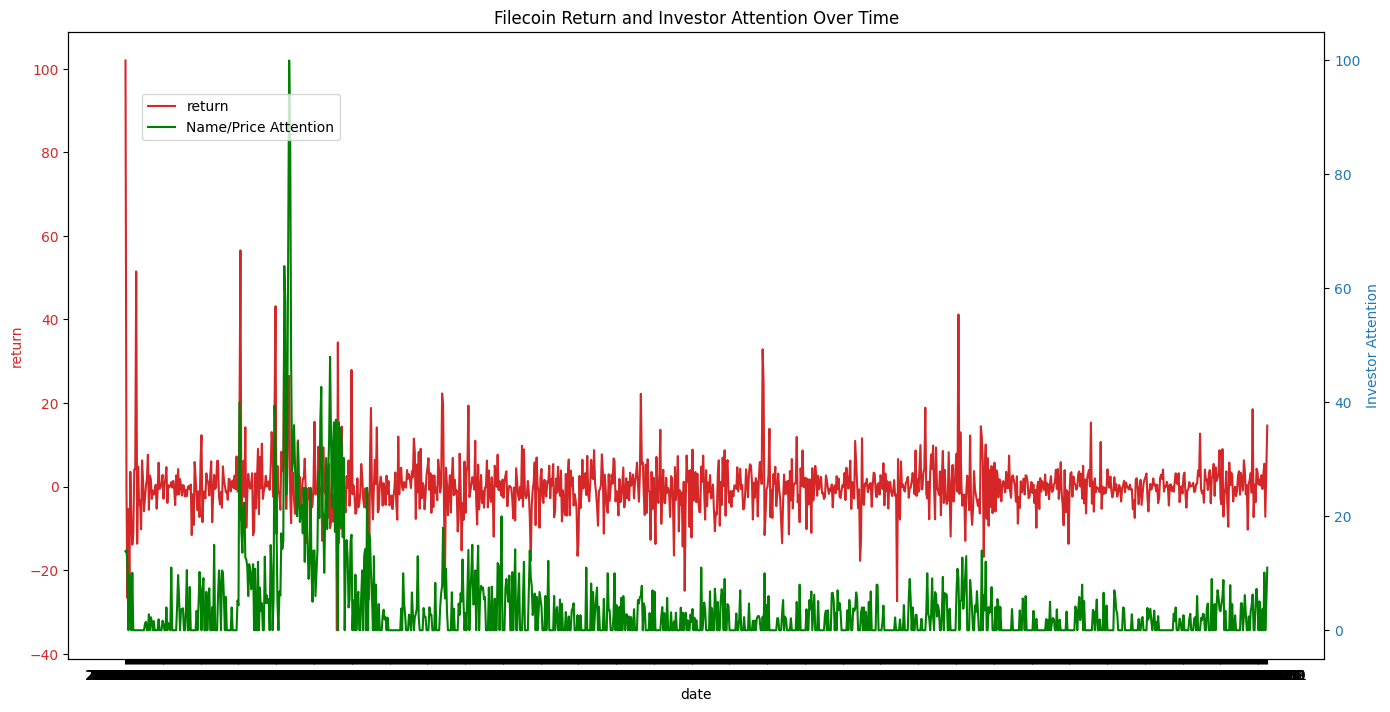

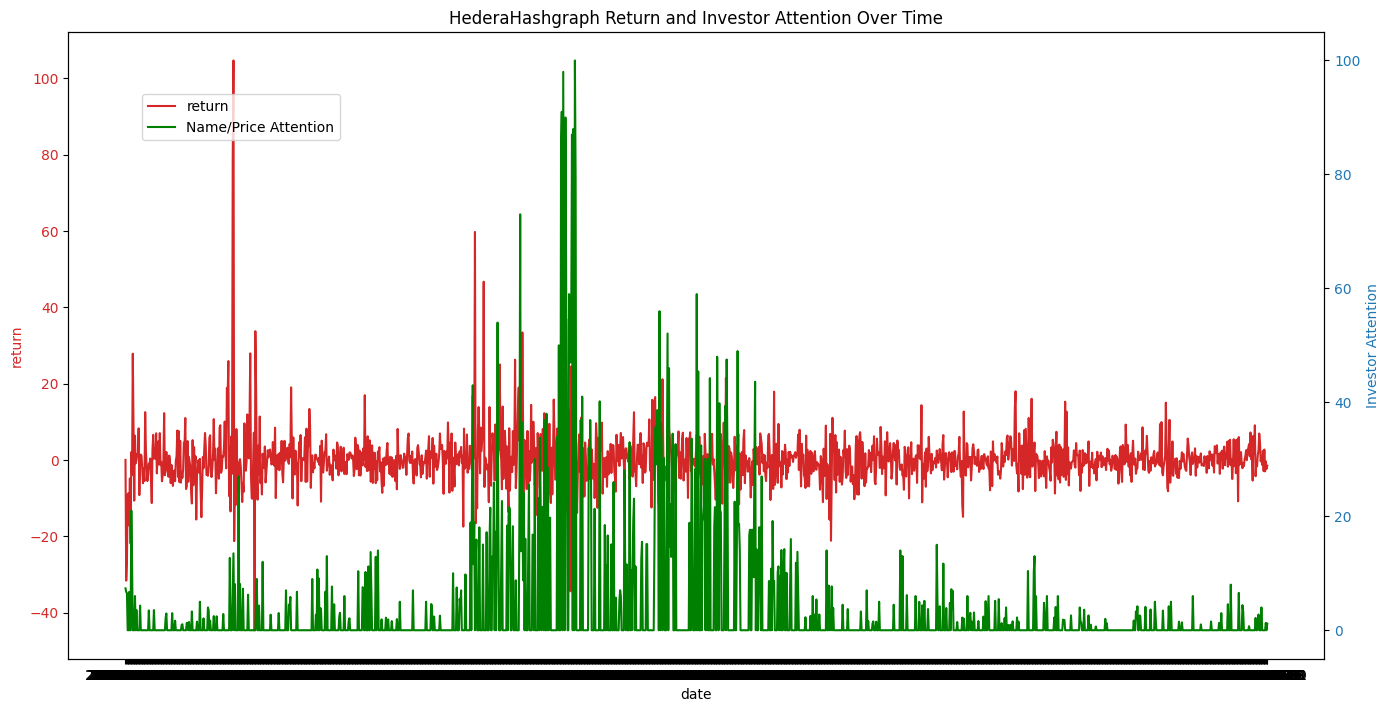

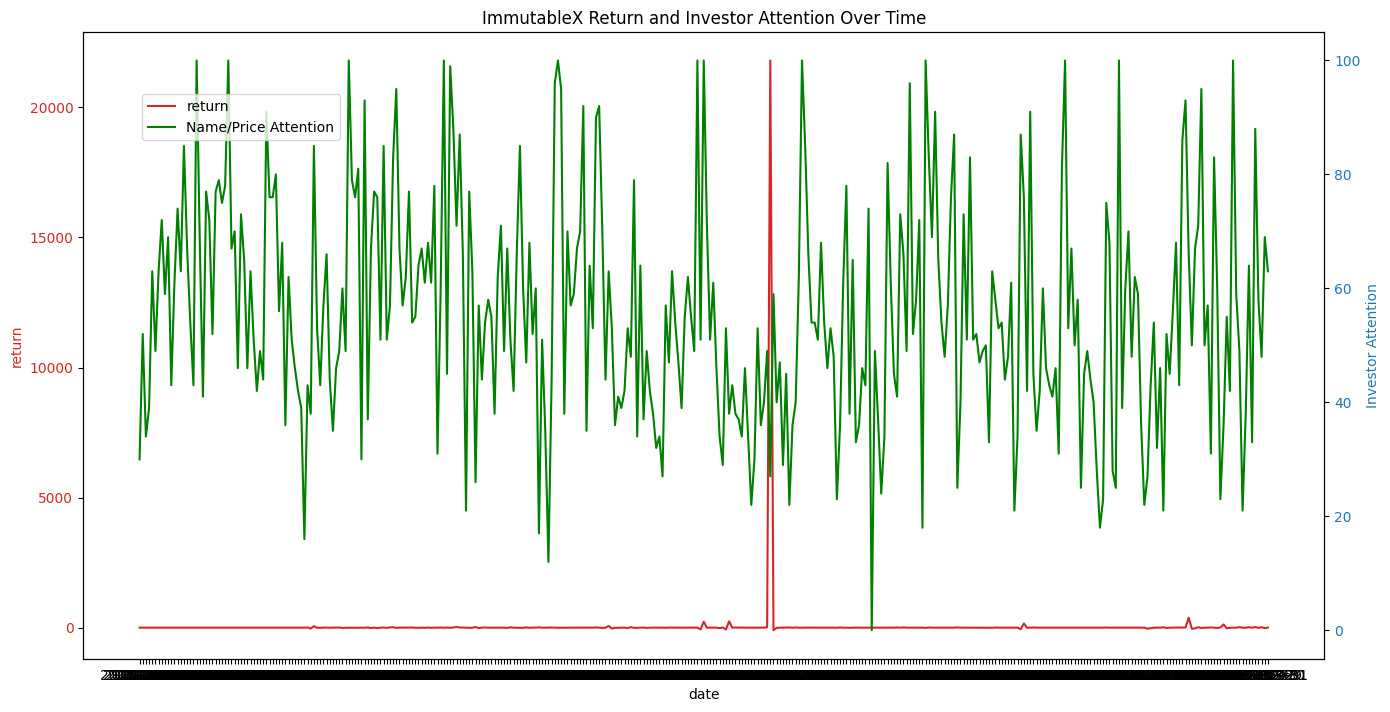

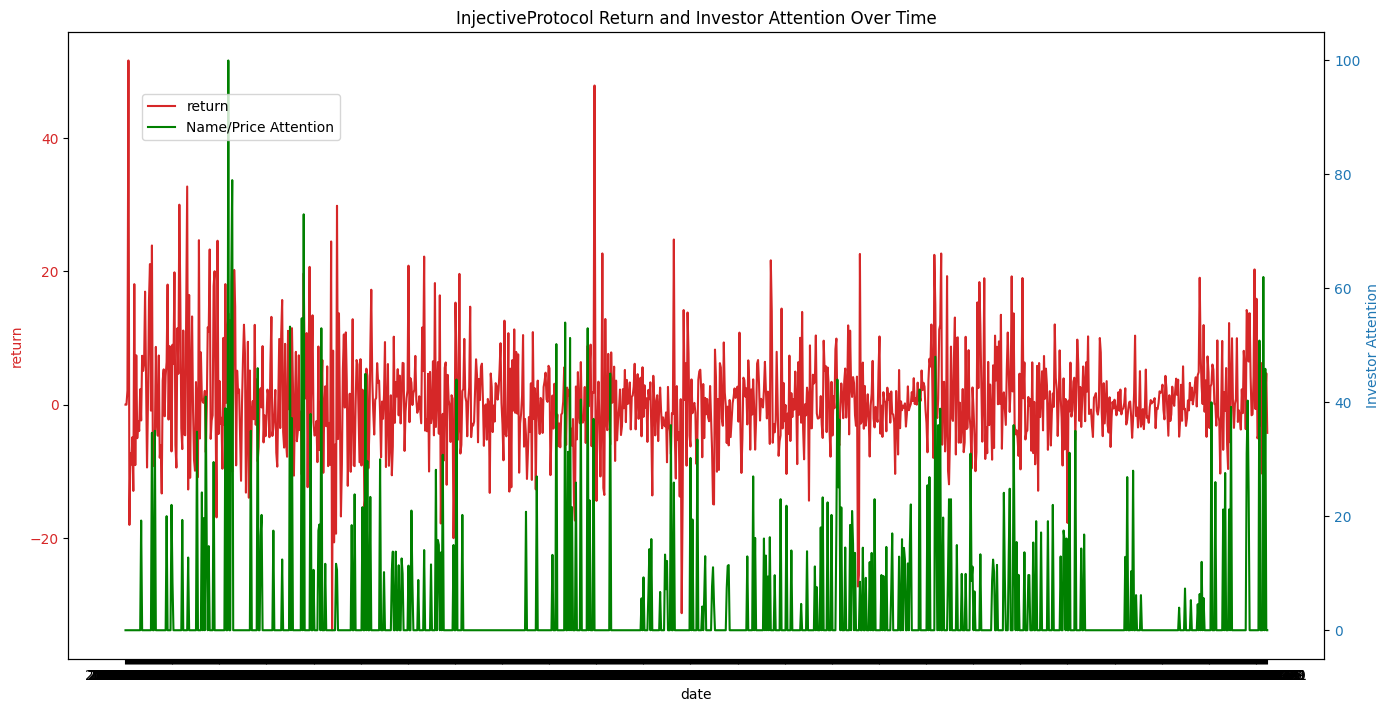

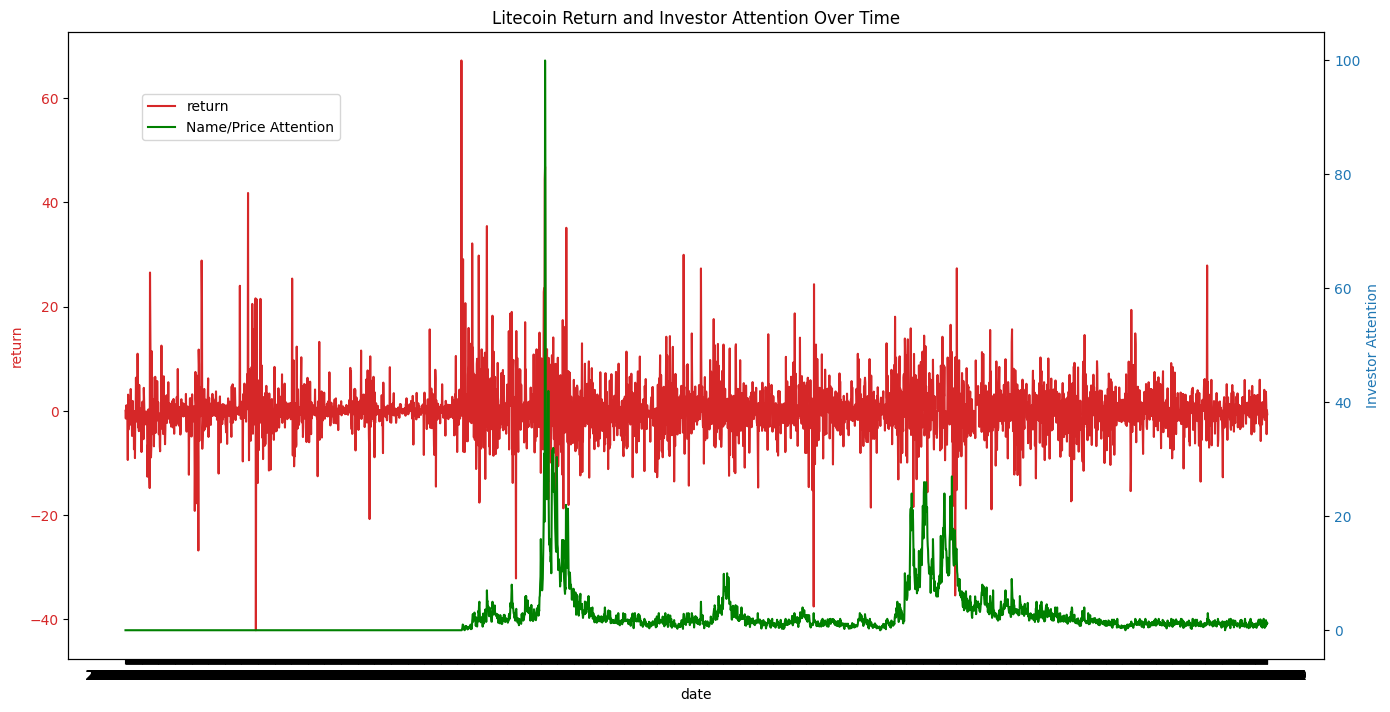

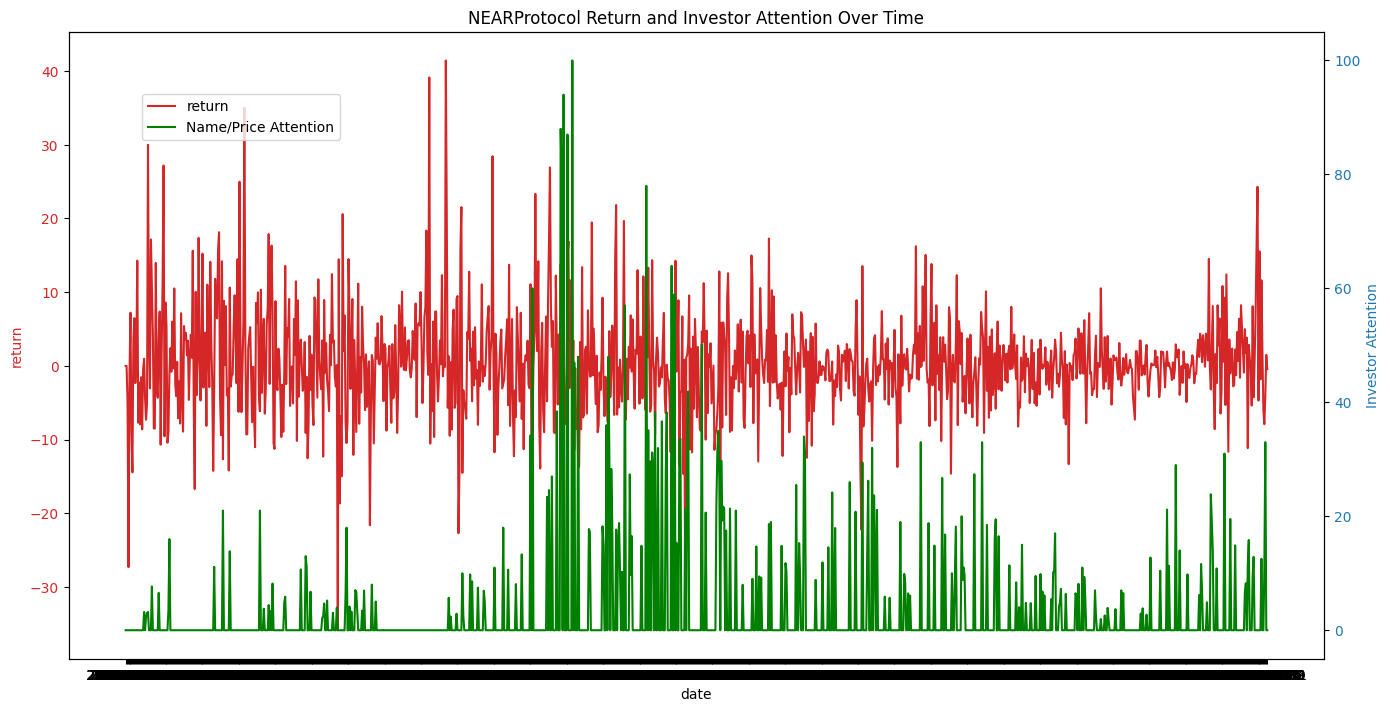

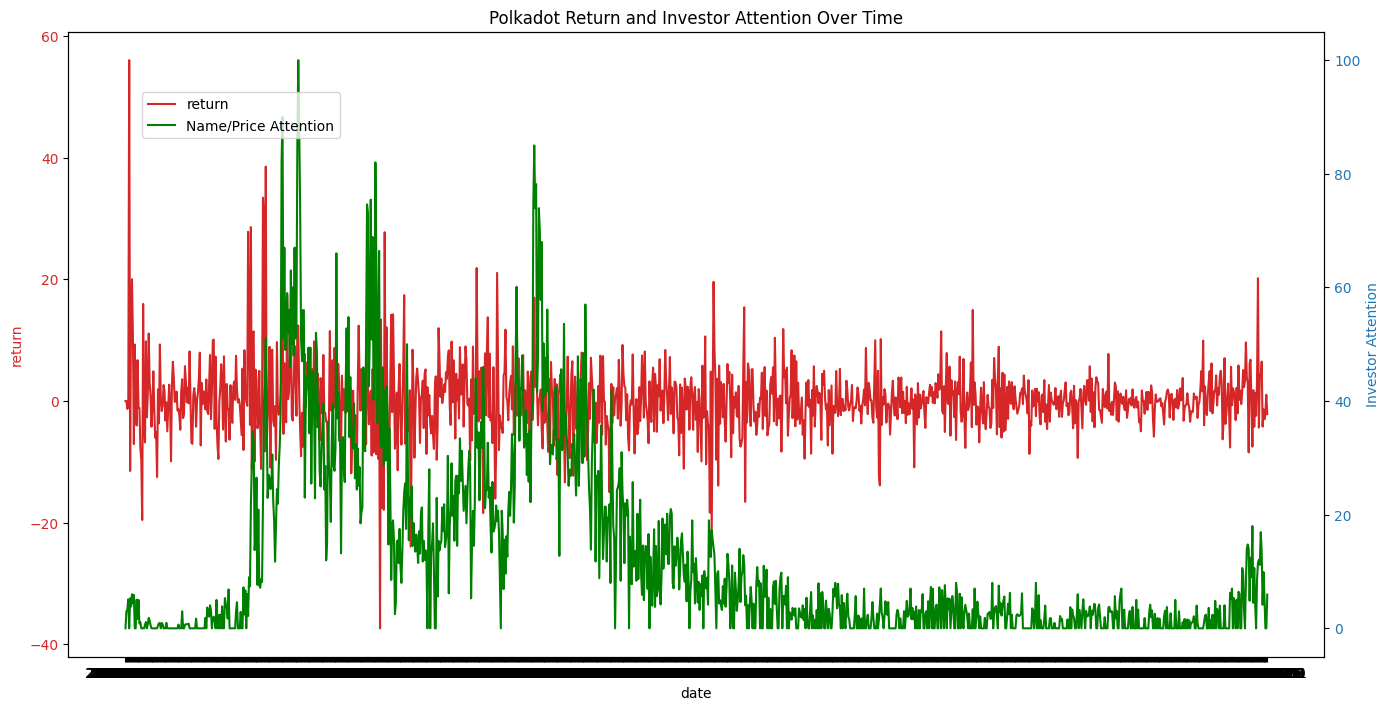

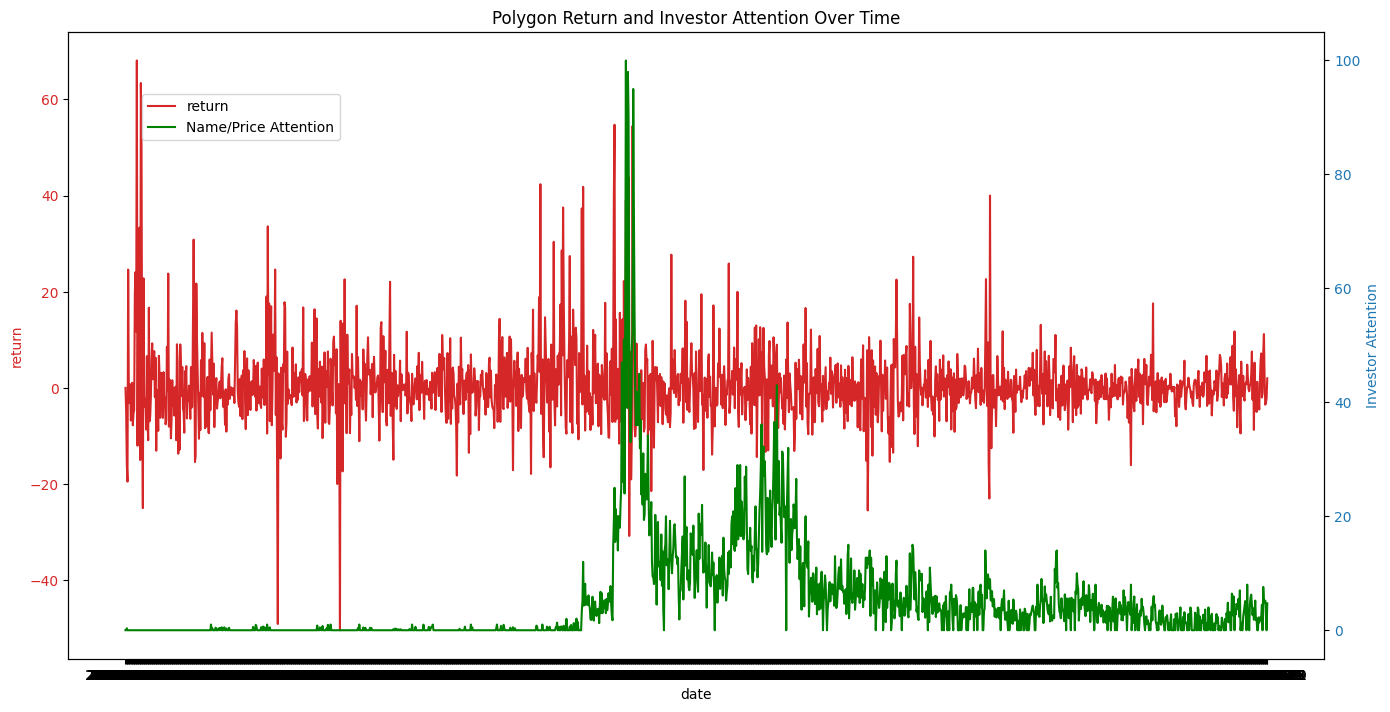

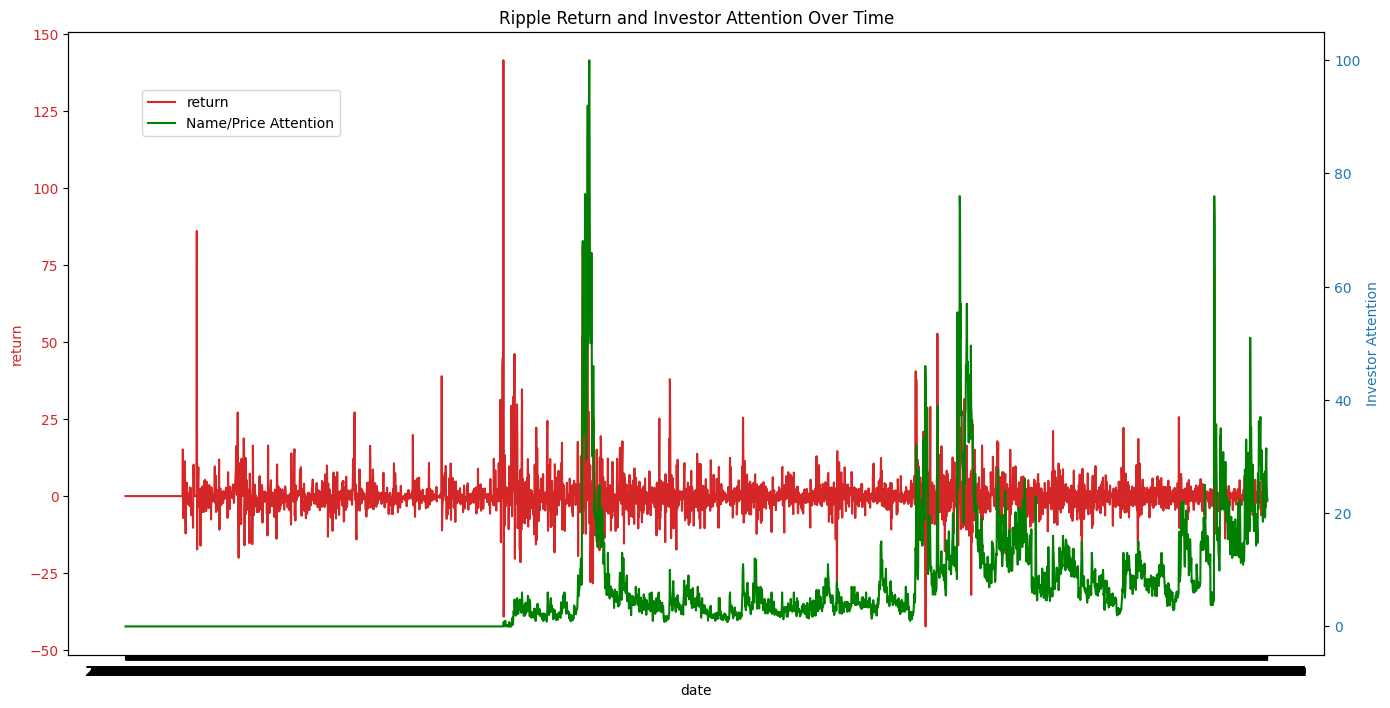

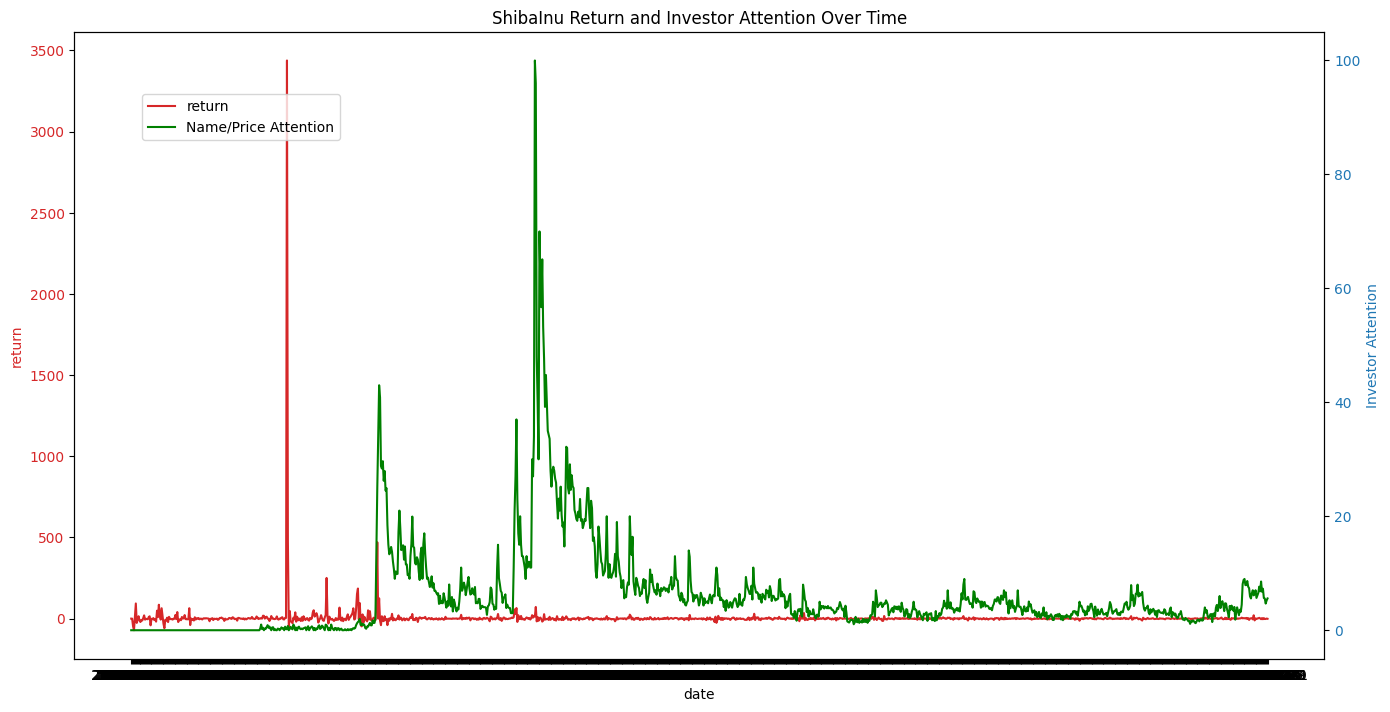

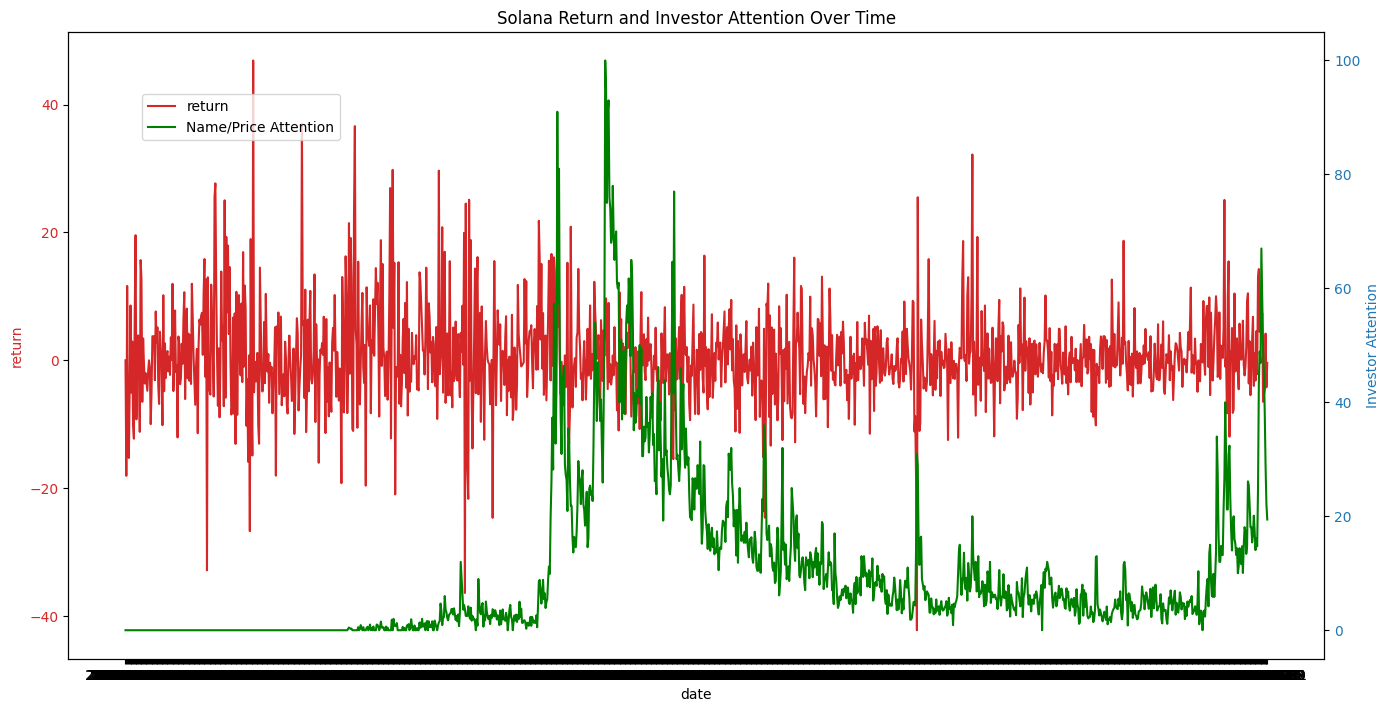

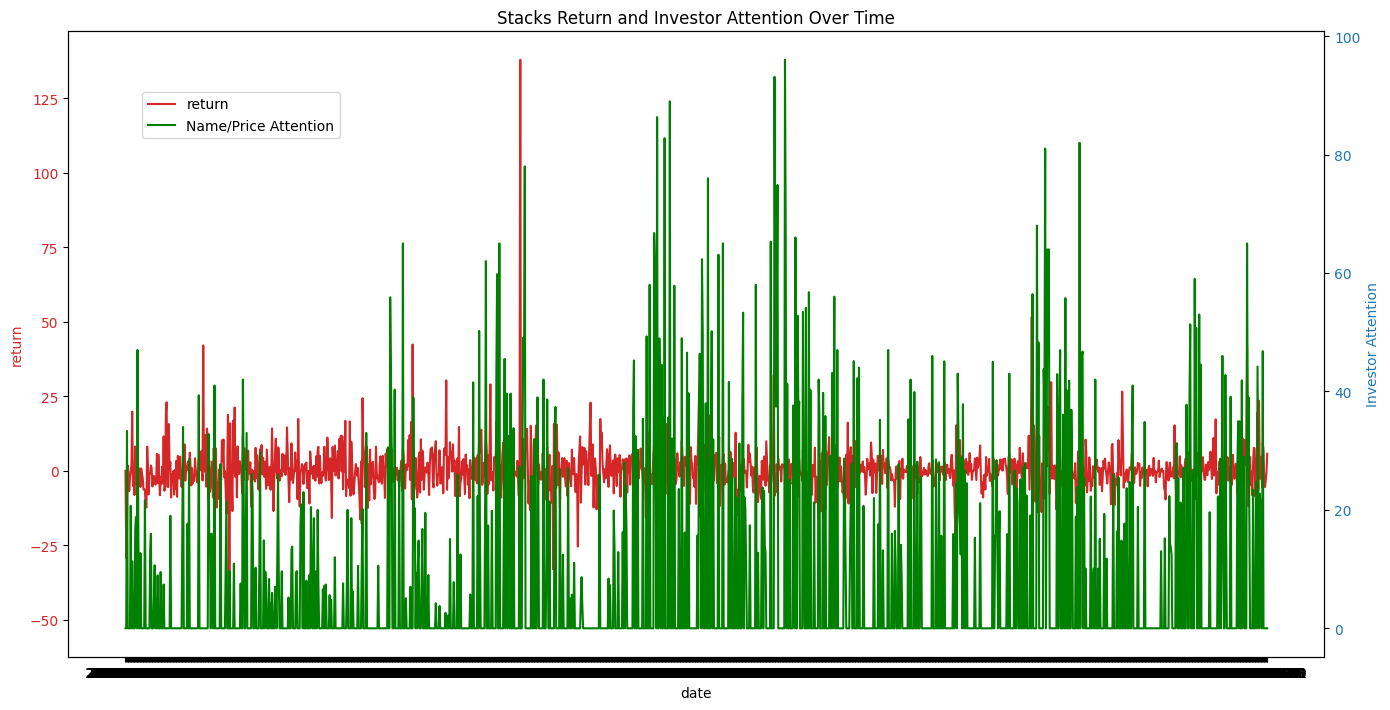

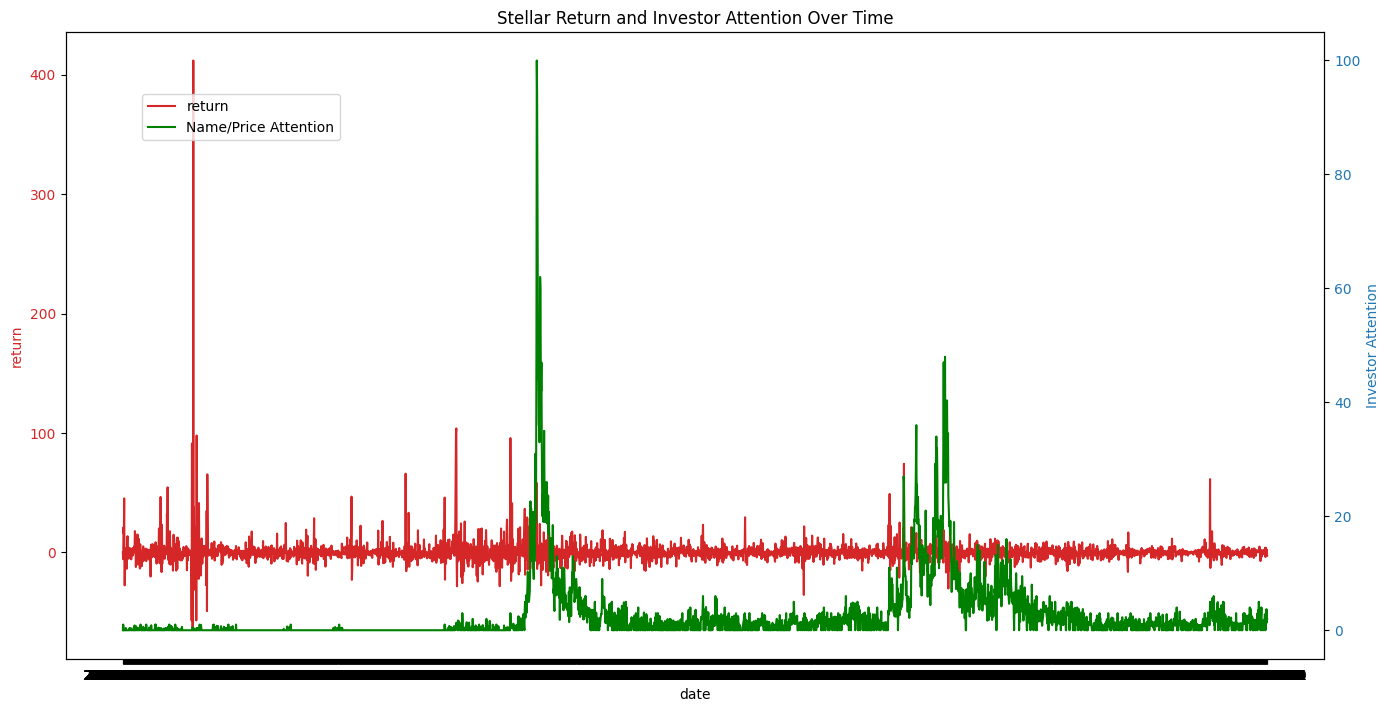

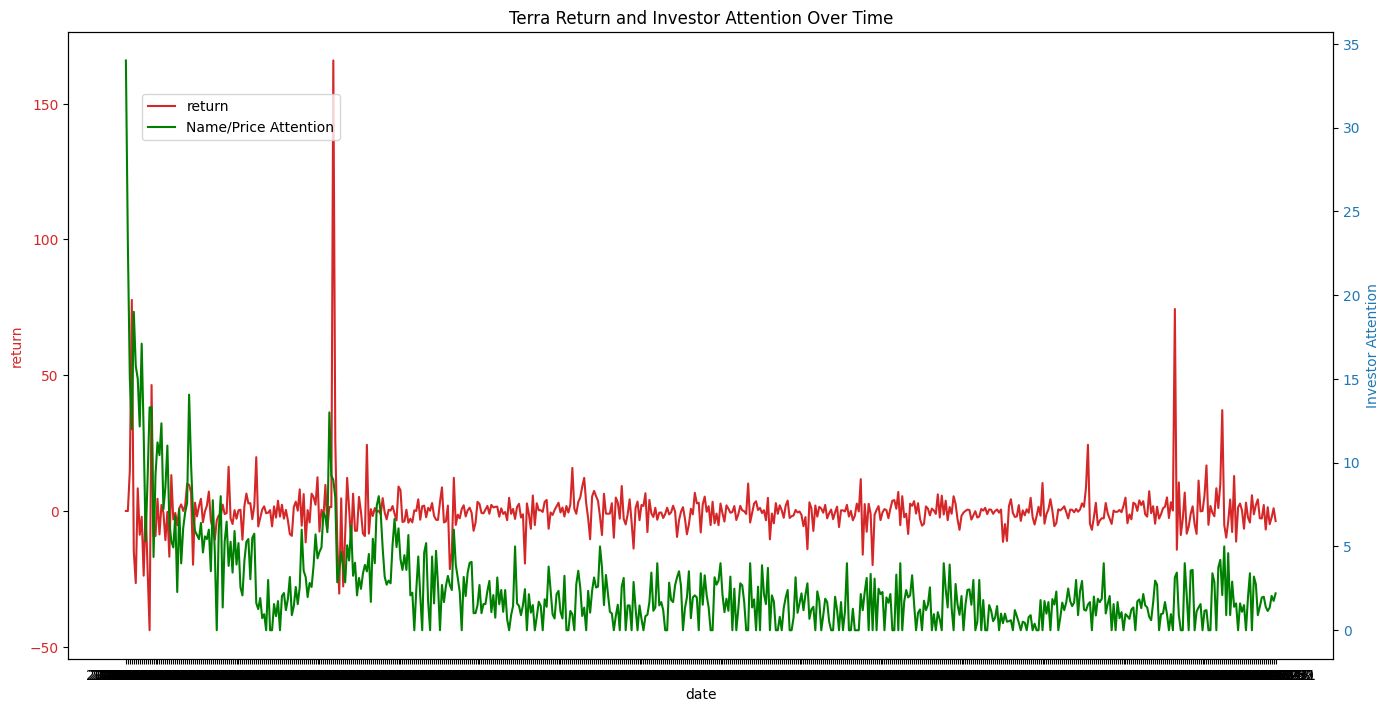

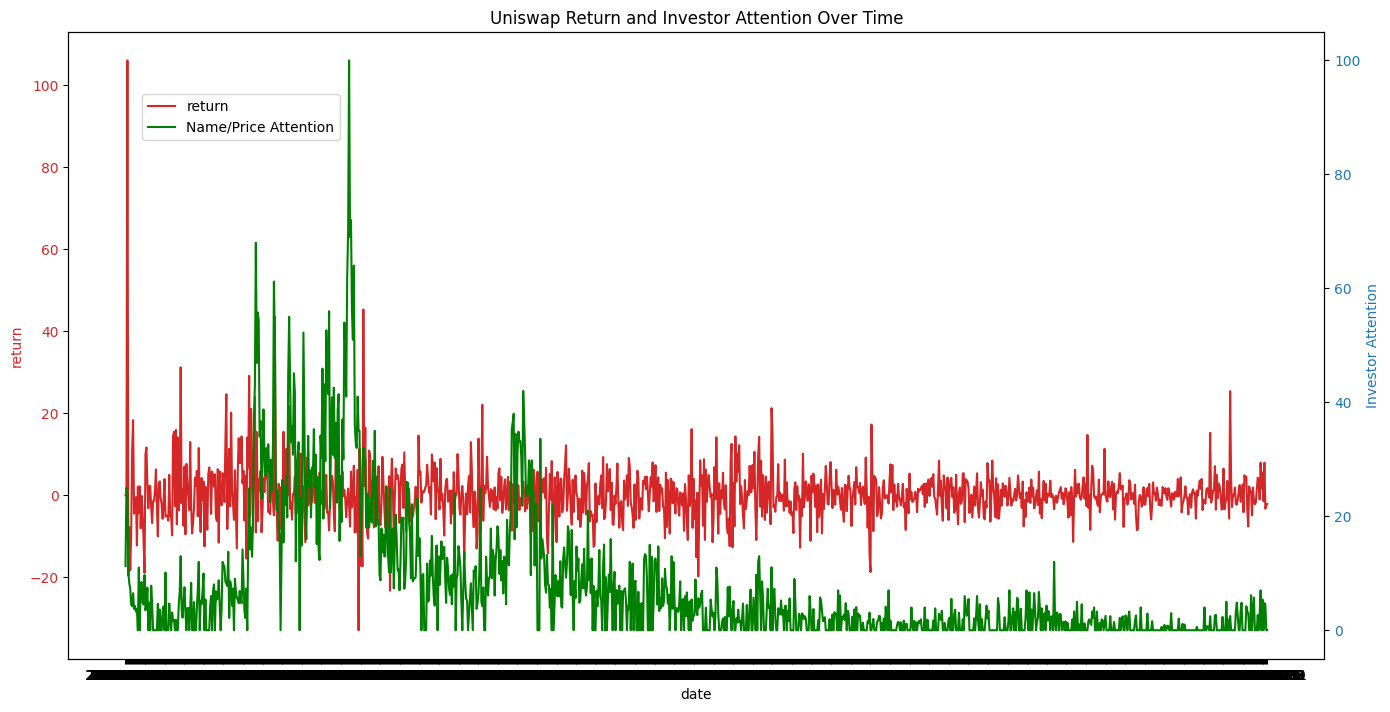

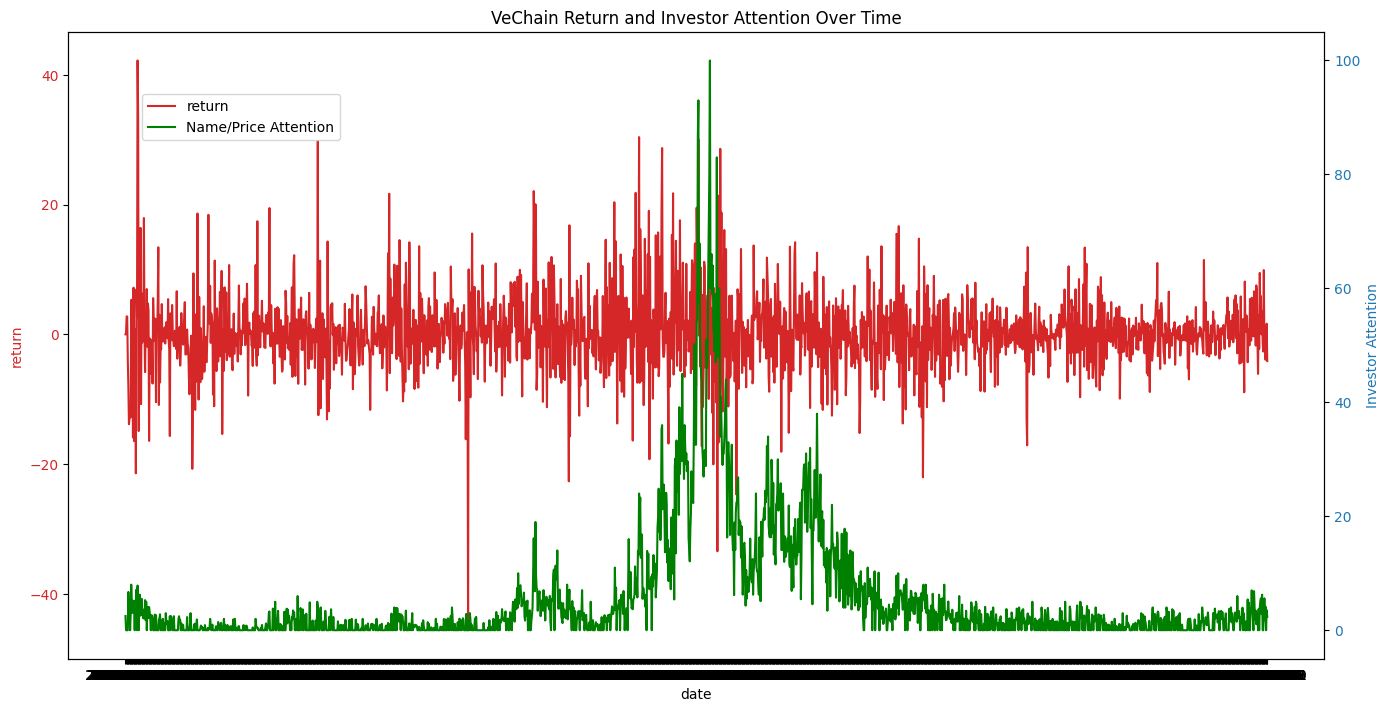

In [8]:
# Creating a time series plot for each crypto currency containing return and name_price_attention

crypto = data['crypto_name'].unique()

for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel('return', color=color)
    ax1.plot(stock_data['date'], stock_data['return'], color=color, label='return')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Investor Attention', color=color)  # we already handled the x-label with ax1
    ax2.plot(stock_data['date'], stock_data['name_price_attention'], color='green', label='Name/Price Attention')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'{currency} Return and Investor Attention Over Time')
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
    plt.show()

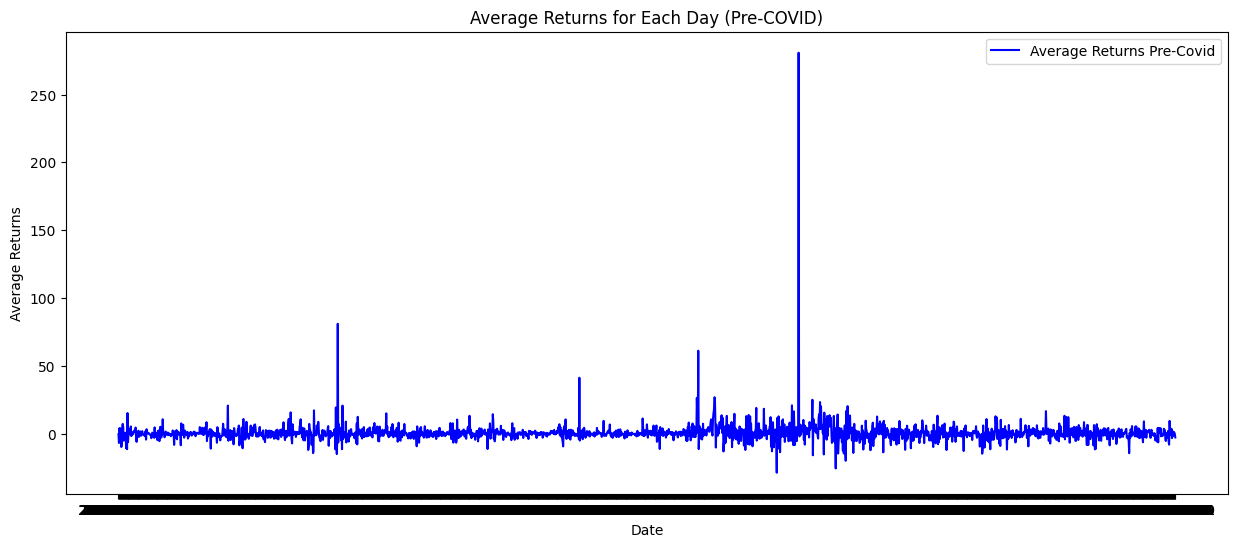

In [9]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 

average_returns_pre_covid = data[data['Post-covid'] == 0].groupby('date')['return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid',color='blue')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

In [10]:
data.head()

date     Price        Volume    Market_cap crypto_name  \
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00    Algorand   
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08    Algorand   
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07    Algorand   
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07    Algorand   
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07    Algorand   

   name_price_attention  return  Post-covid  
0                  1.50   0.000           0  
1                  0.00  97.663           0  
2                  1.38 -31.938           0  
3                  0.00 -12.022           0  
4                  0.00 -25.810           0

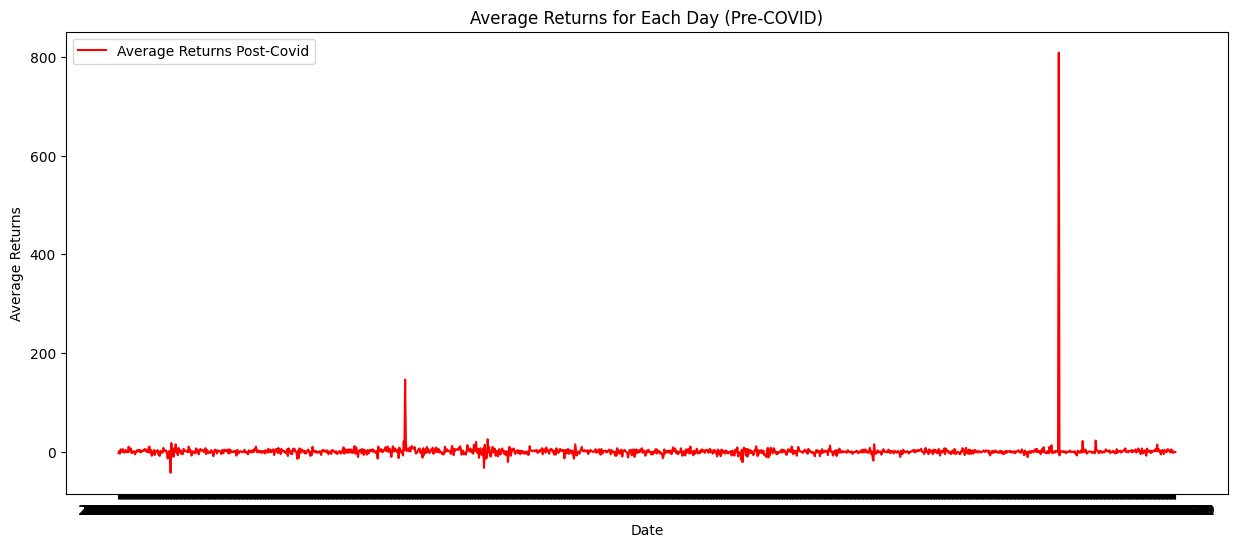

In [11]:
# Looking at the impact of Covid: Average Returns per day Pre-covid 
average_returns_post_covid = data[data['Post-covid'] == 1].groupby('date')['return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns Post-Covid',color='red')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

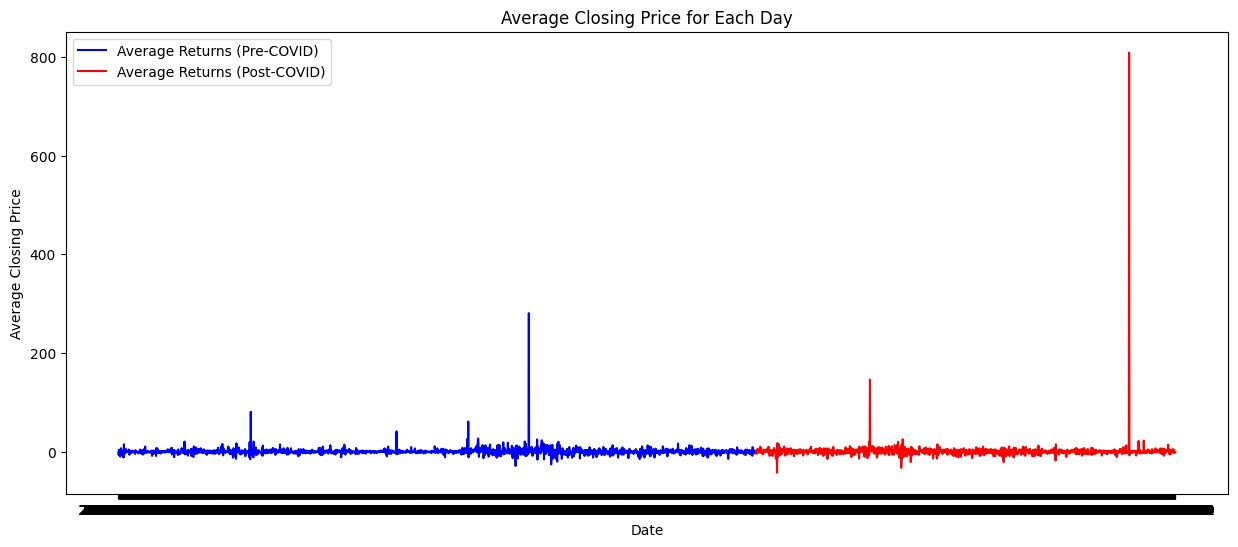

In [12]:
#Putting both together to see the on the same scale
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns (Pre-COVID)', color='blue')
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns (Post-COVID)', color='red')
plt.title('Average Closing Price for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


### 2. Distributions of Independent Variables

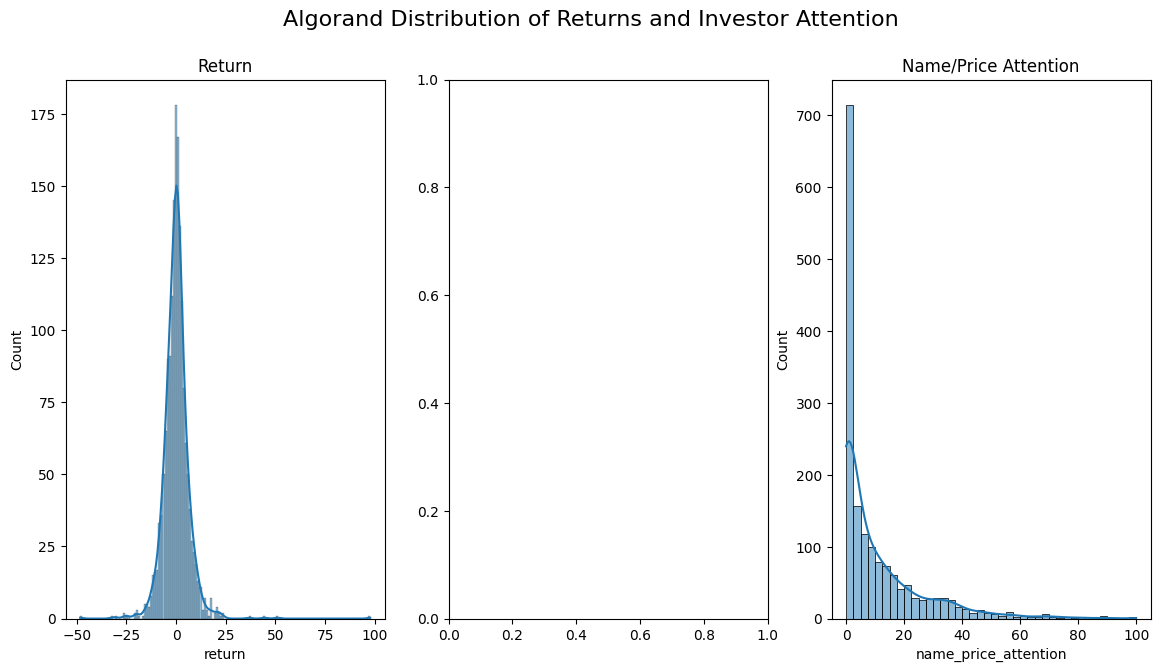

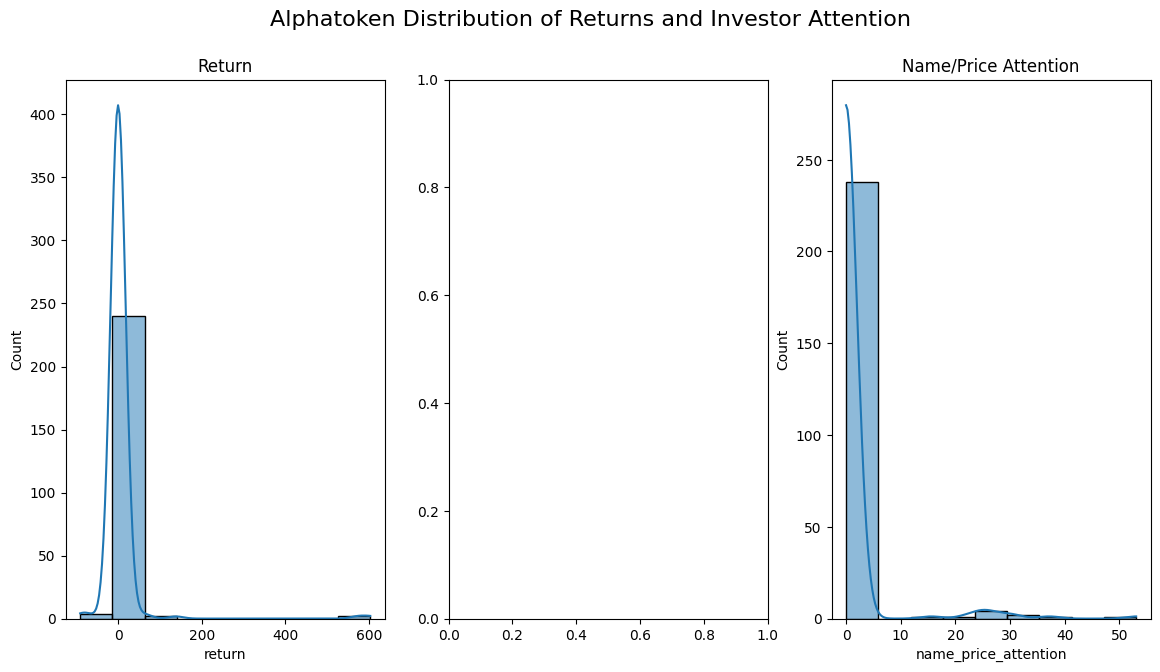

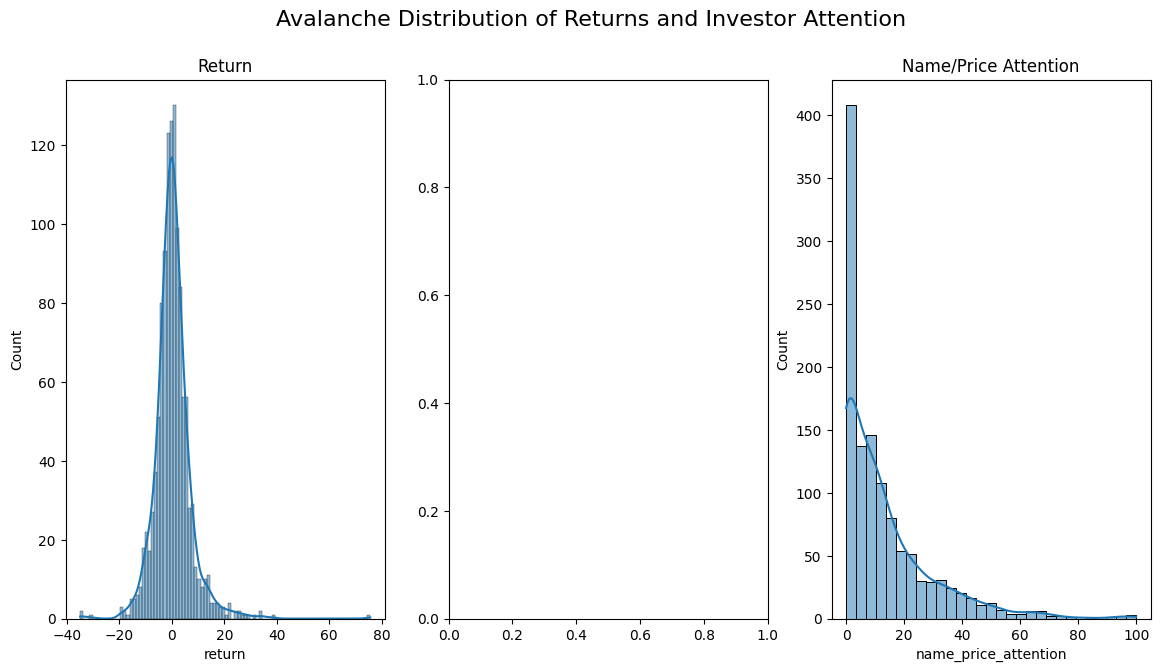

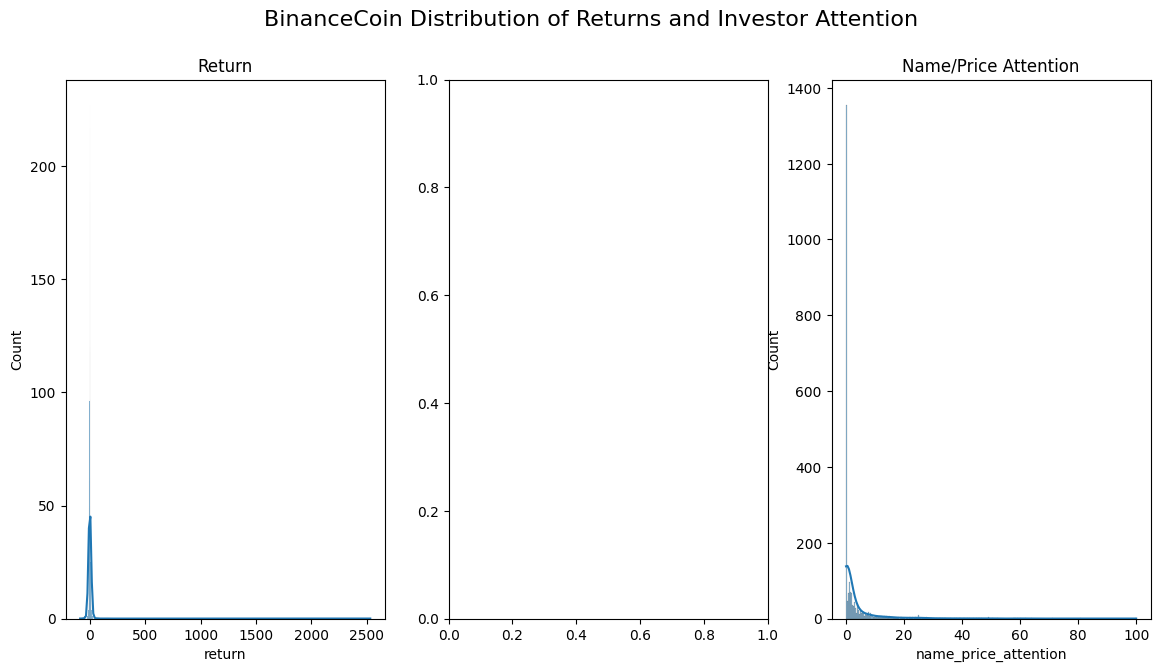

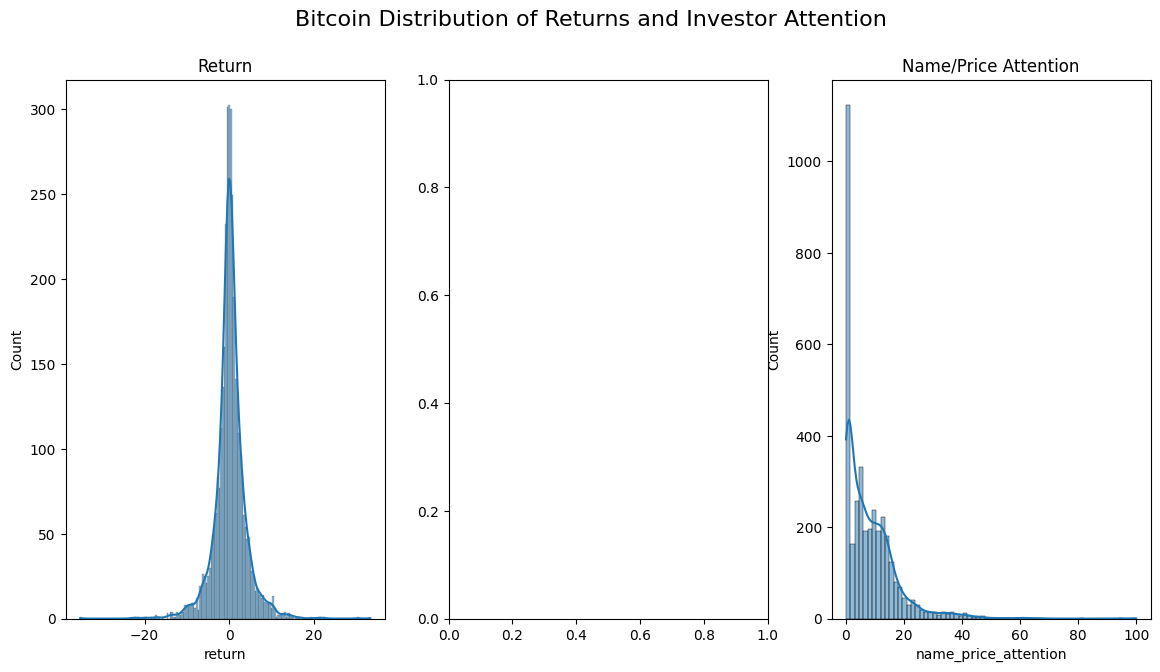

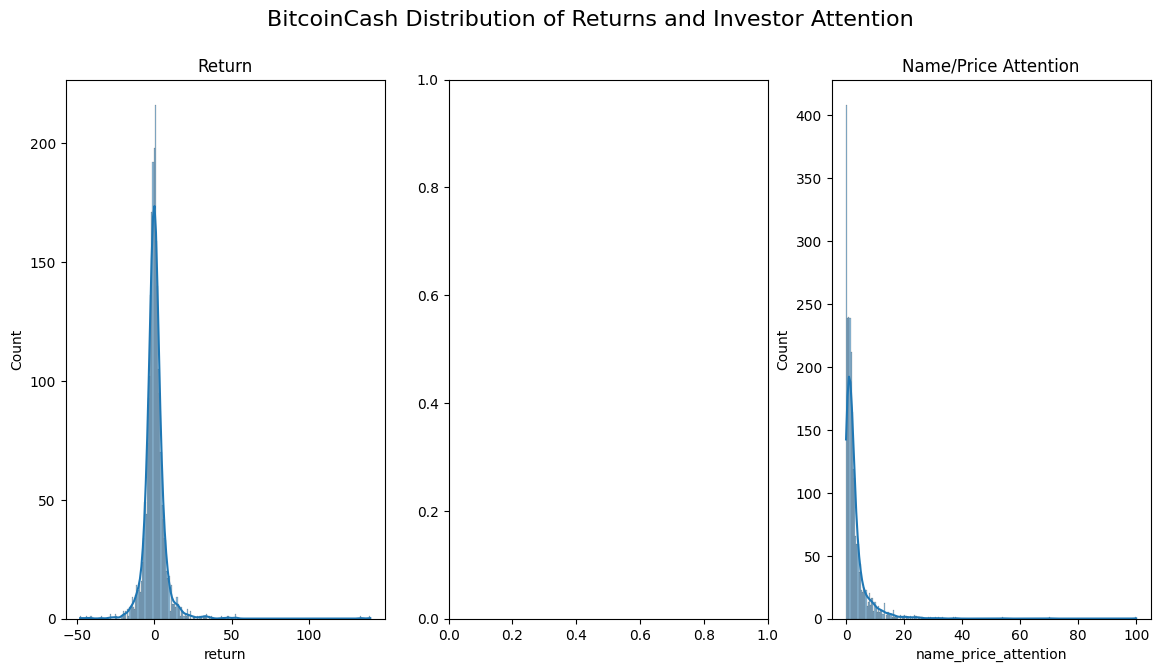

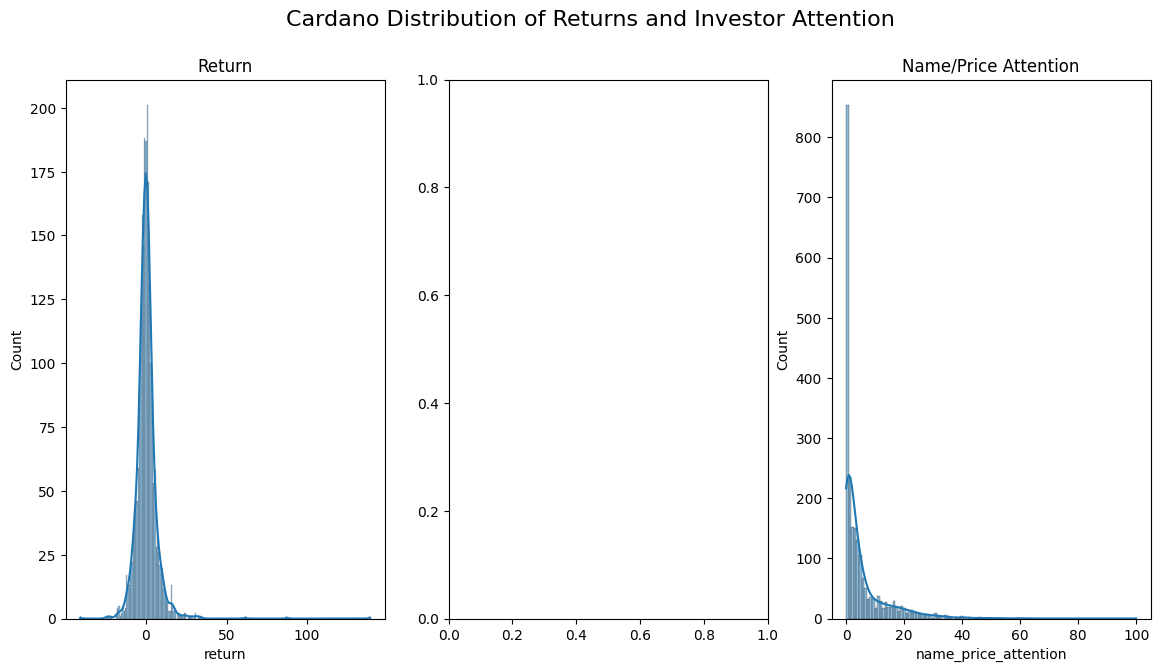

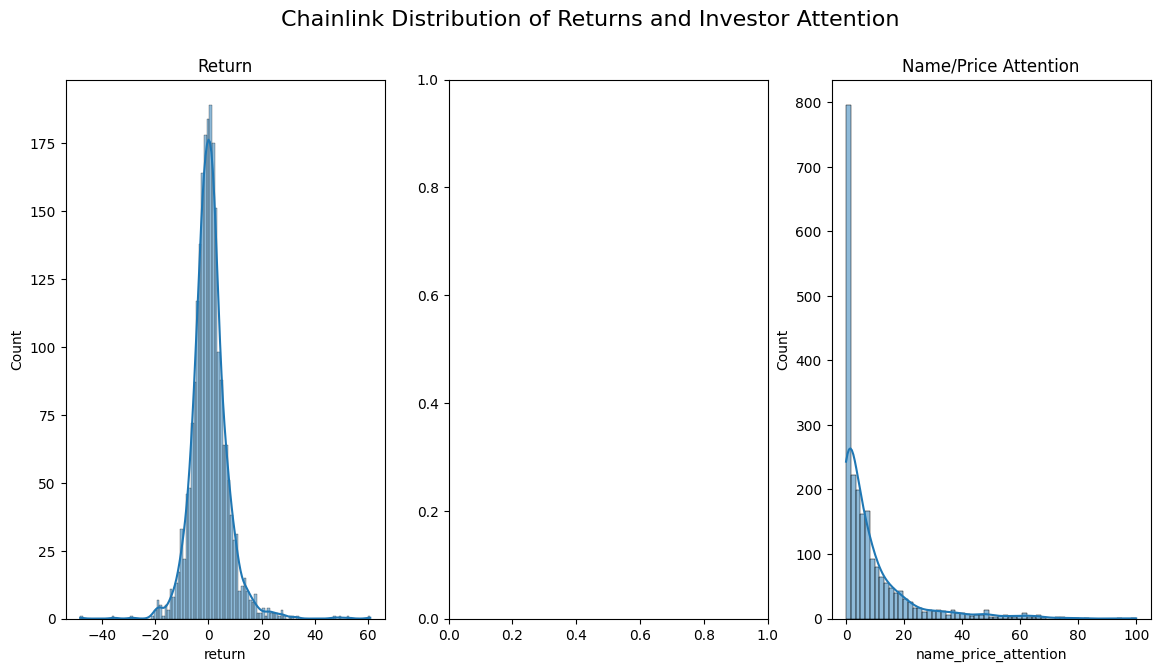

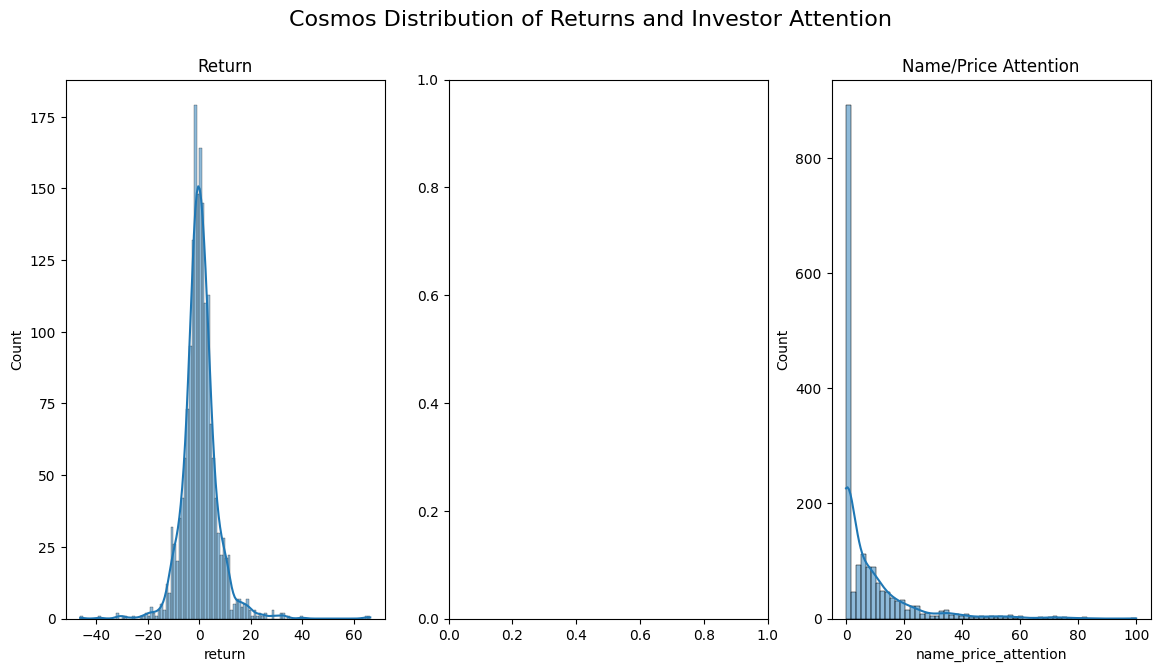

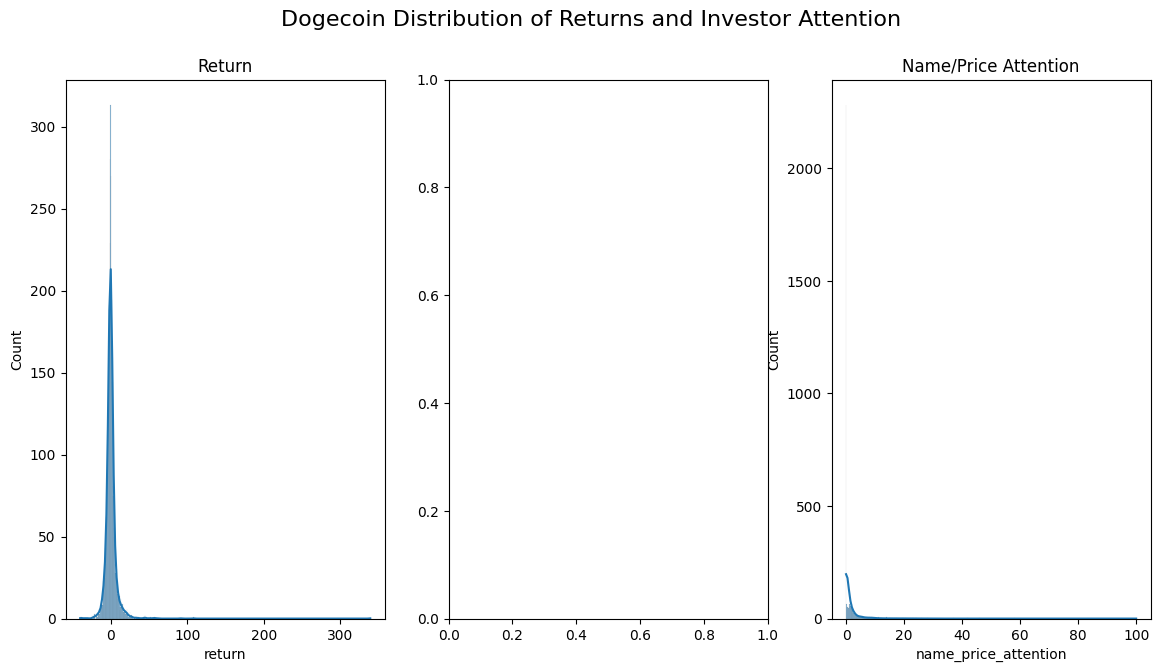

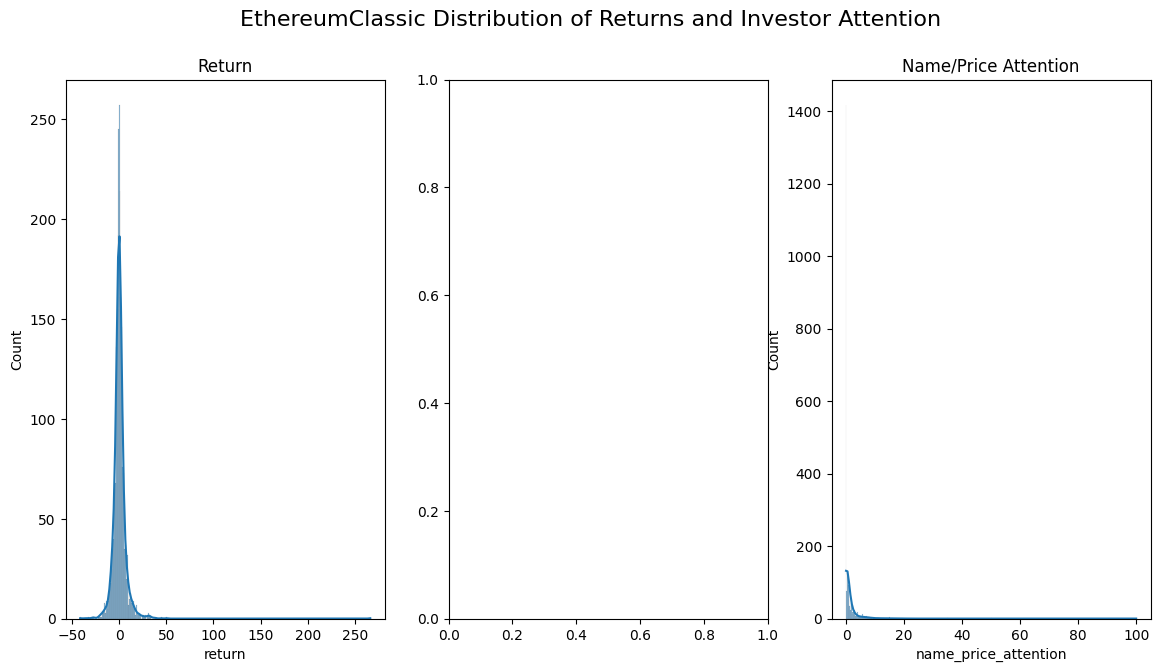

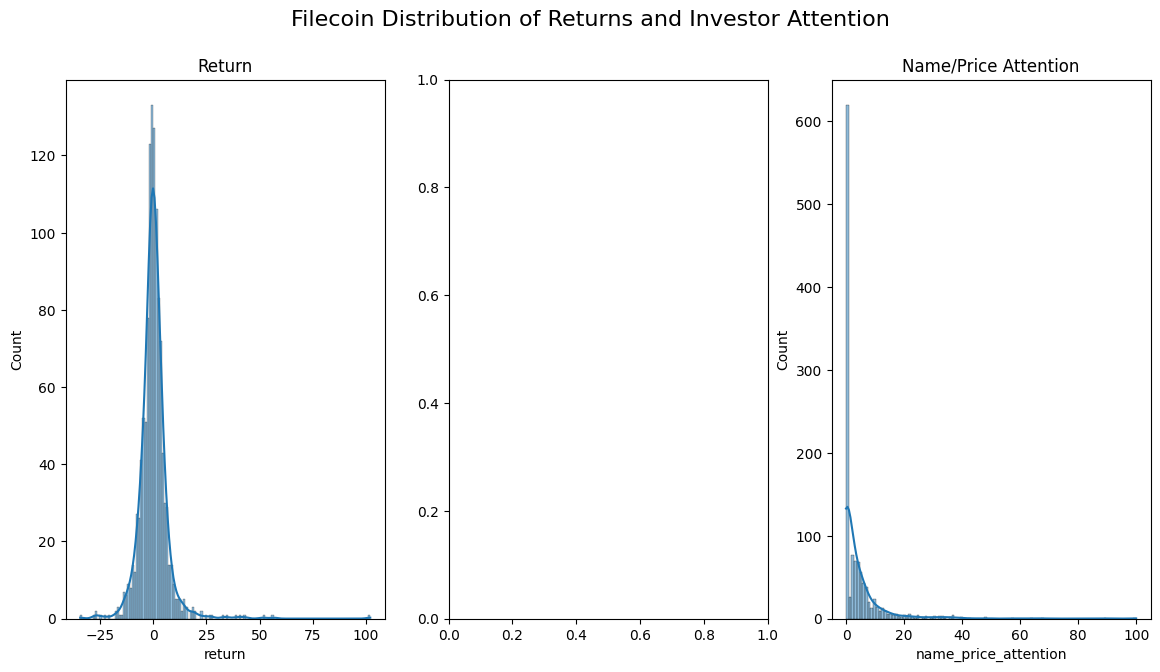

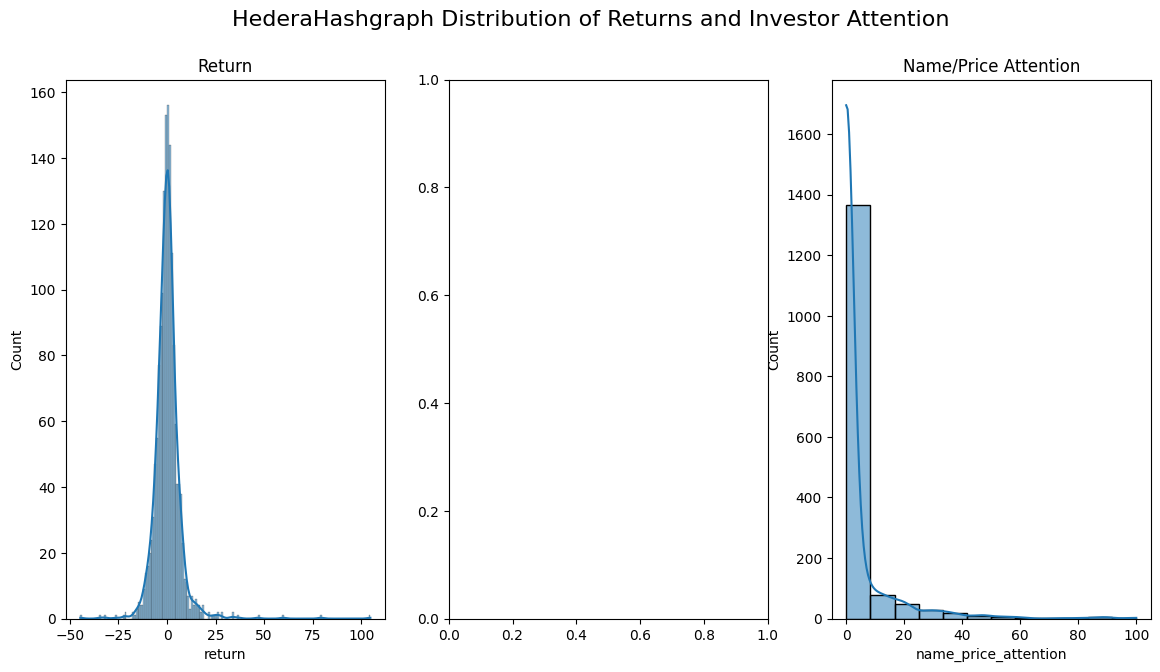

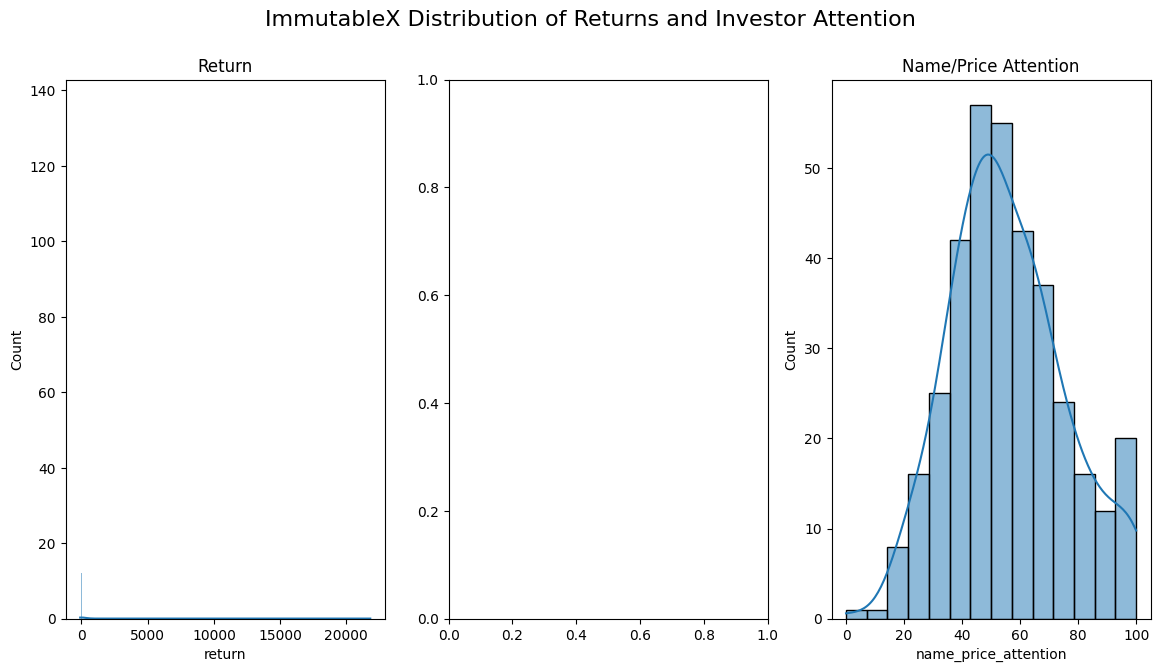

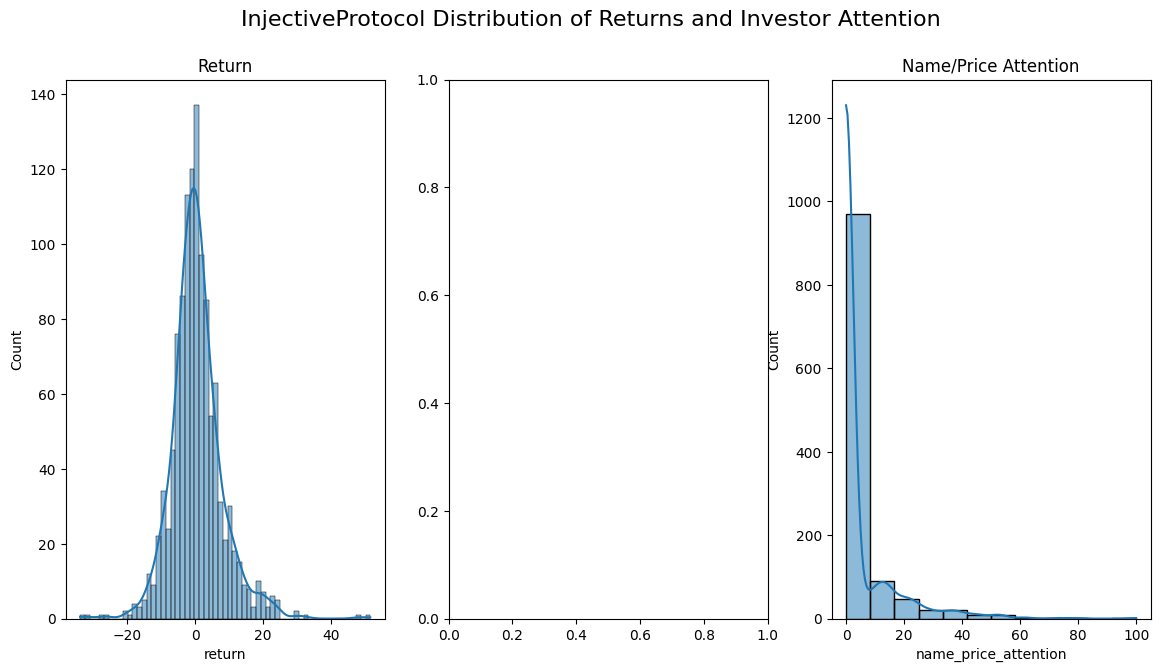

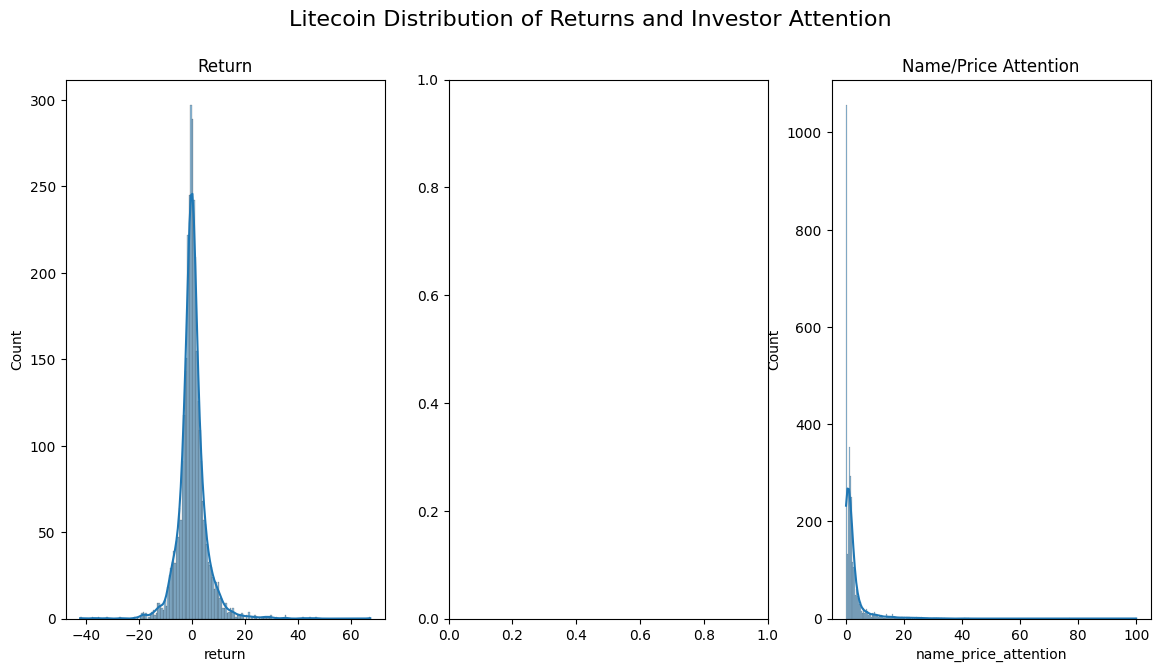

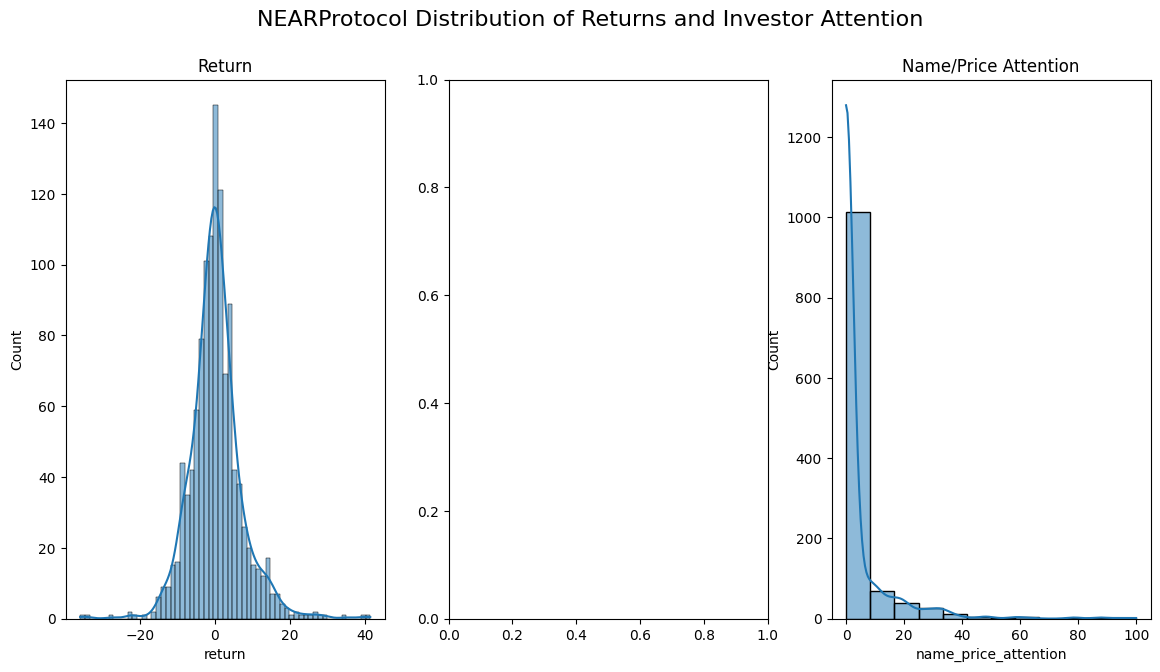

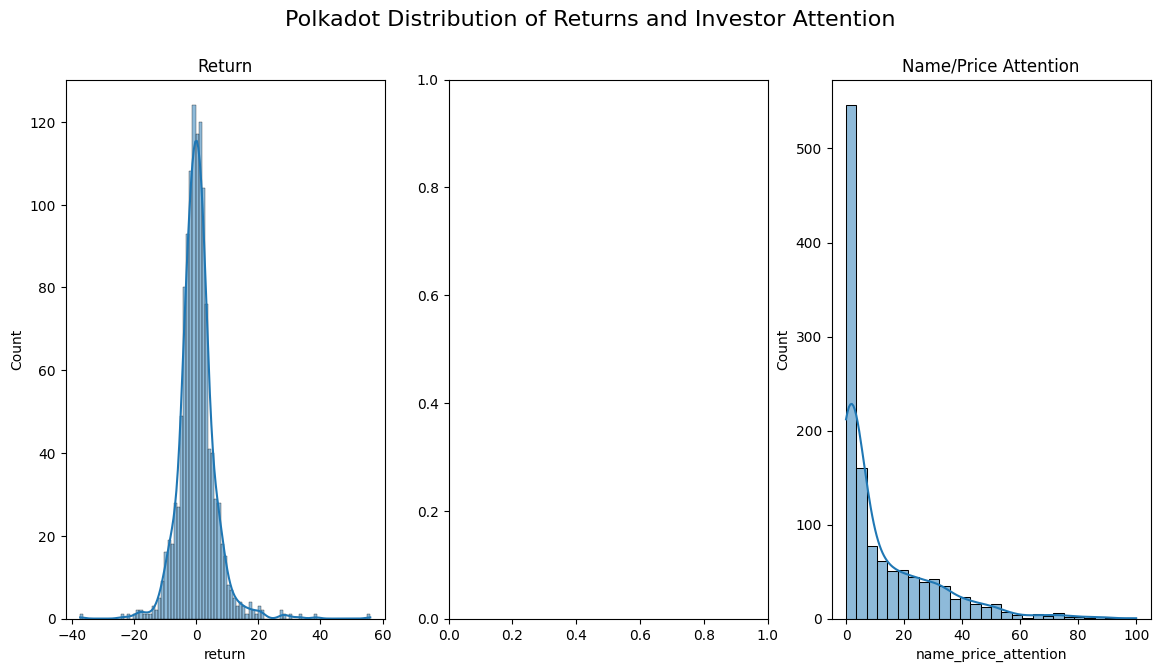

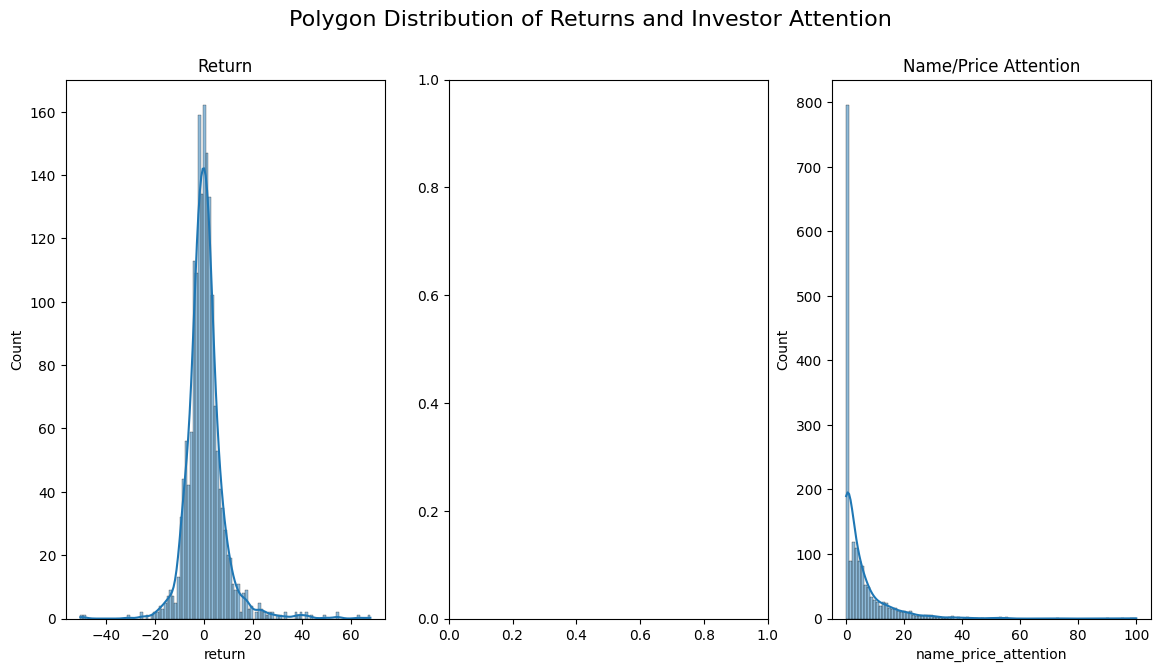

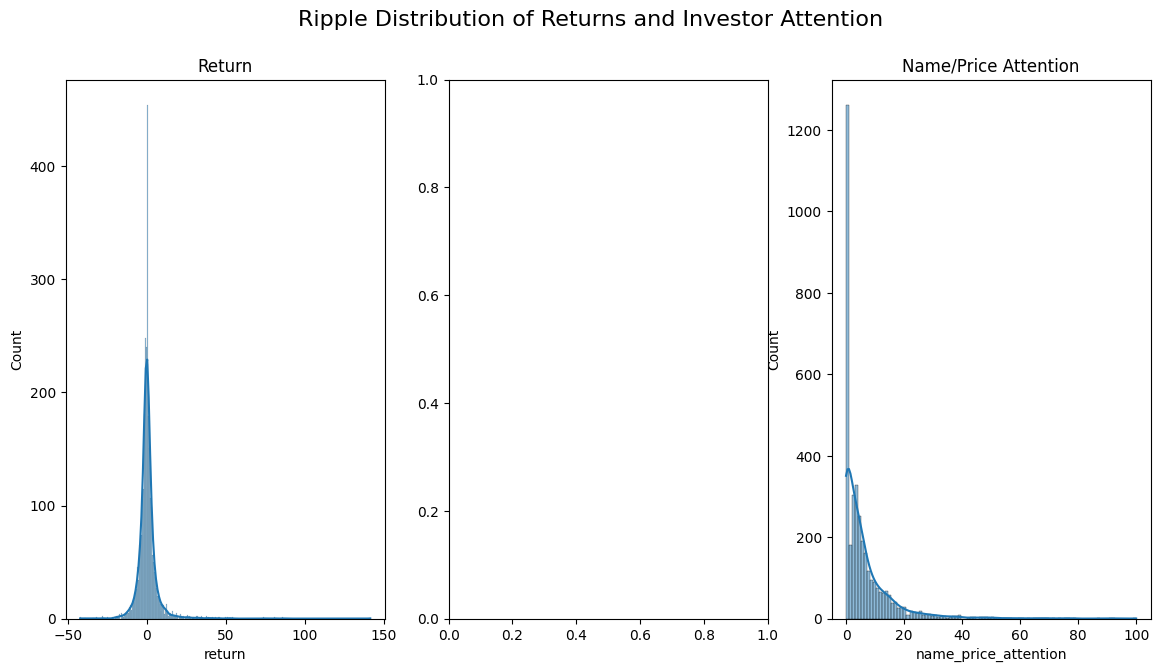

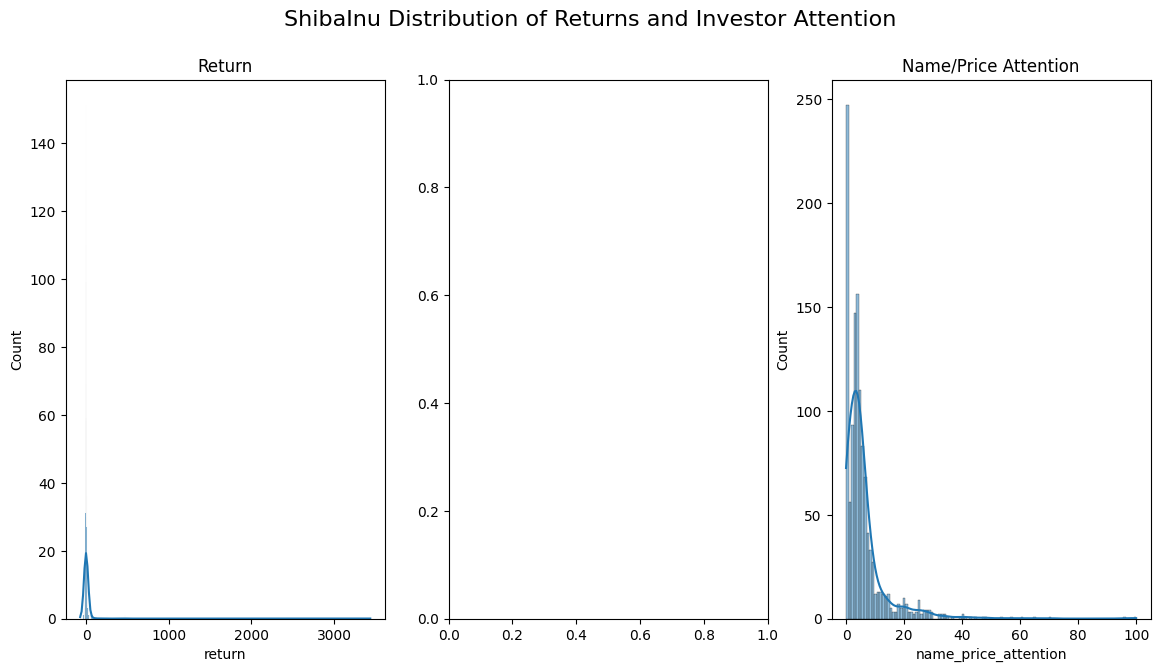

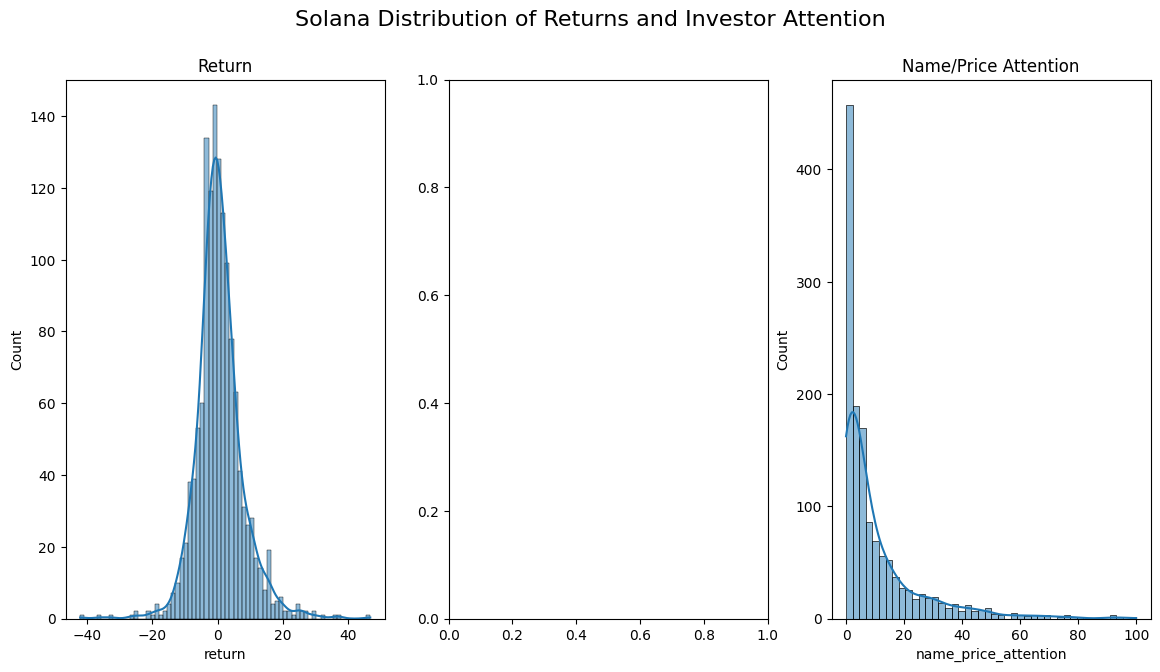

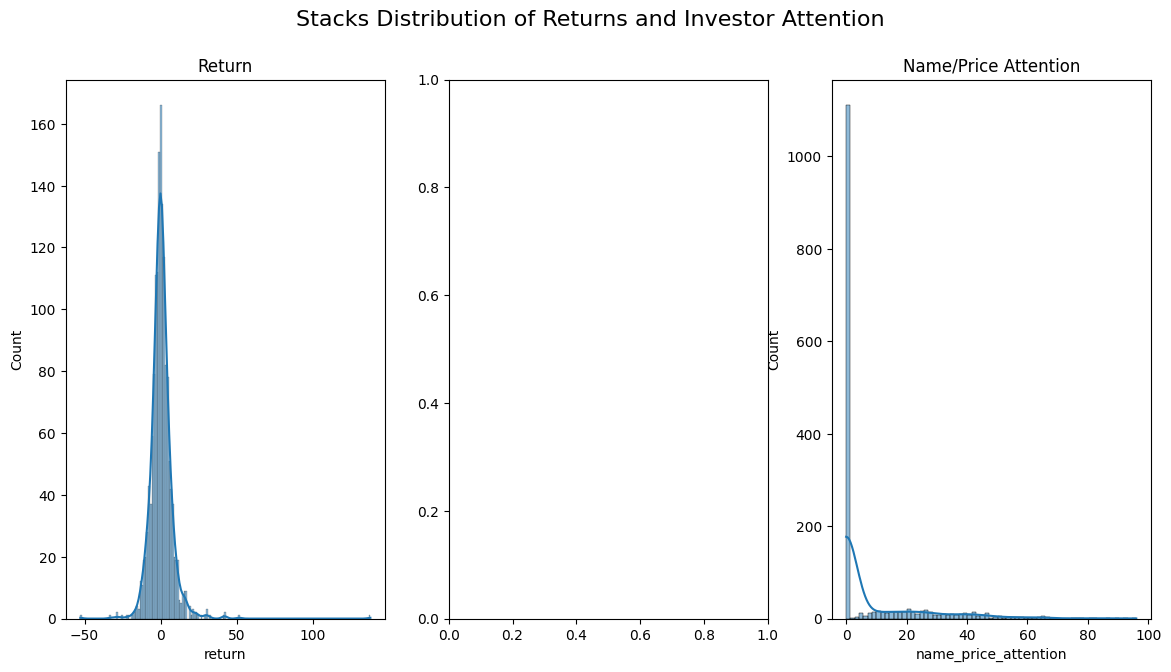

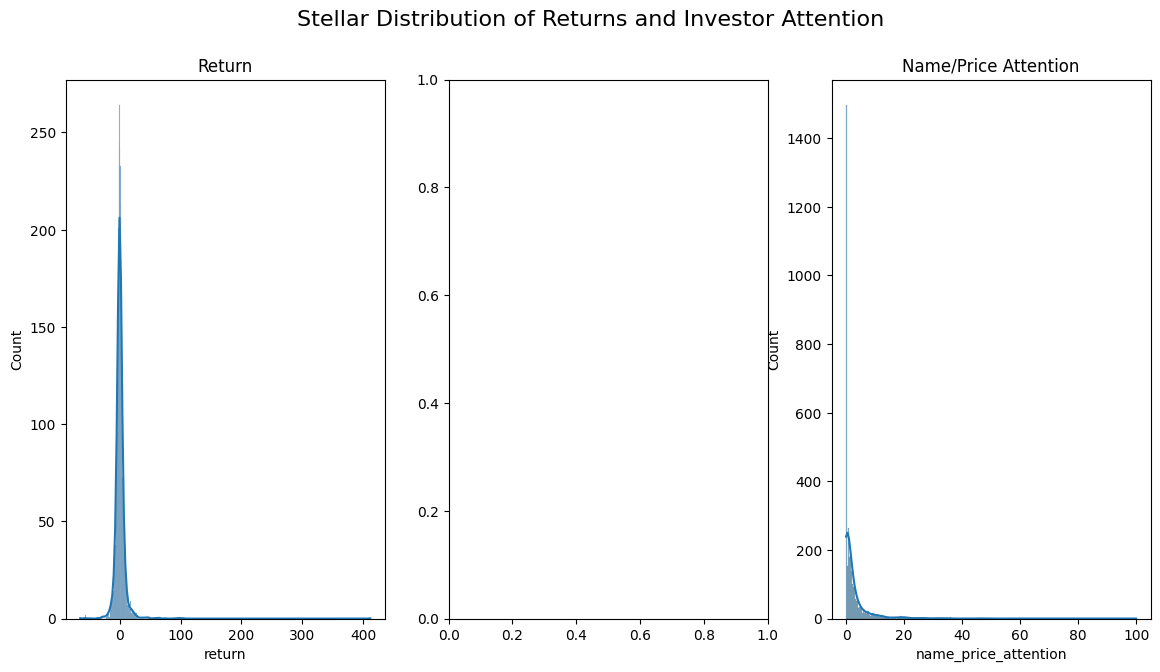

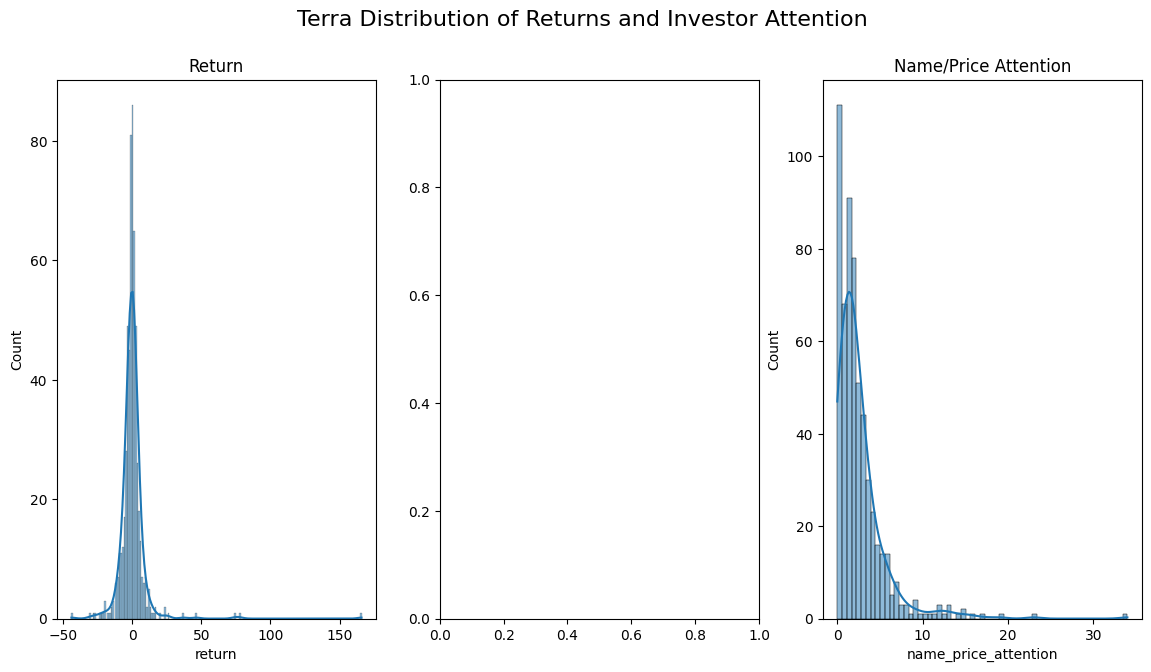

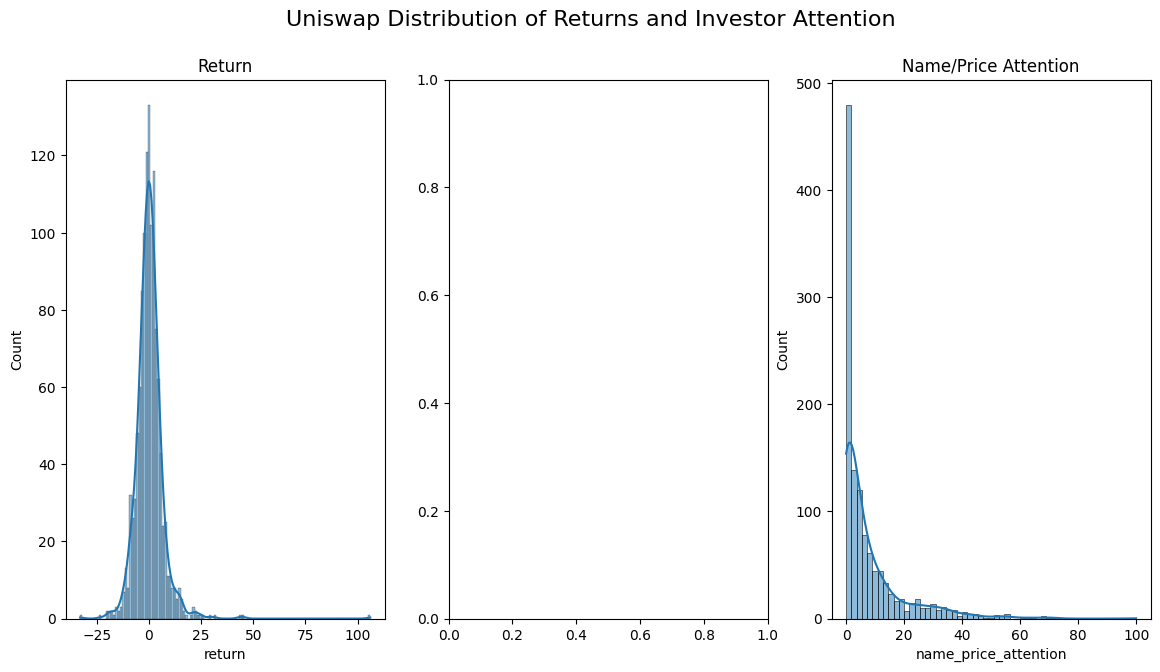

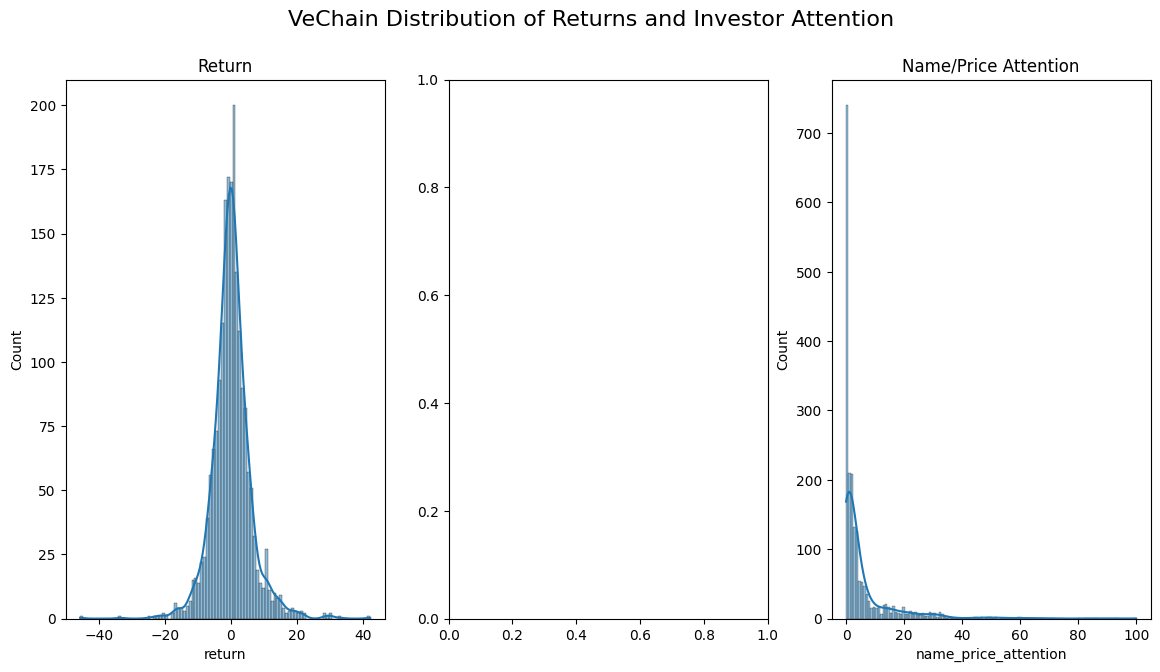

In [13]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, 3, figsize=(14, 7))
    fig.suptitle(f'{currency} Distribution of Returns and Investor Attention', fontsize=16)
    sns.histplot(stock_data['return'], kde=True, ax=ax[0])
    ax[0].set_title('Return')
    sns.histplot(stock_data['name_price_attention'], kde=True, ax=ax[2])
    ax[2].set_title('Name/Price Attention')
    plt.show()



### 3. Scatter plots with the Relationships 

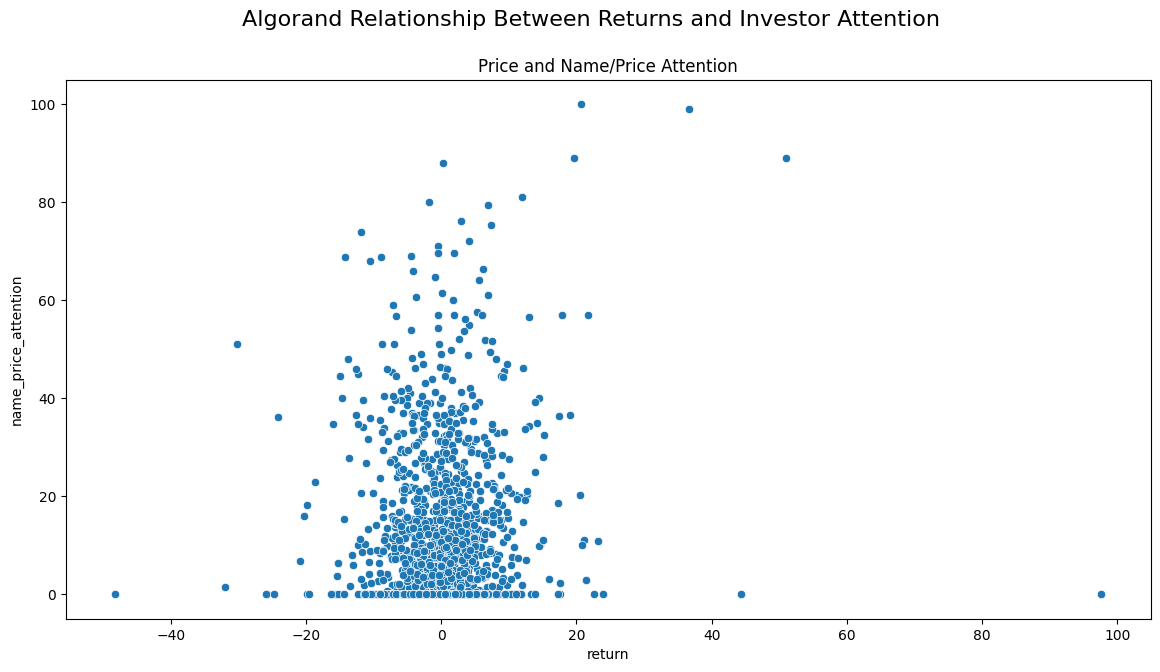

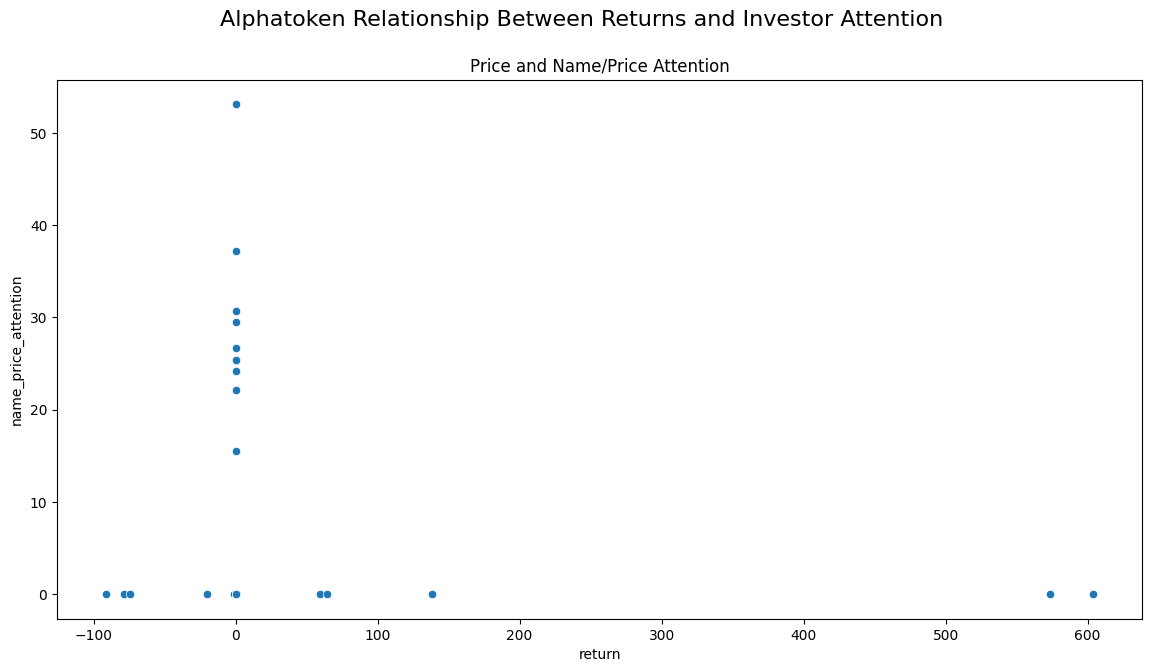

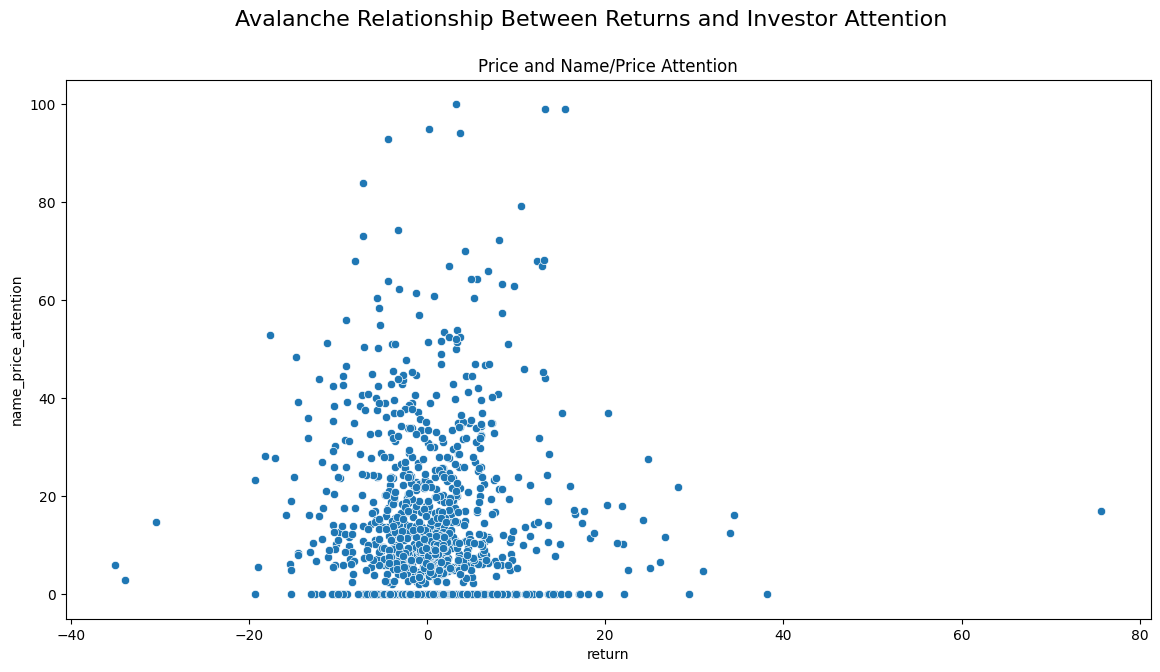

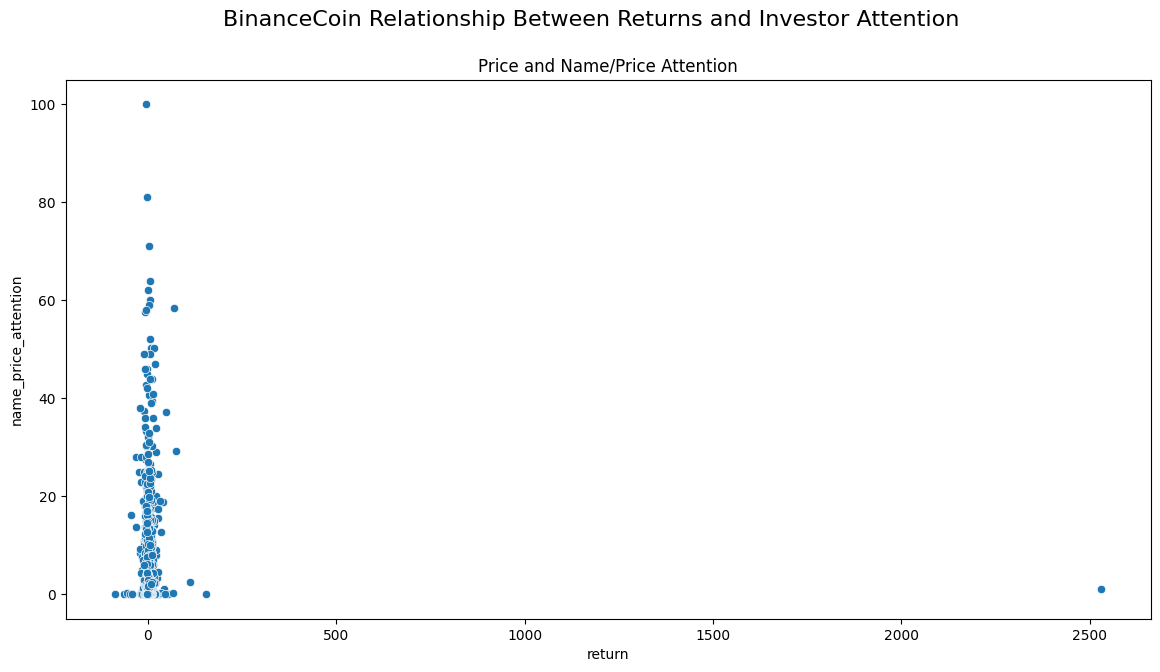

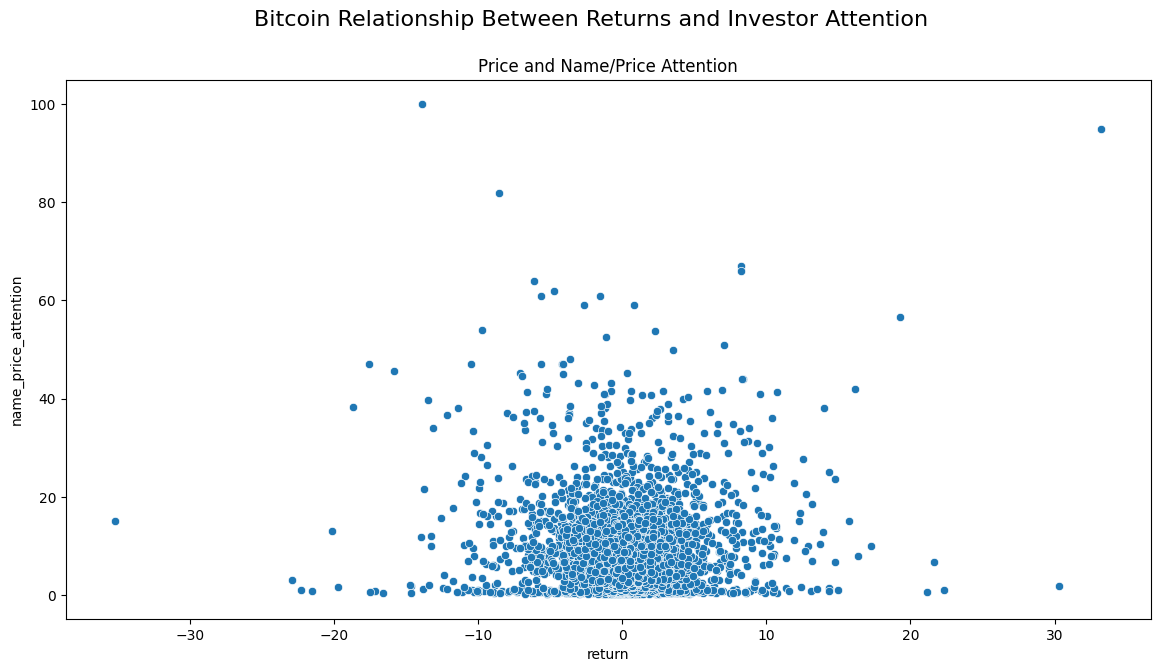

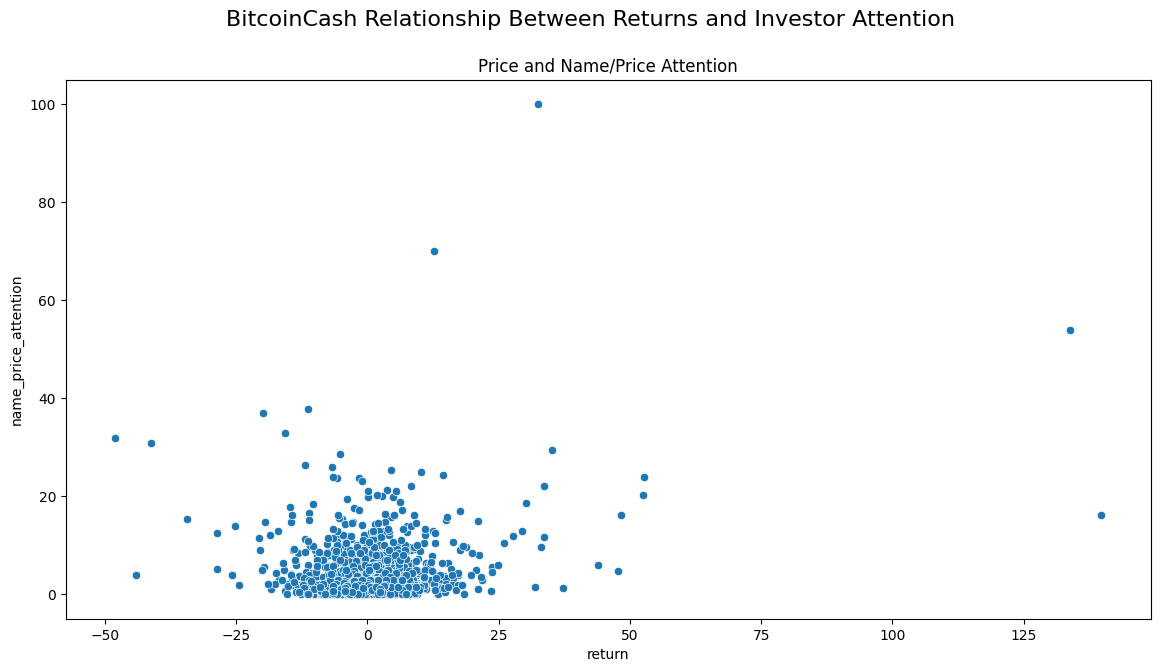

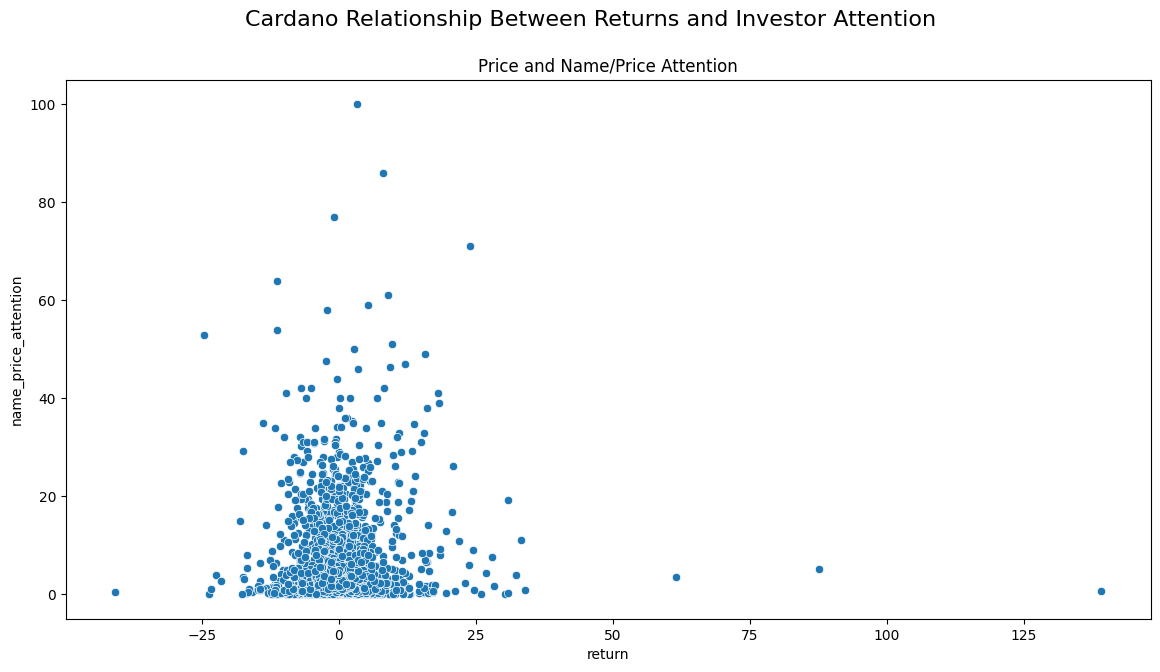

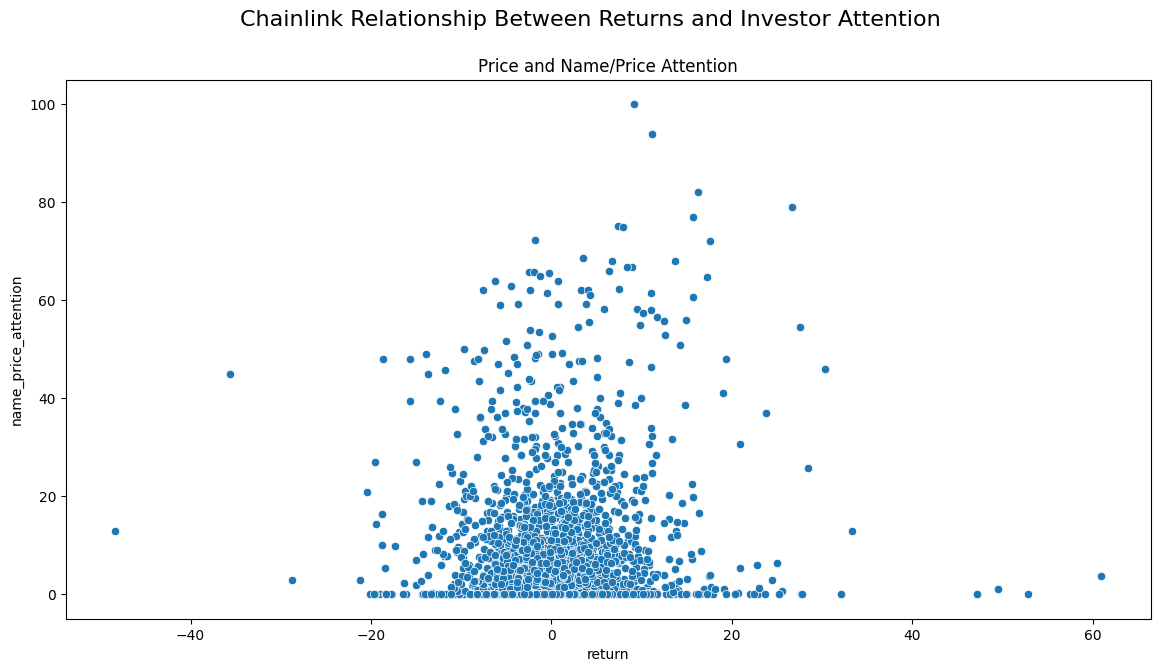

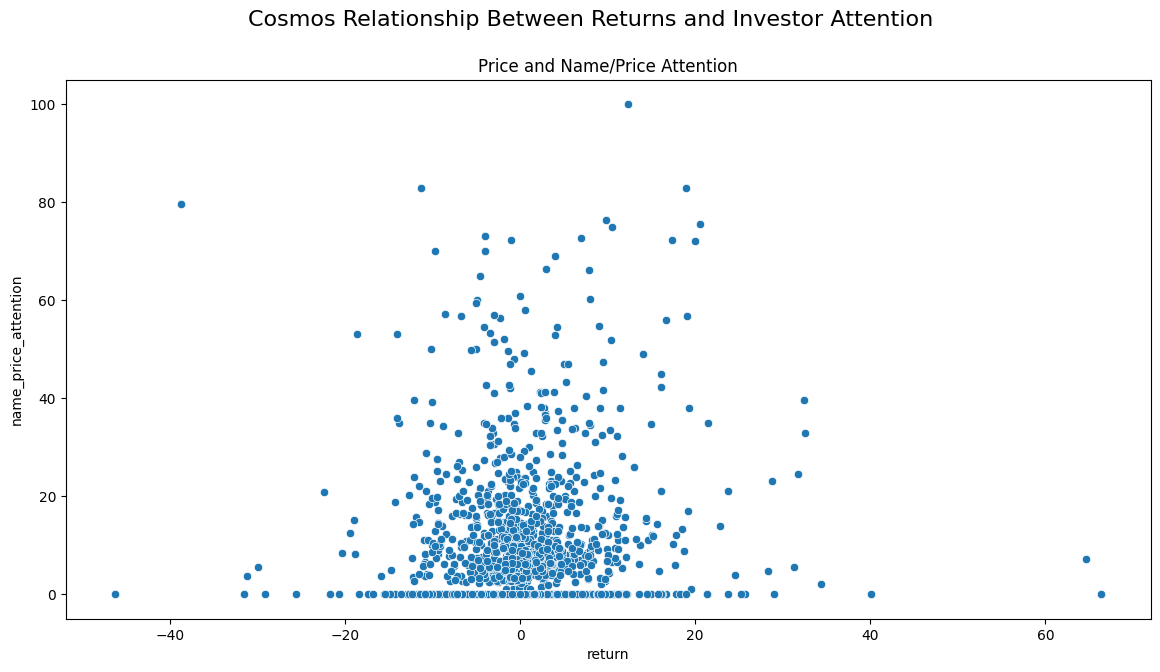

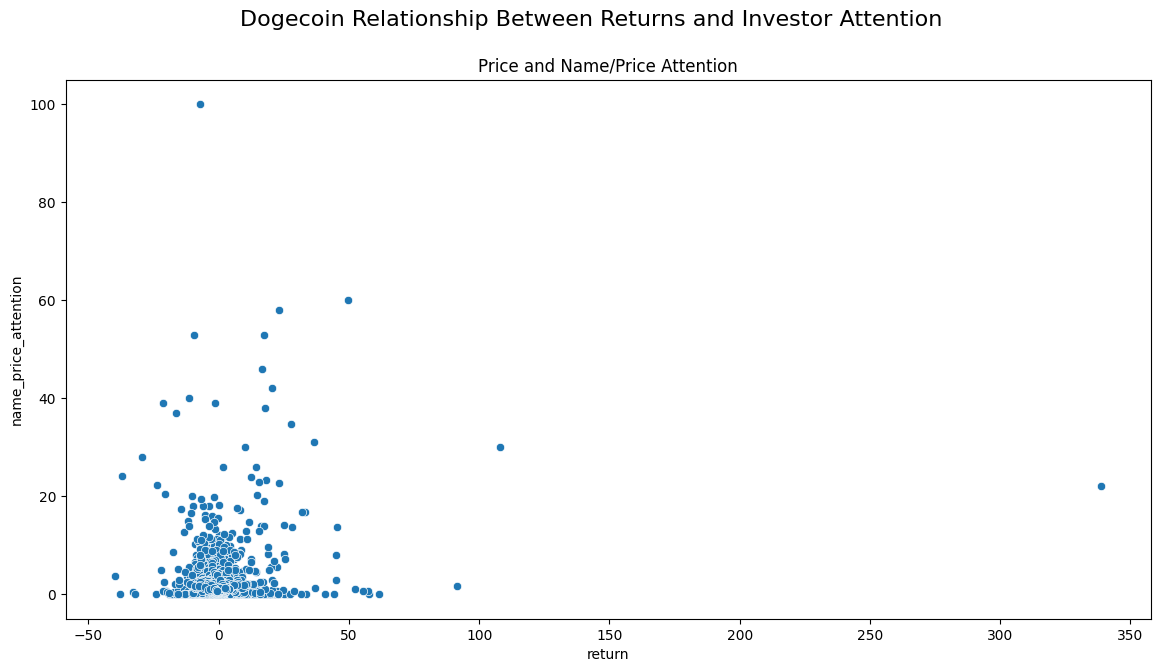

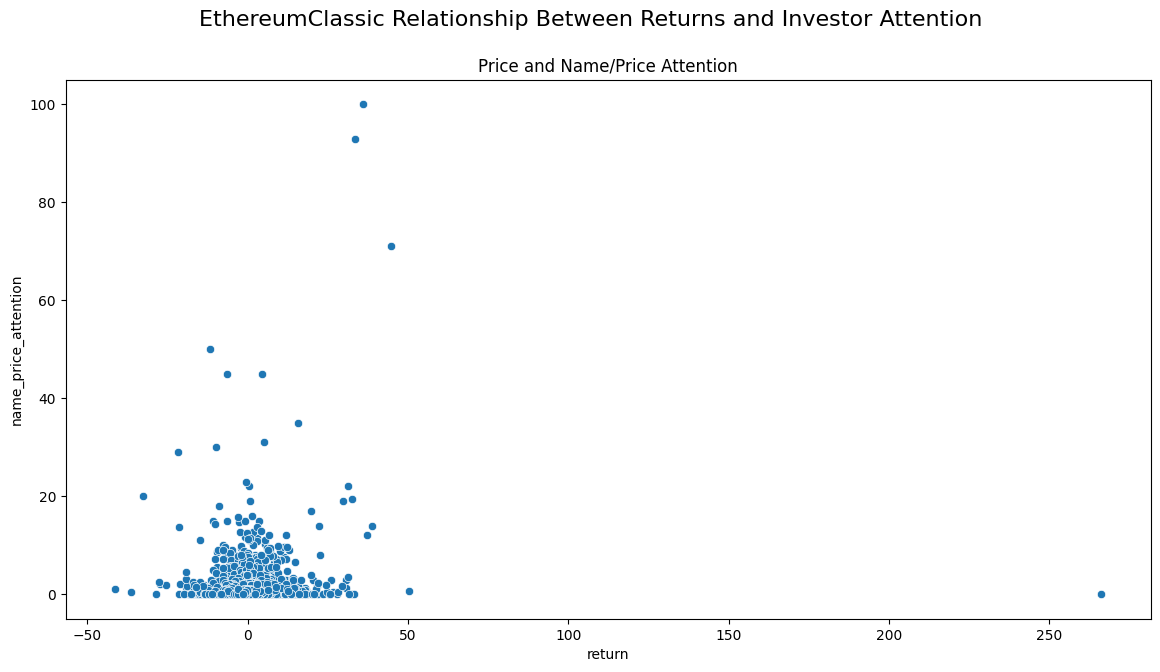

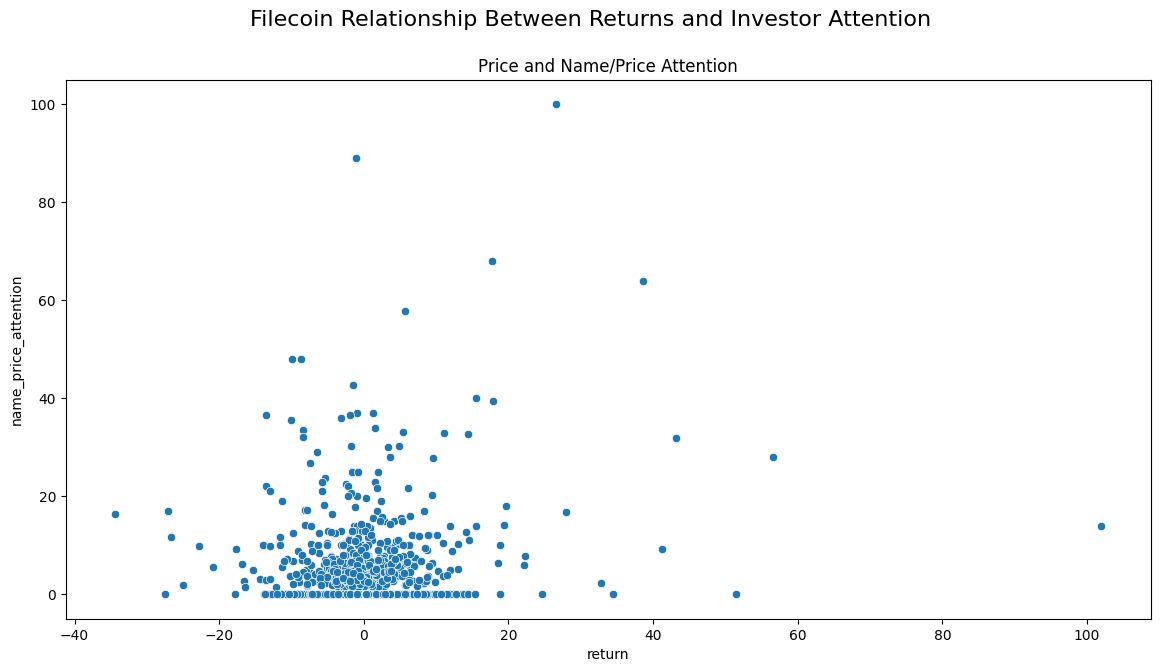

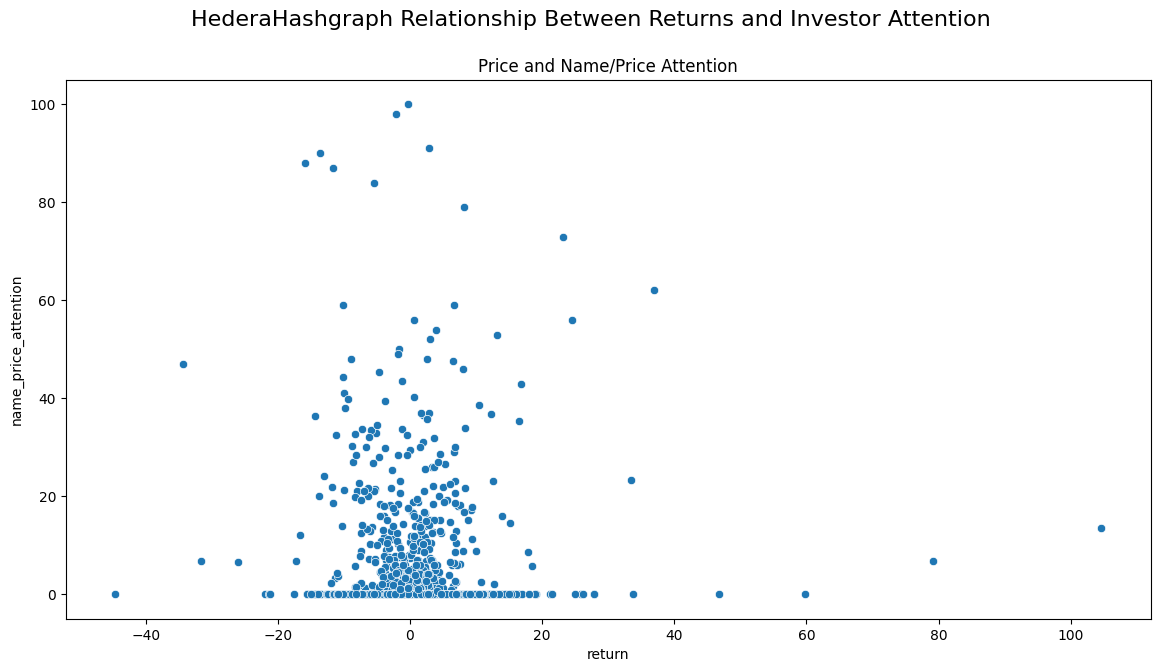

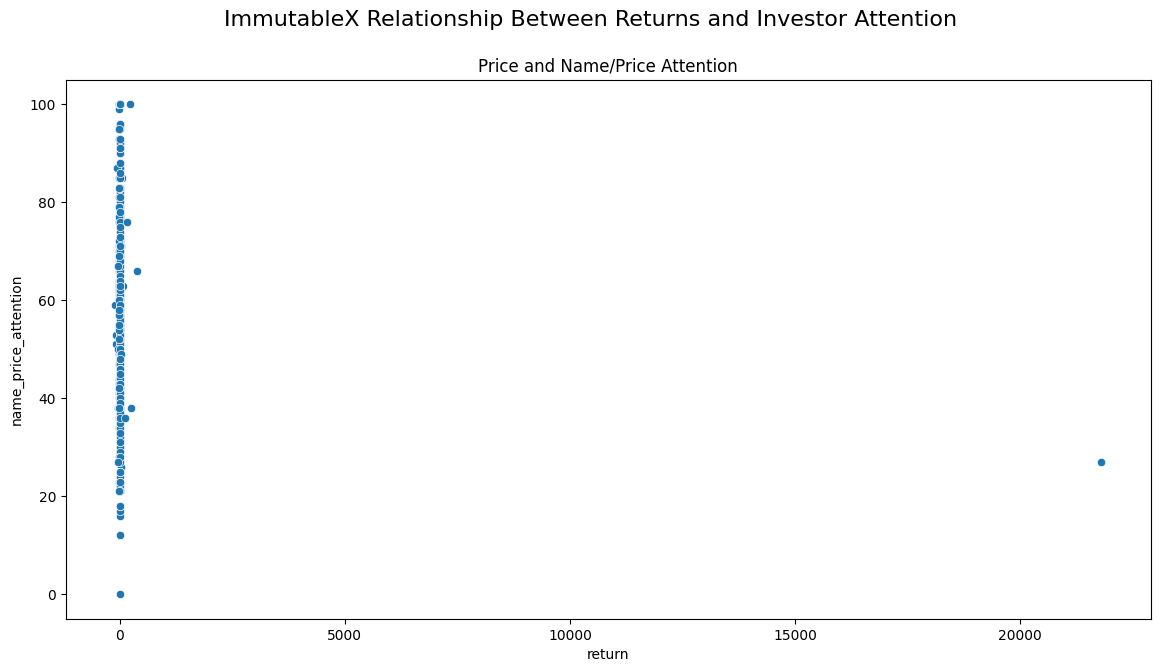

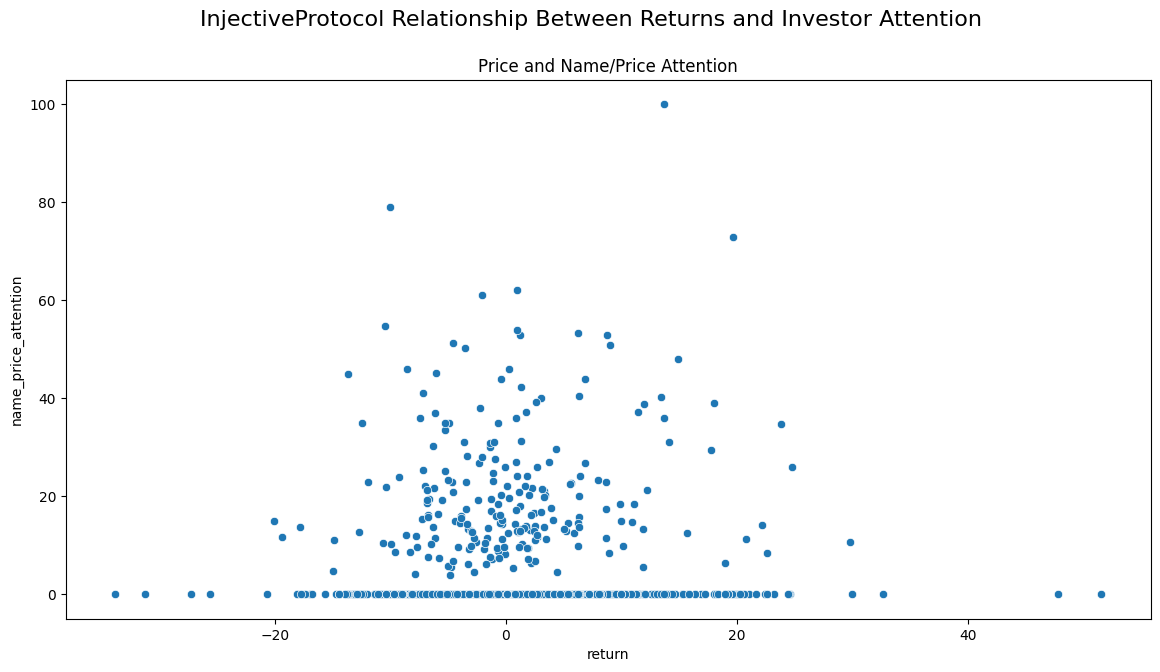

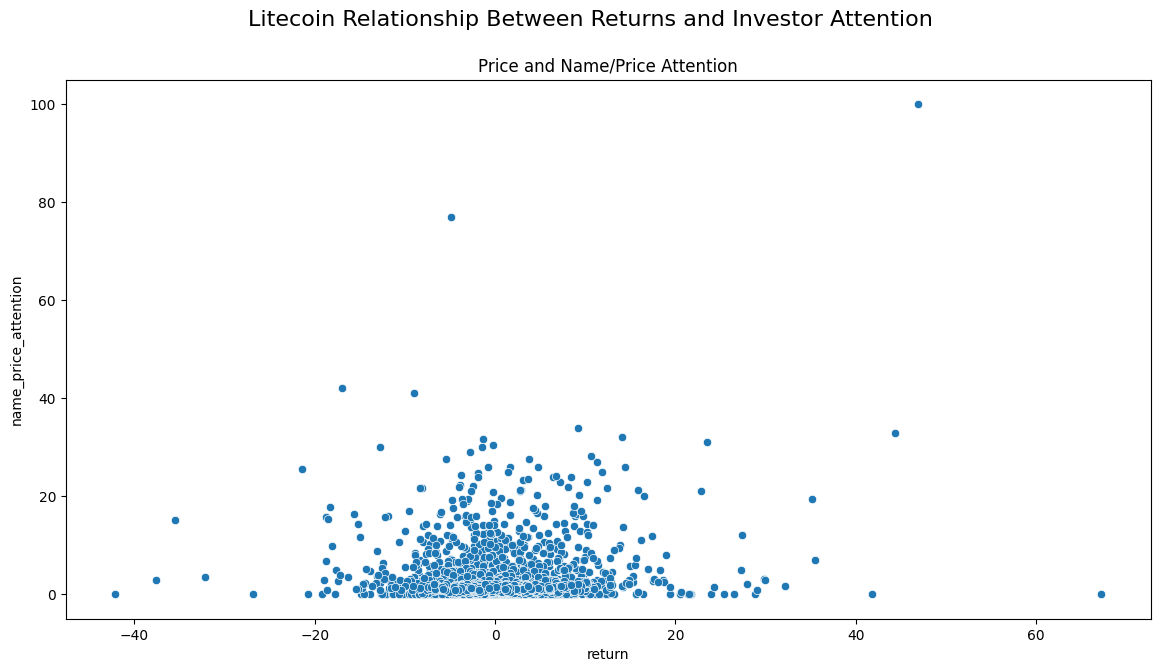

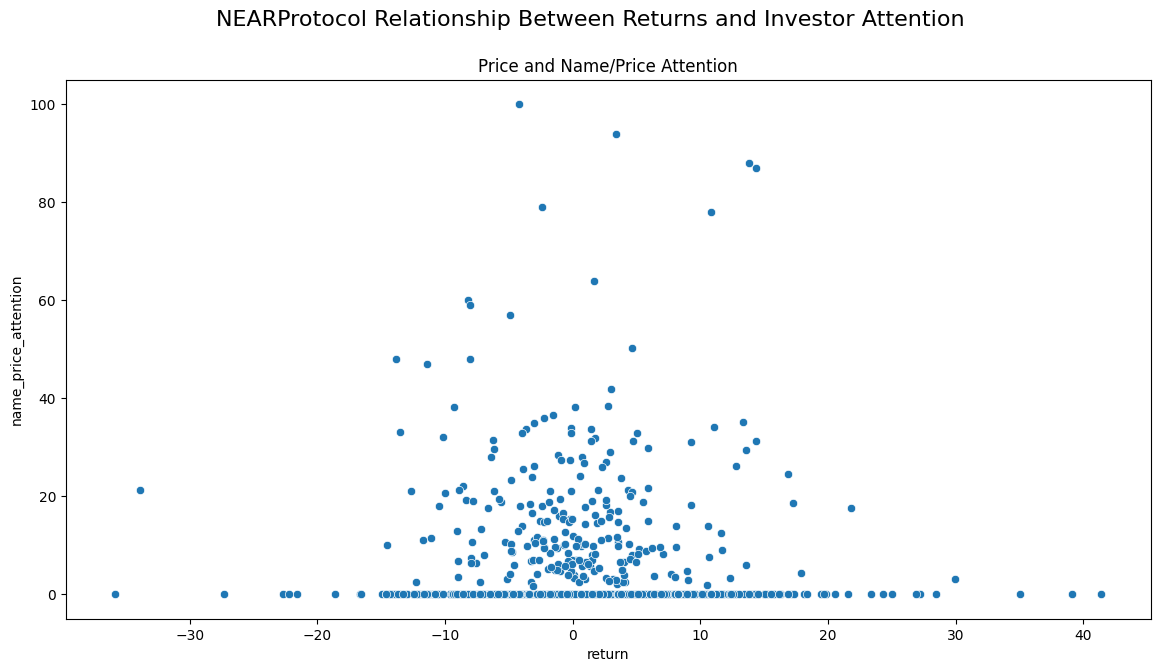

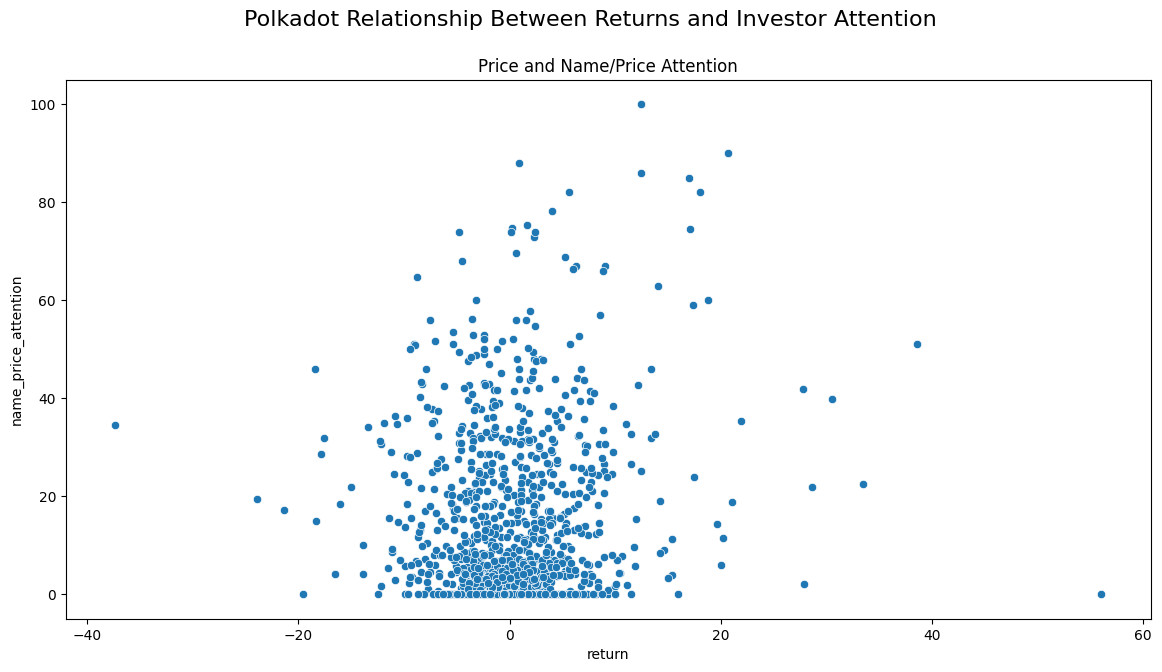

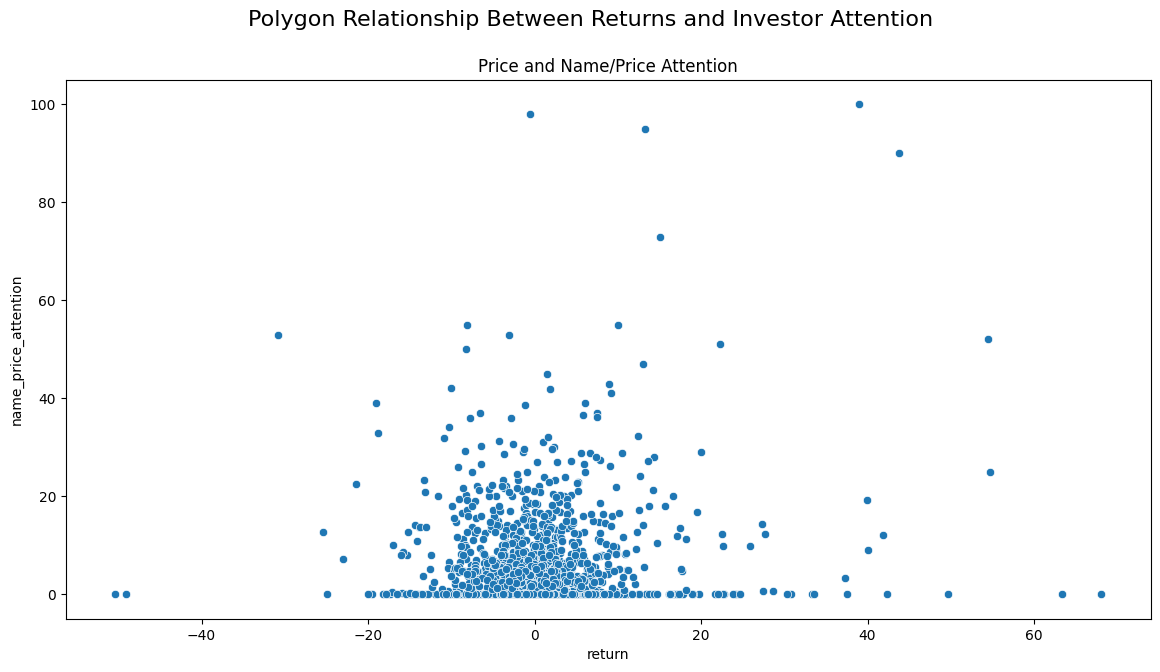

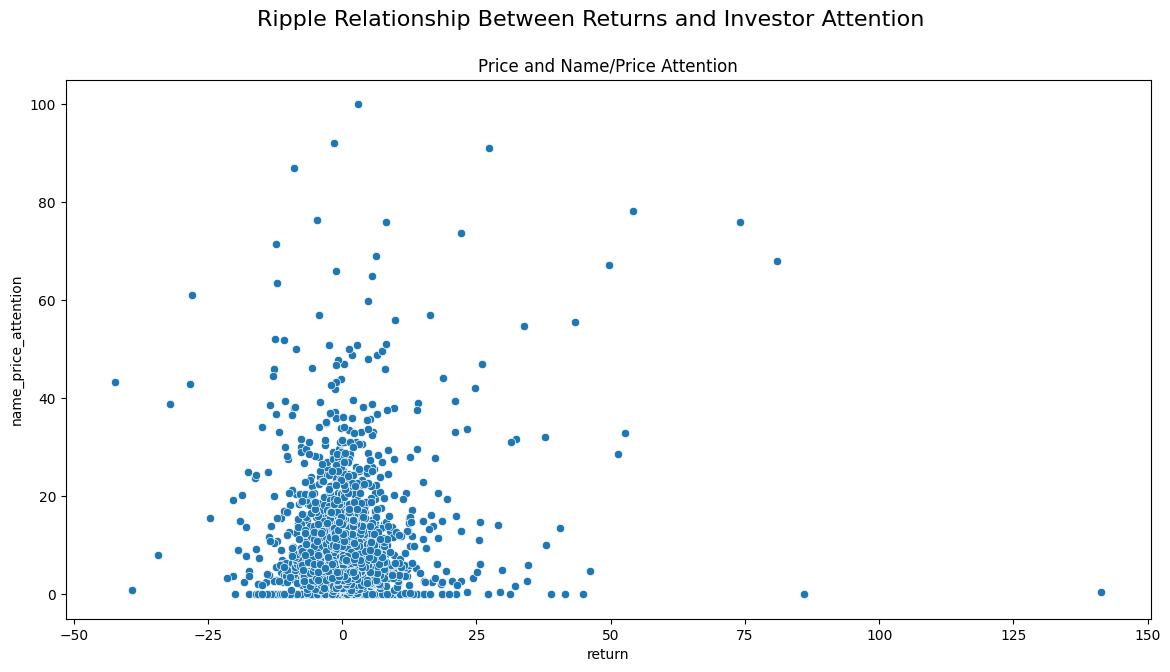

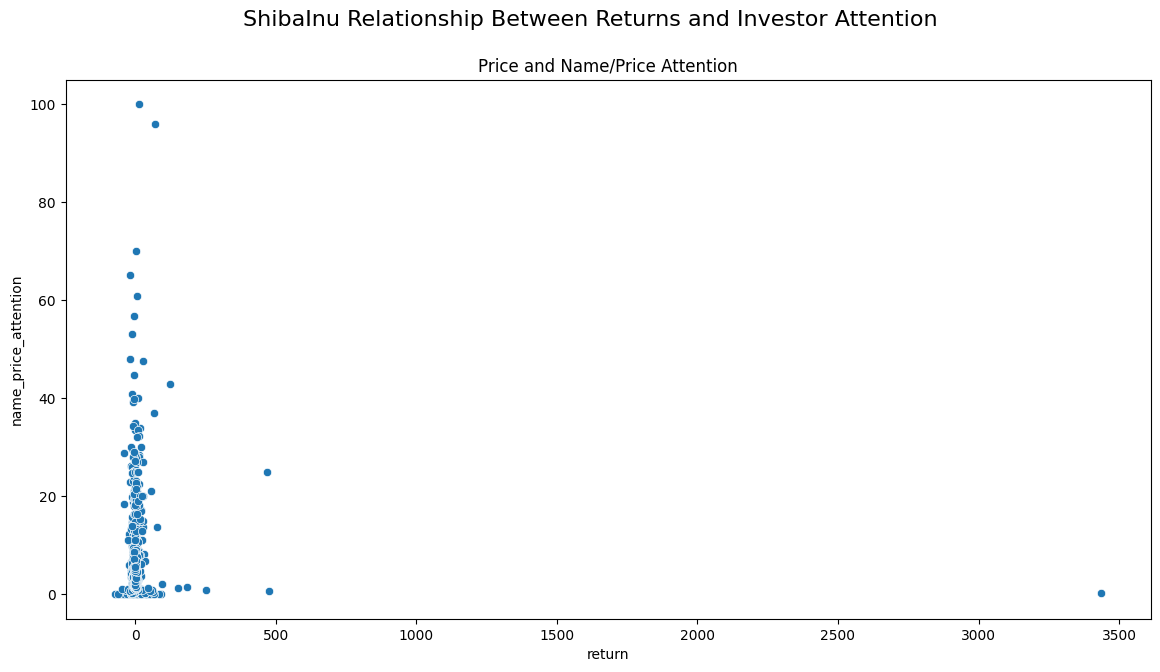

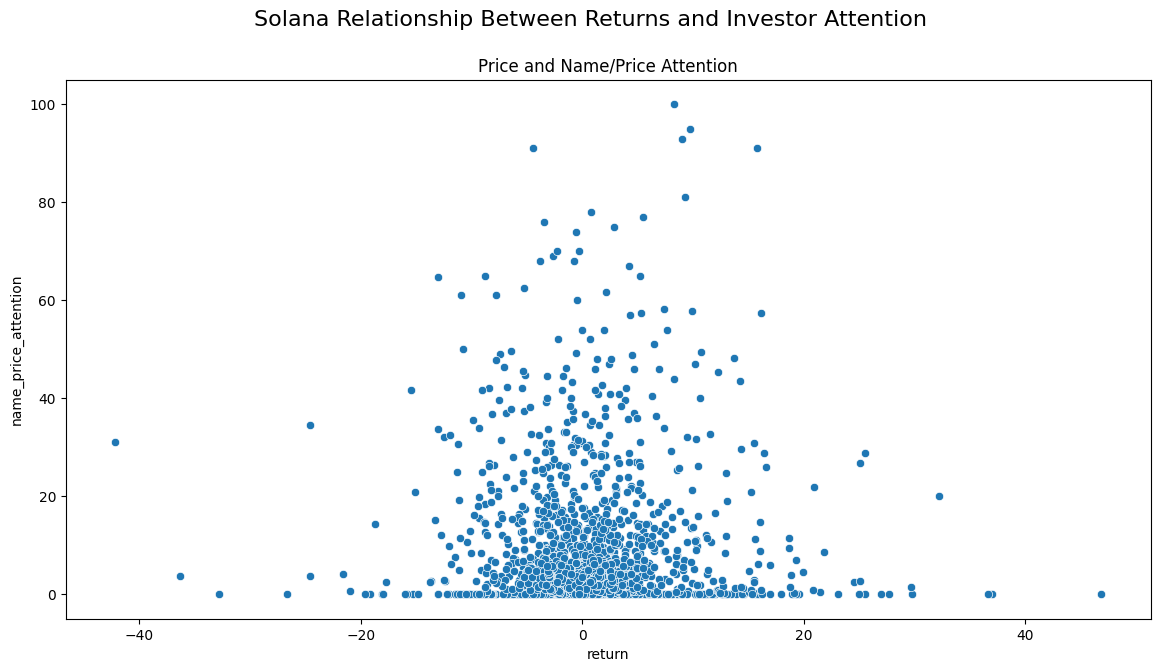

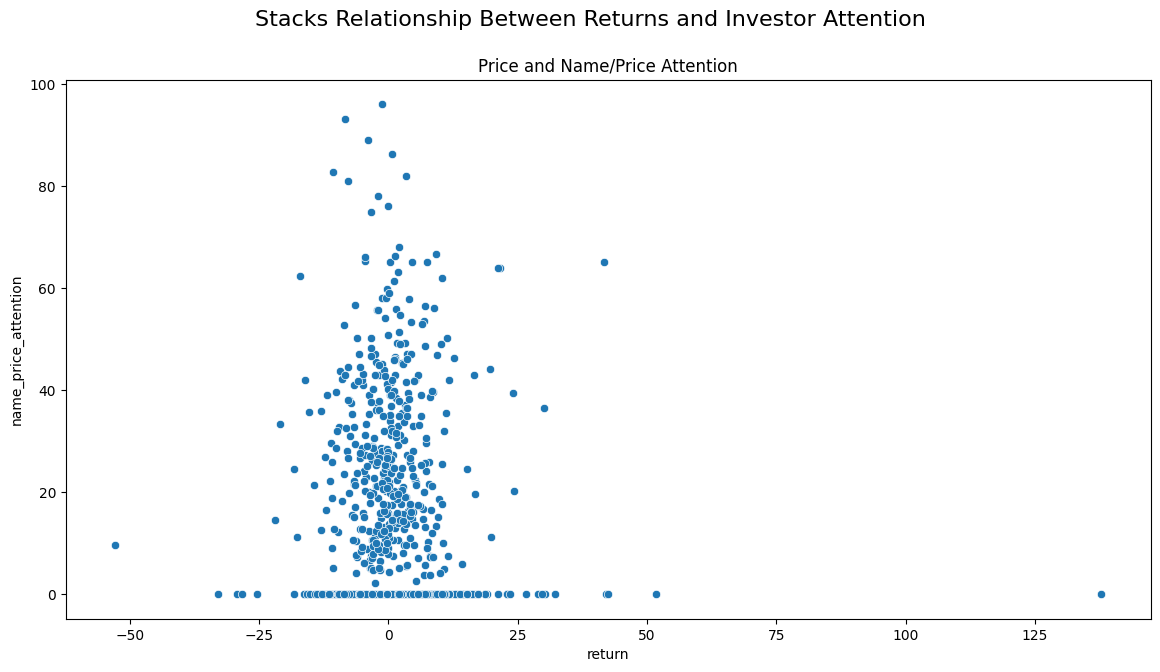

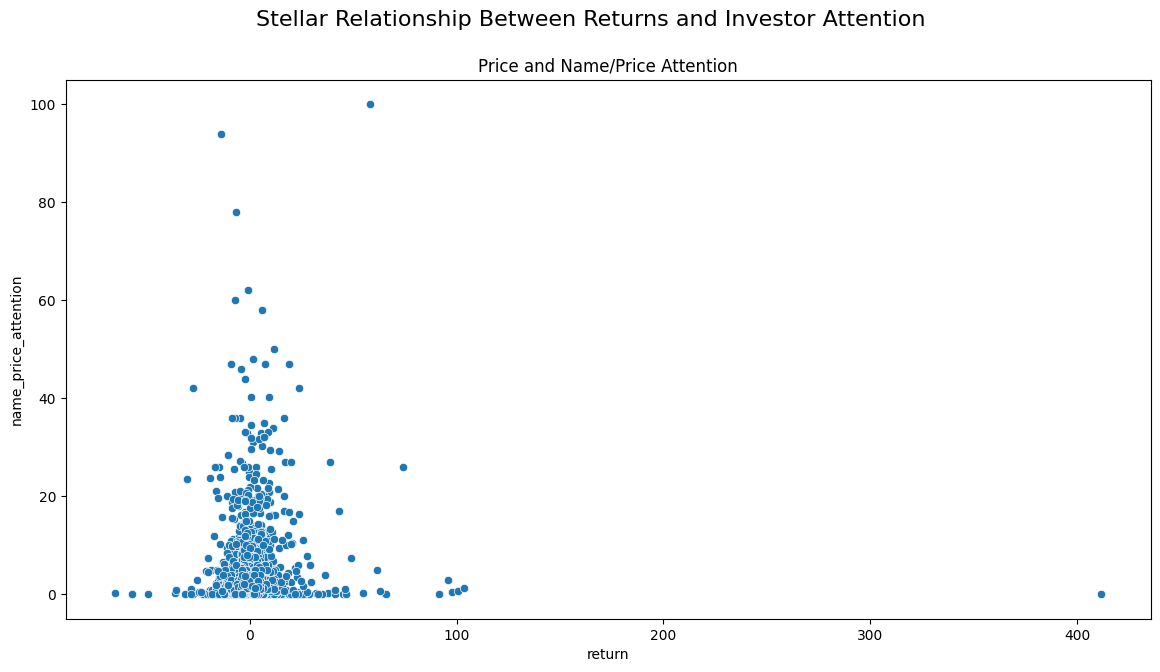

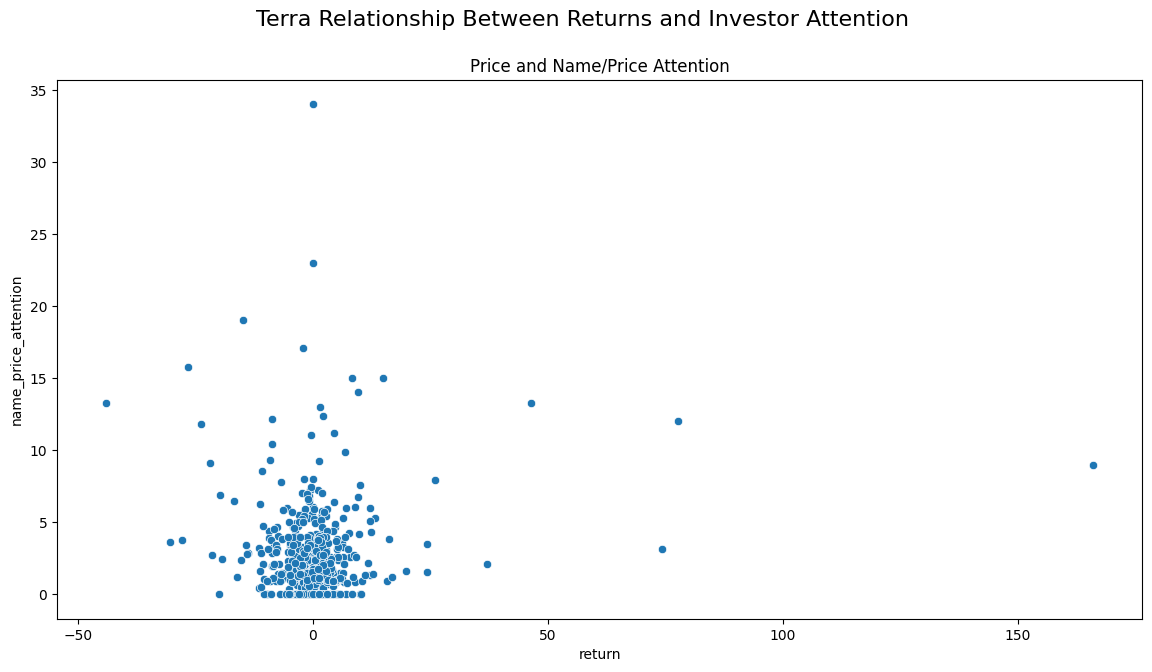

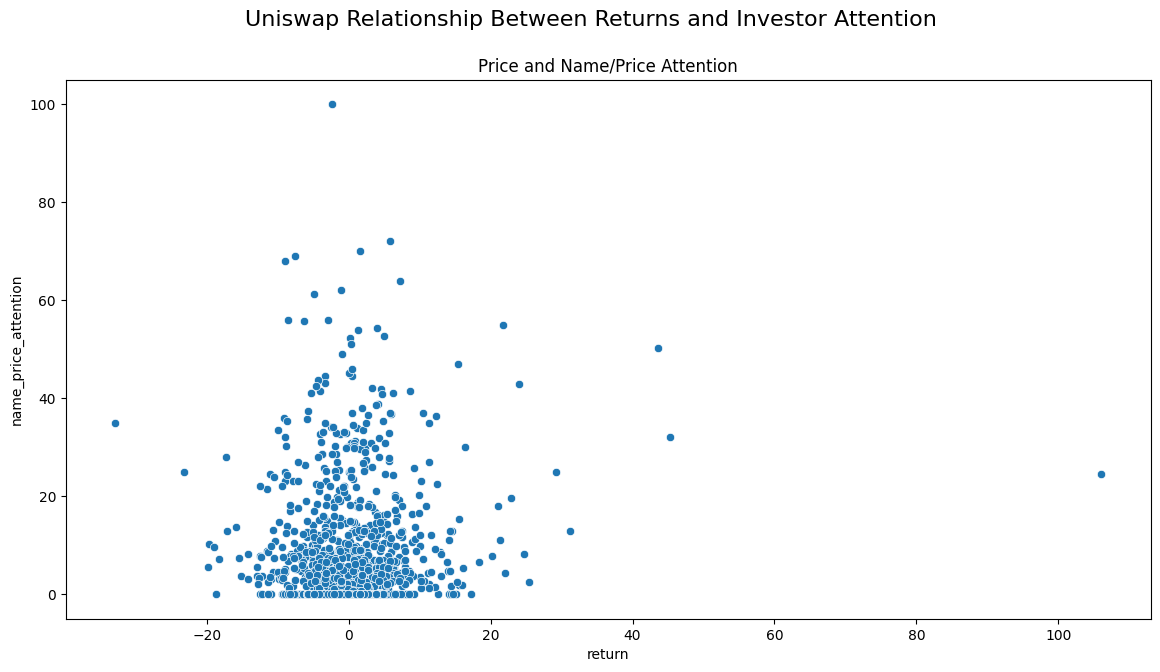

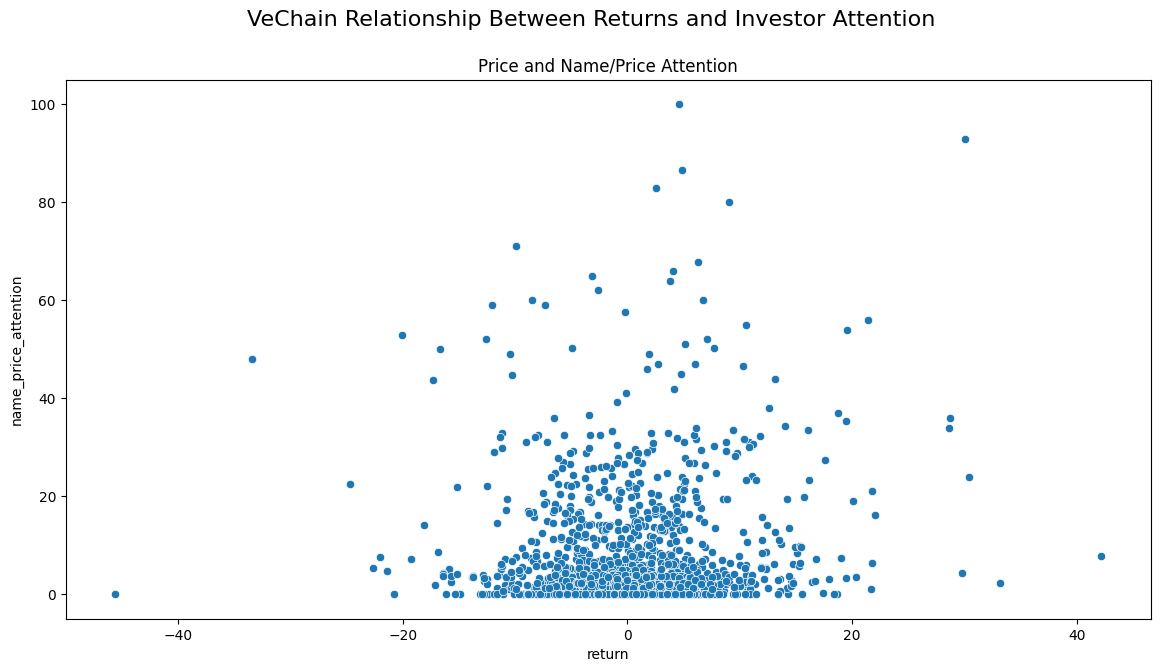

In [14]:
for currency in crypto:
    stock_data = data[data['crypto_name'] == currency]
    fig, ax = plt.subplots(1, figsize=(14, 7))
    fig.suptitle(f'{currency} Relationship Between Returns and Investor Attention', fontsize=16)
    sns.scatterplot(x=stock_data['return'], y=stock_data['name_price_attention'], ax=ax)
    ax.set_title('Price and Name/Price Attention')
    plt.show()